# Groups, Monoids, Semigroups, & Magmas

This section provides numerous examples of finite algebra creation and manipulation, specifically, for algebras with only one set of elements and one binary operation: Groups, Monoids, Semigroups, and Magmas.  See the previous section, "Definitions", for definitions of these algebraic structures.

## Internal Representation of Groups, Monoids, Semigroups, & Magmas

Internally, a ``FiniteAlgebra`` can take several different forms.  For algebras that have only one set of elements and one binary operation, such as Groups, Monoids, Semigroups, and Magmas, the internal representation is as shown below.

* **name**: (``str``) A short name for the algebra;
* **description**: (``str``) Any additional, useful information about the algebra;
* **elements**: (``list`` of ``str``) Names of the algebras’s elements.
* **table**: (``list`` of ``list`` of ``int``) The algebra’s multiplication
  table, where each list in the list represents a row of the table, and
  each integer represents the position of an element in ‘element_names’.
  For input and ouput, element names (``str``) may be used in the table, rather than integers, but integers are still used internally.

The following section describes the required table in more detail.

## Cayley Table

A binary operation over a set of order $n$, can be represented by a 2-dimensional, $n \times n$ table, called a *Cayley Table*.  All of the properties of a finite algebra can be derived from its Cayley Table.

For example, the Cayley table for the [commutative, non-associative Magma derived from the Rock (r), Paper (p), Scissors (s) game](https://en.wikipedia.org/wiki/Commutative_magma), is shown on the left in the diagram below. 

If the elements are assumed to be represented in an ordered list, such as [r, p, s], then the Cayley table can be unambiquously represented, without row or column headers, as a list of integers that represent the zero-based position of the elements in the ordered list, as shown on the right in the diagram below.

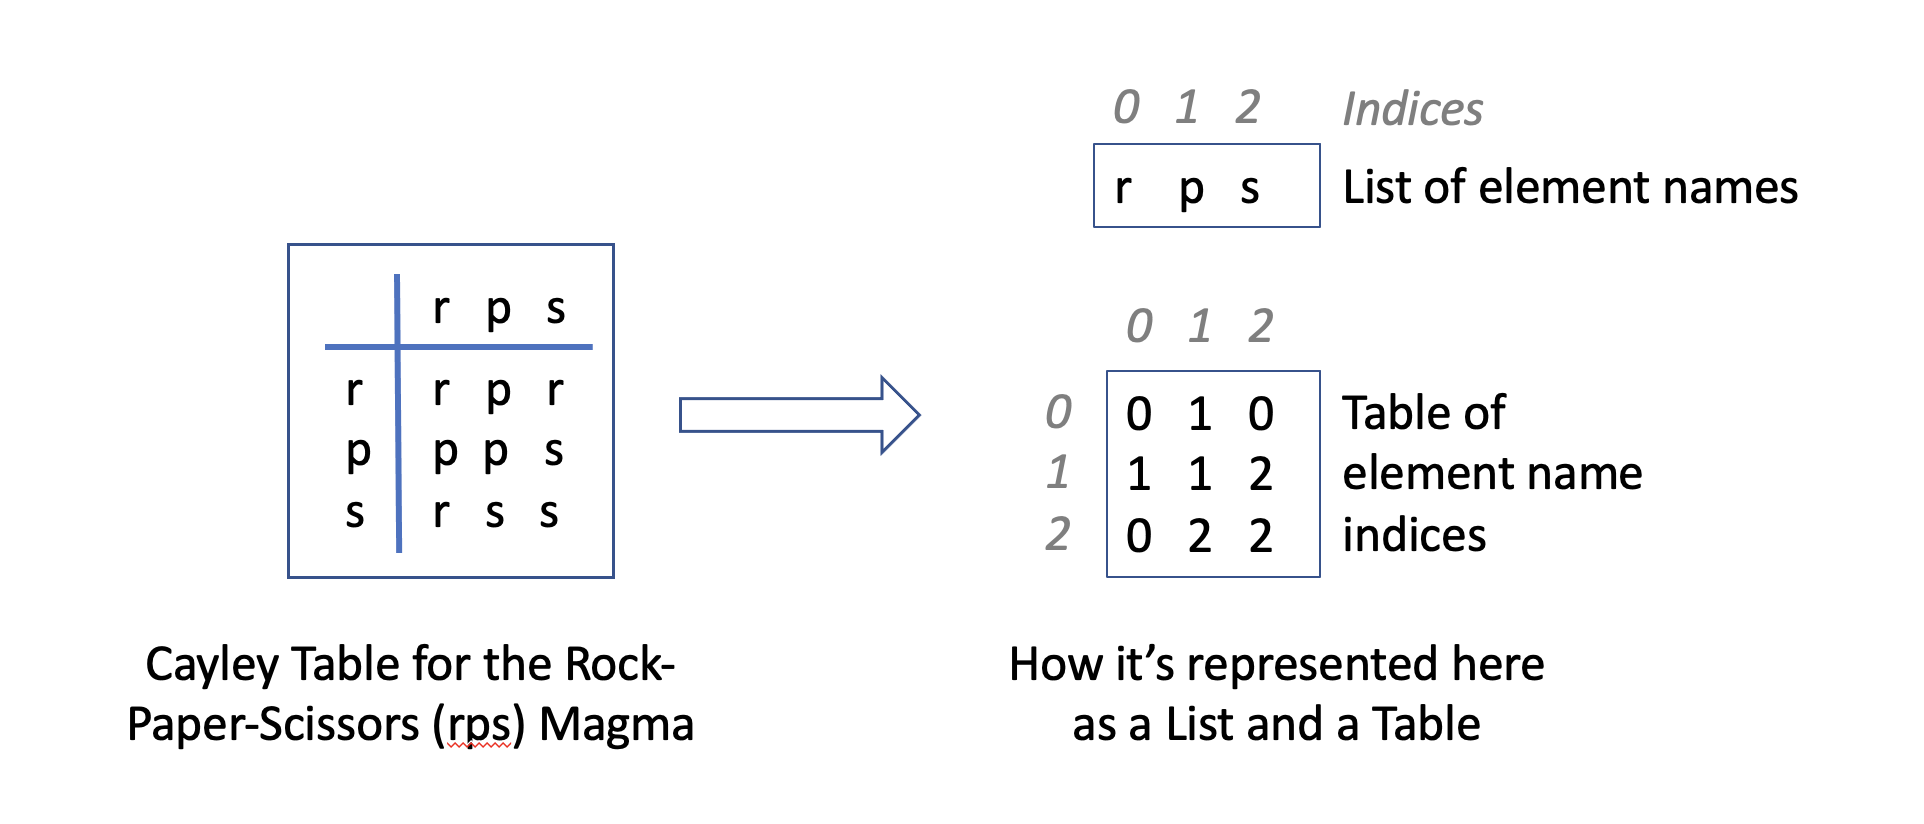

In [1]:
from IPython import display
from base64 import b64decode
base64_class_hierarchy = "iVBORw0KGgoAAAANSUhEUgAAB4QAAAM4CAYAAAAkn1+3AAAK22lDQ1BJQ0MgUHJvZmlsZQAASImVlwdYU1kWx+976SGhBSKdUEPvJYCUEFoognQQlZAEEkoMgaAidgZHcCyoiGAZ0FERBUeHIqIiFmyDYO8TZFBQ18GCDTX7AkuYmf1299uT7+b+cnLuuefc916+fwAgh3HE4lxYHYA8UaEkNjSQlpySSsM9BRDyIgEXgOVwC8TMmJhIgNjU/Fd7fxuJReyGvSLXv3//X02Txy/gAgClIZzBK+DmIdyFjOdcsaQQANQhxG+2sFCs4D6EtSRIgQj/ruCsSf6o4IwJRpMmYuJjWQjTAMCTOBxJFgAkO8RPK+JmIXlIih6cRDyhCOEShP24Ag4P4U6E7fLyFih4GGErJF4MABk5HcDI+FPOrL/kz1Dm53CylDzZ14Thg4QF4lzO4v/zaP635eVKp/awRAZJIAmLVeyHnN/dnAURShZlzIqeYiFvsiYFC6RhCVPMLWClTjGPExShXJs7K3KKM4UhbGWeQnb8FPMLguOmWLIgVrlXpoTFnGKOZGJfIsIyaU6C0i/gs5X5iwXxSVNcJEycNcUFOXER0zEspV8ijVXWzxeFBk7vG6LsPa/gT/0K2cq1hYL4MGXvnOn6+SLmdM6CZGVtPH5Q8HRMgjJeXBio3EucG6OM5+eGKv0FRXHKtYXIzTm9NkZ5htmc8JgpBkIQBTiAS1ObIgAK+YsKFY2wFogXS4RZgkIaE3na+DS2iOtgR3NxcnEBQPHsTt4Ob6kTzyREvTztW90CgO8puVx+YtoXsRGAY3TksvRN++ibAFDTB+BiHVcqKZr0oRVvGOTqqQEtoAuMgBmwAvbI74MH8AEBIBiEg2gQD1LAPKRWAcgDErAQlICVoAxUgI1gK6gBu8EecAAcBkdBG+gEZ8AFcAX0gVvgAZCBIfACjIL3YByCIBxEhiiQLmQMWUC2kAvEgPygYCgSioVSoHQoCxJBUqgEWg1VQJVQDVQHNUA/Q8ehM9AlqB+6Bw1AI9Ab6DOMgkmwFmwIW8KOMANmwhFwPDwXzoLz4WK4FF4PV8P18CG4FT4DX4FvwTL4BTyGAigVFBVlgrJHMVAsVDQqFZWJkqCWocpRVah6VBOqA9WDuoGSoV6iPqGxaAqahrZH+6DD0AloLjofvQy9Dl2DPoBuRZ9D30APoEfR3zBkjAHGFuONYWOSMVmYhZgyTBVmH6YFcx5zCzOEeY/FYqlYOtYTG4ZNwWZjl2DXYXdim7Fd2H7sIHYMh8Pp4mxxvrhoHAdXiCvDbccdwp3GXccN4T7iVfDGeBd8CD4VL8KvwlfhD+JP4a/jn+HHCeoEC4I3IZrAIywmbCDsJXQQrhGGCONEDSKd6EuMJ2YTVxKriU3E88SHxLcqKiqmKl4qs1WEKitUqlWOqFxUGVD5RNIk2ZBYpDSSlLSetJ/URbpHeksmky3JAeRUciF5PbmBfJb8mPxRlaLqoMpW5akuV61VbVW9rvpKjaBmocZUm6dWrFaldkztmtpLdYK6pTpLnaO+TL1W/bj6HfUxDYqGs0a0Rp7GOo2DGpc0hjVxmpaawZo8zVLNPZpnNQcpKIoZhUXhUlZT9lLOU4a0sFp0LbZWtlaF1mGtXq1RbU1tN+1E7UXatdontWVUFNWSyqbmUjdQj1JvUz/PMJzBnMGfsXZG04zrMz7o6OsE6PB1ynWadW7pfNal6Qbr5uhu0m3TfaSH1rPRm623UG+X3nm9l/pa+j76XP1y/aP69w1gAxuDWIMlBnsMrhqMGRoZhhqKDbcbnjV8aUQ1CjDKNtpidMpoxJhi7GcsNN5ifNr4OU2bxqTl0qpp52ijJgYmYSZSkzqTXpNxU7ppgukq02bTR2ZEM4ZZptkWs26zUXNj8yjzEvNG8/sWBAuGhcBim0WPxQdLumWS5RrLNsthug6dTS+mN9IfWpGt/K3yreqtblpjrRnWOdY7rftsYBt3G4FNrc01W9jWw1Zou9O23w5j52Unsqu3u2NPsmfaF9k32g84UB0iHVY5tDm8cjR3THXc5Njj+M3J3SnXaa/TA2dN53DnVc4dzm9cbFy4LrUuN13JriGuy13bXV+72brx3Xa53XWnuEe5r3Hvdv/q4ekh8WjyGPE090z33OF5h6HFiGGsY1z0wngFei336vT65O3hXeh91PsPH3ufHJ+DPsMz6TP5M/fOHPQ19eX41vnK/Gh+6X4/+sn8Tfw5/vX+TwLMAngB+wKeMa2Z2cxDzFeBToGSwJbADyxv1lJWVxAqKDSoPKg3WDM4Ibgm+HGIaUhWSGPIaKh76JLQrjBMWETYprA7bEM2l93AHg33DF8afi6CFBEXURPxJNImUhLZEQVHhUdtjno4y2KWaFZbNIhmR2+OfhRDj8mPOTEbOztmdu3sp7HOsSWxPXGUuPlxB+PexwfGb4h/kGCVIE3oTlRLTEtsSPyQFJRUmSRLdkxemnwlRS9FmNKeiktNTN2XOjYneM7WOUNp7mllabfn0ucumntpnt683Hkn56vN58w/lo5JT0o/mP6FE82p54xlsDN2ZIxyWdxt3Be8AN4W3gjfl1/Jf5bpm1mZOZzlm7U5a0TgL6gSvBSyhDXC19lh2buzP+RE5+zPkecm5Tbn4fPS846LNEU5onMLjBYsWtAvthWXiWX53vlb80clEZJ9BVDB3IL2Qi1EJF2VWkm/kw4U+RXVFn1cmLjw2CKNRaJFVxfbLF67+FlxSPFPS9BLuEu6S0xKVpYMLGUurVsGLctY1r3cbHnp8qEVoSsOrCSuzFn56yqnVZWr3q1OWt1Rali6onTwu9DvGstUyyRld9b4rNn9Pfp74fe9a13Xbl/7rZxXfrnCqaKq4ss67rrLPzj/UP2DfH3m+t4NHht2bcRuFG28vcl/04FKjcriysHNUZtbt9C2lG95t3X+1ktVblW7txG3SbfJqiOr27ebb9+4/UuNoOZWbWBt8w6DHWt3fNjJ23l9V8Cupt2Guyt2f/5R+OPdutC61nrL+qo92D1Fe57uTdzb8xPjp4Z9evsq9n3dL9ovOxB74FyDZ0PDQYODGxrhRmnjyKG0Q32Hgw63N9k31TVTmyuOgCPSI89/Tv/59tGIo93HGMeafrH4ZUcLpaW8FWpd3DraJmiTtae09x8PP97d4dPRcsLhxP5Ok87ak9onN5winio9JT9dfHqsS9z18kzWmcHu+d0PziafvXlu9rne8xHnL14IuXC2h9lz+qLvxc5L3peOX2ZcbrvicaX1qvvVll/df23p9ehtveZ5rb3Pq6+jf2b/qev+18/cCLpx4Sb75pVbs2713064ffdO2h3ZXd7d4Xu5917fL7o//mDFQ8zD8kfqj6oeGzyu/836t2aZh+zkQNDA1SdxTx4Mcgdf/F7w+5eh0qfkp1XPjJ81DLsMd46EjPQ9n/N86IX4xfjLsn9o/GPHK6tXv/wR8MfV0eTRodeS1/I3697qvt3/zu1d91jM2OP3ee/HP5R/1P144BPjU8/npM/Pxhd+wX2p/mr9teNbxLeH8jy5XMyRcCakAAoZcGYmAG/2I9o4BQAKosuJcya19YRBk/8HJgj8J57U3xPmAUATMilkEasLgCPIsAwAQBX5rJBE8QEAdnVVjn9ZQaary2QuEqIsMR/l8reGAOA6APgqkcvHd8rlX/cixd4DoCt/UtMrDIto+SZcT16ndX+H4wrwN5vU+3/q8e8zUFTgBv4+/xMS6xr9qJuXLgAAAIplWElmTU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAIdpAAQAAAABAAAATgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAHigAgAEAAAAAQAAB4SgAwAEAAAAAQAAAzgAAAAAQVNDSUkAAABTY3JlZW5zaG90QDXgOAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAddpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+ODI0PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE5MjQ8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KI+9BuQAAABxpRE9UAAAAAgAAAAAAAAGcAAAAKAAAAZwAAAGcAACyN54dkaUAAEAASURBVHgB7N0H1CtVuTjufagHREA4HOkdEbwiVQHpTbwi0hEQBEWuCCgioMDVe396AVEEBAQvUqSJUkVQKSooXUGU3qX33nv+efO/+dZMMvl68iWTZ691yMxkyn6fPZOPlTd770mVakkKAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJROYJKEcOnaVEAECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCoCUgIuxEIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQUgEJ4ZI2rLAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAgIeweIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEkFJIRL2rDCIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAgISwe4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIlFZAQLmnDCosAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQISwu4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFRAQrikDSssAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQISAi7BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBSAQnhkjassAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQICAh7B4gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASQUkhEvasMIiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQICAhLB7gAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAiUVkBAuacMKiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhLC7gECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUVEBCuKQNKywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhICLsHCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFIBCeGSNqywCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgICHsHiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBJBSSES9qwwiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgICEsHuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECJRWQEC5pwwqLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECEsLuAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJRUQEK4pA0rLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECEgIuwcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQUgEJ4ZI2rLAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAgIeweIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEkFJIRL2rDCIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAgISwe4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIlFZAQLmnDCosAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQISwu4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFRAQrikDSssAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQISAi7BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBSAQnhkjassAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQICAh7B4gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASQUkhEvasMIiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQICAhLB7gAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAiUVkBAuacMKiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhLC7gECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUVEBCuKQNKywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhICLsHCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFIBCeGSNqywCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgICHsHiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBJBSSES9qwwiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgICEsHuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECJRWQEC5pwwqLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECEsLuAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJRUQEK4pA0rLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECEgIuwcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQUgEJ4ZI2rLAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAgIeweIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEkFJIRL2rDCIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAgISwe4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIlFZAQLmnDCosAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQISwu4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFRAQrikDSssAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQISAi7BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBSAQnhkjassAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQICAh7B4gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASQUkhEvasMIiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQICAhLB7gAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAiUVkBAuacMKiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhLC7gECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUVEBCuKQNKywCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhICLsHCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFIBCeGSNqywCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgICHsHiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBJBSSES9qwwiJAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgICEsHuAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECJRWQEC5pwwqLAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECEsLuAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJRUQEK4pA0rLAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECEgIuwcIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQUgEJ4ZI2rLAIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAgIeweIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEkFJIRL2rDCIkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAgISwe4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIlFZAQLmnDCosAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQISwu4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlFRAQrikDSssAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQISAi7BwgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFBSAQnhkjassAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQICAh7B4gQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBASQUkhEvasMIiQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQICAhLB7gAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAiUVkBAuacMKiwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhLC7gECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUVEBCuKQNKywCBAgQIECAAAECBAgQIECguwUef/zxdM8996QHHnggvfTSS+mVV15Jb731Vnrve9+bpk6dmt7//veneeaZJy2xxBLdHcgYanf77benO+64I73xxhtpmmmmSbPOOmtaf/3107TTTjuGs3bPoc8880y6++6708MPP5xefPHF2r/XX389TTfddLX2nW+++dICCyyQFl988TRp0qTuqbia9KxApVJJ559/fnr00UdrnyfTTz99Wn755dPKK6/cszGpOAECBAgQIDB2AQnhsRs6AwECBAgQIECAAAECBAgQIEBg2AIPPvhg+sMf/pDidTglEsIbb7xxLVE8nP17YZ9HHnkkXXzxxYUG3/rWt9LkyZN7IYzCOkZS/6abbkrXXXddevLJJwv3ady46KKLps985jNpttlma3zLOoERCTzxxBPp2GOPzR2z1FJLpa233jq3rb7y6quv1u7TN998s/bcxQ8U/DihruOVAAECBAiUR0BCuDxtKRICBAgQIECAAAECBAgQIECgiwWi514kgq+66qoR13KmmWZKW2yxRVpsscVGfGw3HRC9ZP/4xz+mf/7zn4XVit7R3/jGNwrf64WN9913X/r1r39d6wk80vrOOOOMaZtttkkLL7zwSA+1/ygF4kcZd955Z4pe25EEnXPOOdPHPvaxWm/1UZ5ywg+78cYbaz2EsxVZc80109prr53dVFu+66670llnnVXrSVx/c9lll02bbLJJfdUrAQIECBAgUBIBCeGSNKQwCBAgQIAAAQIECBAgQIAAge4ViGRwJF5uu+22UVdy9tlnT3vssUdPDqccvQ+vvvrqWjI8etC2Kh/4wAfStttu2+rtrt7+2muvpSOOOKI2/PVoKzplypS066679mQbjzbmiTounskf/OAHKdotW/bee+80yyyzZDf11PJvf/vb9Le//S1X5/ihwZJLLpnbFis/+clP0lNPPZXbHvfg7rvvnttmhQABAgQIEOh9AQnh3m9DERAgQIAAAQIECBAgQIAAAQJdLnDllVfWegcXVXOhhRZK888/f5prrrlqycSYWzh60L777rtNu2+00UZpxRVXbNrerRsi6RbDJ0ev4OgdPFRZa621UvzrxfKPf/yj1ju4se71nqfR+3SGGWaoJeBiWN+wKSqf+tSn0korrVT0lm3jKPDss8+mI488MnfG6KUdQ5b38pDJxx9/fG3O6mxge+21V21+7uy2mLP8hz/8YXZTbTl6qO+4445N220gQIAAAQIEeltAQri320/tCRAgQIAAAQIECBAgQIAAgS4XuP/++9PJJ5/clACceeaZUyR4l1566aYIYijbM888M7388su592addda055579sSQts8991ytV/Sjjz6ai2GwlVY9GQc7plvei6T3FVdcMVCd973vfWn55ZdPyy23XFOP04ceeqhmU5Qk/+AHP5g++9nPDpzHQnsEbr311lobZM8eP87Yaaedspt6avmdd95JBx98cHr77bcH6h29naPXc2OJnsHRQ7ixrL766mnddddt3GydAAECBAgQ6HEBCeEeb0DVJ0CAAAECBAgQIECAAAECBLpXIIZKPuqoo9JLL72Uq+Rss82WvvSlLzUlCrM73XDDDemCCy7IbqotR0I4ho/u9nLiiSemSGw3luglG/O0ZpOn9X1i/uCYR7gXy+WXX57iX9Q/ejlHIniaaaZpGUr8UODnP/950/uG7G0iacuGSy+9tGk+71VWWSV94hOfaMv1OnHS6Hl+7LHH5i61xBJLpO222y63LVbis+mwww6rzZ9cfzPu3V122aVnn8F6HF4JECBAgACBZgEJ4WYTWwgQIECAAAECBAgQIECAAAEC4yJwzTXXpIsvvjh3rhiONoZkjd6Ig5Xo5RcJm1dffTW3Wxwbw7p2c4k6x/ys2TLttNPWhruOHoivv/56Ovroo7Nv15LjRT0Zczt18UrE/Mgjj6RFF1102HMAh8HTTz+di2qmmWZK3/zmN3PbrIy/wCmnnJLuu+++3Ik322yztMwyy+S29dLKjTfemM4///xclddcc8209tpr57bVV2LY6IcffjhFz+IYsWC++eZL008/ff1trwQIECBAgECJBCSES9SYQiFAgAABAgQIECBAgAABAgS6RyASuj/+8Y+begePZEjWGGr6X//6Vy6oTTfdNH3kIx/Jbeu2lZgH+ac//WmtWpEAj/pGr9l6z+aYV/jcc8/NVbtVT8bcTiVbKWrfMIpe4Ep7Bb7//e/nesfG1XbfffcUPbR7tfz2t79Nf/vb33LVj+HHYxhyhQABAgQIEOhvAQnh/m5/0RMgQIAAAQIECBAgQIAAAQJtErj++uvThRdemDv7jDPOmPbaa68Ur8Mp5513XvrnP/+Z2zXm94ykcjeXmPv49NNPT1OnTk2rrbZammuuuXLVjV7T0Xs6WwbryZjdr0zLRT2E55133tqwvWWKs9tiifmt48ca2RJDme+3334pfsDQq+X444+v9fjN1j8+b2LucYUAAQIECBDobwEJ4f5uf9ETIECAAAECBAgQIECAAAECbRKIHrLRUzZbYu7cT37yk9lNgy6fffbZ6ZZbbsnts+GGG6aVV145t63XVk466aT0wAMP5Krdbz0ZI2l+6KGH5gxiZcUVV0wbbbRR03Ybxk/g1ltvTWeddVbuhDGE+0477ZTbNpqVt956qzYMeKVSqf0QYjyGYI5zxfDOMRd5DO8cc/3Gv+wc1bH94IMPTjEyQb3MMsssqd3DsMf1om4xZHrU5z3veU/t33gk1uO8zz77bG046+g5H8POj7XE3MnPPPNMevfdd2vnDcfpppturKd1PAECBAgQ6HoBCeGubyIVJECAAAECBAgQIECAAAECBHpNIJIYRx55ZFO199hjjzTnnHM2bW+1IXoYR0/jbFlnnXXSGmuskd3UU8uR3IrEVSRmsqXfejJeddVV6dJLL80S1Ja33HLL9KEPfahpuw3jJ/CHP/whXXnllbkTxo8s4scWRSXu2fhxxmOPPTaQSIwfMNR73j7//PO188Xw7vHsx/5RIikaveNXWmml2r+icw+2LeaXvvbaa9Ptt99eS7pm941E89JLL137ccg888yTnnjiiXTsscdmd0mthmGP5HGMPhA/WImEbiRE44cIw/2hyRtvvJH++te/pjvvvLM2b3Y93vrFJ0+eXJsjfdlll60NVz3c5PCDDz6YbrvttvTkk0/W4omEcL1Esvl973tfiljj8y9GHxhOibrF3Mrxw5rwfPHFF3OHRZI5euWH5XLLLZei7goBAgQIECijgIRwGVtVTAQIECBAgAABAgQIECBAgMCEClx99dXpkksuydVhgQUWSF/84hdz24ZaiV6M0ZsxW6KHcfQ07tUSSZkYKjlbolfhPvvsk91U6uVIyMWQxY3JqZlmmqk2f/BwhxQvNVIbgzvllFPSfffdl7vCZpttlpZZZpnctvpKUbJ11113TbPNNlv64x//mP7+97/Xeu7W9y96jYTjFltskevVW7RffVvMBRyfIdHjeLASidIYbj2S0+eff35u11bDsD/00EPphBNOyO0bP0KIHyMMVe6+++7aUPgvvPDCULvW3o9k6+abbz7oD2Gi53P8OCLmFh9OiQTzCiusUEvgD9a7NxL0MTx940gNra4RvYW/8pWvpHgOFQIECBAgUDYBCeGytah4CBAgQIAAAQIECBAgQIAAgQkXKJrLc+21164lbkZSuaLzDJa4Gsm5J2rfSPqce+65ucu36smY26lEK9E7NXqpNpbR3CON57A+tMAhhxySXnvttdyOu+22W9Nc1/UdoodpNtkavUojcfirX/2q1pu1vt9Qr5/5zGdqvVAH2y+GXv71r3+d7rrrrsF2G9Z7rYZhv+6669Lvf//73DmGuvdef/319Lvf/W7YSdvsyeeYY4701a9+NbtpYDkS3/EsRK/jkZboef2pT32q8LDoaXzmmWcWvjfYxmjX4fY+Huw83iNAgAABAt0mICHcbS2iPgQIECBAgAABAgQIECBAgEBPC0Ri4/vf//7AsLH1YL70pS+l+eabr746rNeYYzbmms2W6GUcvY17tUSPvWuuuSZX/RgCNobC7ocS85fG0L7ZuV4j7uiV+LWvfc2QtW2+CZ577rla7+zsZWaYYYa033771YZ4zm6vL//2t79Nkbisl2irSAo3Ppv191u9xjy4e+65Z6u3a58Zp512Wrr33ntb7jOSN1oNwx4J53/84x+5U2233Xa1IaZzG/9vJYZdPuOMM0adpI7ey1GXxnLDDTekCy64oHHzwHocF72wowdxDMtdVLbffvu02GKL5d6KNo453IuSzDHsdCSo63M9RwI+Wwb7YUB2P8sECBAgQKDXBCSEe63F1JcAAQIECBAgQIAAAQIECBDoaoEYpvTkk0/O1TESSPvuu2/LhFNu5/9biTl2DzrooKa39t577zTLLLM0be+VDSeddFJ64IEHctVt1ZMxt1MJViIJHPdGDNnbWPrFoDHuTq8X9RxdcMEF0xe+8IWWVfnZz35Wmyu35Q7VNxZddNG05JJL1pKT7777bookcuN9HsfH58DMM89ceKpWPcdjSPWY33fhhReuJTNjjt3o5XvHHXcUnic2xmdEfFYUlfhBQgyDnS2Dfa78+c9/Tpdddll299pyxPHRj340hd/8889f63X91FNP1eoWQ0vXSyRh48cO2XLPPfekX/ziF7U5mbPbYw7fDTbYoGYZcddL9Jg+55xzmpK8RXM///znP0/3339//dDaa8zd/ulPf7pmWH8j2inqEe4xf3HsE/O8KwQIECBAoIwCEsJlbFUxESBAgAABAgQIECBAgAABAhMmUJTUiR5s0ZNtJKVons/pp58+HXDAASM5TVftGz0NDz744BTJ7mz5+te/XusJmN1WxuUYKrtontSYDzWSVUr7BWJ44nhGs6UoqVh/P+Z7jnu2sUd3/f2Yw/cTn/hE07zekRj9yU9+Ut9t4LXVSAEPP/xwOvHEE5sSpFOmTEnRezeSqo0l7qUYyjrq2FhaDcMePWMjnkiG1kvMnfuNb3yjvpp7jYTp6aef3jTiwTzzzJO23nrrFL2ei0okq+N+j2d9tdVWS+utt97AbmETSfbGz4FFFlkkbbrpprX5kAd2zizEXM2/+c1vMltSWmqppWr1qG+Mc8YIDdn4Yk7uL3/5y4WG9eNibvNIRvfyj23qsXglQIAAAQJFAhLCRSq2ESBAgAABAgQIECBAgAABAgRGKRDzit5+++25oz/+8Y+n9ddfP7dtqJW//vWvtTk7s/vFUNExZHSvlki6HH300bnqRy/AffbZJ7etjCutelm+//3vTzvvvHOKZL/SfoFTTz21aUjmSEJ+5CMfKbz4448/Xht+uOjN6Pm/5ZZb1noHF73/ox/9qDbccfa9XXfdNUWbN5ZIBkcv1WyJ4ZIjkRnXaVWKejzHvq2GYY/Ec8xNni3Rs3mbbbbJbqotxw844nmNYc6zJT6HdthhhyHv2Rjq+ZFHHkmLL754mm666QZOUfQZGYnvXXbZJcXw3a3KLbfcks4+++zc29EzO+pSL9ErO0YhyJYVV1wxbbTRRtlNlgkQIECAQN8JSAj3XZMLmAABAgQIECBAgAABAgQIEGinQCRQIvGZLZtvvnn68Ic/nN005HL0/Lvxxhtz+62yyiq13oi5jT20Ej0ao9dgtkSy6HOf+1x2U+mWi5L7EWT0rowEf/TQVDojcMghh9SGNs5ebbB5Y4t6pdaPjSRqJFNblehZmx06OfaL5H8Mr5wtjz76aDruuOOym2rLwx1GvOg6rY4tuhfXWmutFP8ay5133lmbOzi7PeZOjiT1XHPNld087OWiBHski6PndFGiPHvios/EZZddNm2yySYDu8VQ2r///e8H1mNhmWWWSZtttllumxUCBAgQINBvAhLC/dbi4iVAgAABAgQIECBAgAABAgTaJhA96g488MCm4WVb9QocrCJHHnlkevbZZ3O7bLHFFunf/u3fctt6aeWiiy5K1157ba7Kq6++elp33XVz28q0UjSEeMQXPaNj3tqYt1TpjMDzzz+fjjjiiNzFokfqfvvt13J+75gL+G9/+1vumFiJHsXRs3iwcsIJJzTNF/3Vr361Ng9w9rjzzjsv/fOf/8xuSh/4wAfStttum9vWaqVojuNWw7AXJVXjOnG9xlI0F+9Yn9ei3sGrrrpqbd7gxuvX12O47kjy3nDDDfVNA68xbHUMG10vRQn86H0fn8FzzDFHfTevBAgQIECg7wQkhPuuyQVMgAABAgQIECBAgAABAgQItEsghkiNYWIbSyScYh7L4ZYYovWoo45q2n3PPfdsOWdn085duCGGco0hXbOlMaGTfa/Xl//4xz+mK664oimMuBd23HHHFPOwKp0TKBpeecEFF6wl5lvVoijZGj26v/KVrww6lHOcL+ayff311wdOHb1r//M//zOXfH7ttdfSoYce2jQPcPSaj97zQ5WYP/iggw7KHT/YMOzHHntseuKJJ3KnjfmDG3upxz6xb7ZMmjSpNtfwaOfZffHFF9Nhhx2WPWXNYo899sglayOm2DeGm465iKOX9RtvvJE7Llbi+YmexTGPc73Ej2jixzSNJRL/n/zkJ1P0KI44FAIECBAg0G8CEsL91uLiJUCAAAECBAgQIECAAAECBNomUDQ/Z8z/+c1vfnNE14xetNGbNltiONXo5darJXpPH3zwwenNN9/MhdDrSe5cMP+3ErFGj8YYnrexRLJuu+22S/POO2/jW9bbLFCUoP/Yxz5WSxQWXToSk3HPRg/VbInEYhw3WCnqjTz33HPXhlvOHhcJz1/+8pfZTbXk7F577TWsxGXRcNOthmF/6623avG8++67A9eLRHAkhBvLNddcky6++OLc5lbnze00yEoMgR89lBtLDJ0eJZzjXyR/4xkarMT8yjvttFPhD2QOP/zw9MILLxQePnXq1LTaaqvVhvCXGC4kspEAAQIESiogIVzShhUWAQIECBAgQIAAAQIECBAg0HmBe++9N5166qm5C48mkXvyySenf/3rX7nzrLnmmmnttdfObeullZhXOeZXzpaZZ5457bvvvtlNPb8cSbdzzjmn1rOxMZhIfG2//faGiW6E6dB6PJvxjGZLDPscwz8XlaL5bofbS7aoN/Lyyy+fNt5449ylIukayddsWXnlldOGG26Y3dRy+eqrr06XXHJJ7v011lgjrbPOOrltsRI9bqPHc7a0Gpo6ktSRrM6WmKs3etiOtsRzcfPNN4/28IHjYj72f//3f2/ZQztGITjttNNSPIutSiTnI7G/0EILtdrFdgIECBAgUCoBCeFSNadgCBAgQIAAAQIECBAgQIAAgYkUuP3221PMkZktQw1Jm903losSp7H9y1/+cookRq+Wm266KZ177rm56i+22GK1BGluYw+vvPLKK+mMM85I0VO8scQPA2IY4MaheRv3s94+gR/84Afp1VdfzV0ghn6OXqNFpWg+2kUWWSR9/vOfL9o9t62oN/JGG22UVlxxxdx+xx13XIpevtmy5ZZbpg996EPZTS2Xi45vNQx7zIUccyJny1prrZXiX7ZE79ywiuGssyWGdh7LnNc//OEPUzwjoylTpkypDaEdfrE8VLnnnnvS2WefnRuyu+iY9dZbr9ZjuOg92wgQIECAQJkEJITL1JpiIUCAAAECBAgQIECAAAECBCZU4JZbbqklIbKVGGlCOBI2kbjJlkiA7L777tlNPbccQ2DHUNjZEkO3RkKmDCXmfT799NNTzGHaWOIe2HbbbdPkyZMb37LeIYGiIZynn376tP/++7ccmvnCCy9M119/fa6Gn/70p9MKK6yQ21a0UtQbeZdddskNFR6J1+9973spO4RznOvrX/96iiGRhyqt5sttdfxvfvObFEnubNlmm23Skksumd2Uiqxi3utvfetbLa1yJyhYiURwJISzJeZUzs6jHe0x3XTTpXiNodXf97731f7F8OrD8cieO5Yj+X/ZZZfV2nCwIaiH26aN57dOgAABAgR6SUBCuJdaS10JECBAgAABAgQIECBAgACBrhaIoUpPOumkXB0jqfG1r30tt63VSiQwYv7LxqFOY5jZGG62l0u4hE+2bLXVVmnppZfOburJ5YceeqjWM7ix92kE82//9m8phtqNRJcycQJFvfcXWGCB9MUvfrFlpWJ45RhmOVtibt9ZZ501u6lwubE3ciQ/99tvv9x9EPdL7JctkXiN/YZT/vKXv6Q//elPuV0jkbrPPvvkttVXfvrTn6YYBjtbiuIpGlp6/vnnTzvvvHP20BEtP/nkk+mYY47JHTOUf27nMazEjzWuuOKKFKMUNCbf47Qxz3sMXW9O4TEgO5QAAQIEul5AQrjrm0gFCRAgQIAAAQIECBAgQIAAgV4RKOpZF4nAAw44YFjJhhjiNHoZZ0sknyKhHAmlXi3RO+/ggw9Ob775Zi6EiCsS5r1cItEYc6O+/fbbTWG0msu1aUcb2i5QNITzxz72sdo8skUXf+edd9JBBx2U4rVeZplllrT33nvXV1u+Fn0ORE/Y//iP/8gd89RTT6Wf/OQnuW1zzDFH+upXv5rbVrQSz1IkWONa2bL44ovXhibPbovluD8jnmxCtFU8d999d623e/YcreYazu4z2HLMiR5zo2fLMssskzbbbLPsprYuR6I7PmOfe+65putE22R7KzftYAMBAgQIEOhxAQnhHm9A1SdAgAABAgQIECBAgAABAgS6RyCSLf/zP/+TS7pE7YYzJ+g//vGP9Otf/7opmE9+8pMpEle9XIoSX9Er75vf/GYvh5Wuu+66FENhNw5HG8n76NX9kY98pKfjK1PlTzvttBTzymZL9Nxedtlls5sGlh977LH0v//7vwPrsbDEEkuk7bbbLretaOW2225LZ555Zu6tGGY6hibOlgcffDCdeOKJ2U21ecJjvvChStHQ8nFMqx8hFPX6bRVP0XzfY00I33rrremss87KhRXPx6abbprb1u6VmBc5RmFo/HHKv//7v6ePfvSj7b688xMgQIAAgQkTkBCeMHoXJkCAAAECBAgQIECAAAECBMoocMQRRzT12oueZzHcaqtevpEsOf/885uSFHPPPXftuF4fbrgowbToooumHXbYoSdvgUgAX3LJJemaa65pqn8kurfeeuu08MILN71nw8QJNA7hHDX5yle+kqZOnVpYqZhrN+bczZY111wzrb322tlNhctFvZE32mijtOKKK+b2j6HGTzjhhNy22WefPe255565bY0r9913XzrllFMaN9fW495baqmlmt6LuZBjTuRsaRVPUUL7/e9/f9p1112zh49ouajXcTwjO+6444jOMx47R7I+YswW8whnNSwTIECAQBkFJITL2KpiIkCAAAECBAgQIECAAAECBCZM4PLLL0/xr7HMO++8teFRp0yZUnsrkooxt+Wf//zndPPNNzfunmIu0RjGNIaQ7YUSPe8a5z6u1zvmOo2EVLZE78B11103u6m2PHny5DTDDDM0be+mDX/4wx/SlVdeWVil9ddfP80555yF7xVtnH766VPcE7PNNlvR27aNg8ALL7xQ6xWaPVW4x1y900wzTXbzwHIkTxvv2c9+9rPpgx/84MA+rRZOPfXUdO+99+be3mWXXVJ8BmRL0by68aORmM82nv+iEp8ZMfTyiy++WPR2+vrXv154L0VyO5Lc2dIqnqLe0fGjlEhUxzDTg5UYJeGuu+5KM888c1pwwQUHdo1hmn/84x8PrMdCzHcccxi3+qFMbudxXPnlL3+Z7rjjjtwZo1d2/ABHIUCAAAECZRWQEC5ry4qLAAECBAgQIECAAAECBAgQmBCBN954I0Uv4UiQFpVIgkRSJRIkjcOWZvdv1dMvu0+3LEcC6IwzzmgaOnk09Suaa3U052nXMc8++2w66qijxiXWeh3nn3/+Wk/w+rrX8RWIeZ5/9atf5U66wAILpC9+8Yu5bdmV4447Lj366KPZTbXkZczpPVRp7I0cCc9IPjf29I/nP+bWbhxyvFVv1ehlG/NVv/7664VViM+WffbZp/C9GP46Er3ZEsnYonjiMyzq1VhWXnnltOGGGzZuHlh/4okn0nnnnZcef/zxtNhii6Xtt99+4L2IMYbTz87JHG9usMEGadVVVx3Yb6iFOM+kSZNyu8X8xDHKQvTAHiqpG0NnxzDd2XoM9eOA3MWsECBAgACBHhWQEO7RhlNtAgQIECBAgAABAgQIECBAoHsFrrrqqnTppZeOqoIx5HDMZ/nhD394VMdPxEFF87OOth5jHZp2tNcd7nFFQ+8O99hW+0USazjzxrY63vbBBf70pz+l6KWeLTFfbDxnRSWShQcddFAuaThYsjV7jueff772g5DstugZHD2Ei8oxxxyToqdwtsRnwLbbbpsiaR0J0Eiw3nLLLenqq69uSh5nj1t88cXT5z73ueym2vLbb79dS/Bmk6BDxXPooYeml19+uelc4RY9++s9mGNUgEg0x3zaMQxzPbkdPamjB3K2HHvssSmSxtkSydj11lsvrbTSSoW9tSM5HUNrR1I/evXG6AFf+9rXsqeozfUcdYje3lG/SFzH0NuNJc7x+9//vql39ZJLLpm22Wabxt2tEyBAgACBUglICJeqOQVDgAABAgQIECBAgAABAgQIdINAJEUiQRJDC0cyZrjlAx/4QIrege9973uHe0hX7Hf44YenGJZ3PEq3zy0cQ3xfdtll4xHqwDmWXnrptNVWWw2sWxhfgaIfLGyyySZp2WWXLbxQ0ZDJSyyxRNpuu+0K989uLOqNvMIKK9Se6+x+9eUrrrgixZzDRSWSmpEQLRptIBKpjUO0r7766oXDsEdP5+jxnC2tksf1fWJI9Pj8KirRQzd6FsfnXKuhq4vmJy6am7h+/og1fgwSQ6fHsNOvvPJKbS72SIbXk8yxb4yusPfee9cPqxkceOCBA+uxEPWbb775asPtx9DVL730Ui3p/tRTT+X2i5U4XwzN32ufuU2B2ECAAAECBIYQkBAeAsjbBAgQIECAAAECBAgQIECAAIHRCjz99NMp5iKNHm7Z3nnZ89WTF9FDLubV7cVSlHAbTRwxtG4MlR2J8W4tMTx2DD/cqj1HWu/oaRlD68aw0Up7BH74wx/WEozZs++66661BGR2W335hhtuSBdccEF9tfa6xhprpHXWWSe3rWglkruR5M2WVkNAxz6R+Dz66KMLk77Zc2SXo3dvDLUcwzNnS6th5kcTT/yQJXovxxDpIy0xNHb4Fs2lXTR/70jO35jIjuGzv//974/kFAP7xmfvDjvskBZZZJGBbRYIECBAgEBZBSSEy9qy4iJAgAABAgQIECBAgAABAgS6RiCSh5FYiaFhX3311VoPuEgERmInhpONV4UAgfEXiB6shx12WO7EQ80ZGz/iiKHBsyWGP45hkIcqRT+OiB6oMTd2q3LPPfek008/PdcTttW+8cOBLbbYIsVcuGeddVZutz333LNwqOSieFolj7MnjB+ynH322SPq/R89fTfddNO00EILZU81sBy9dWMe5Pvvv39g23AXIoEbvbQjKZwtZ555Zm246uy2oZajN3Ik1WOuY4UAAQIECPSDgIRwP7SyGAkQIECAAAECBAgQIECAAAECBAj0oUDM6XvUUUflenR/6EMfSltuuWVLjegdHL1q6yWGHd5tt92G9cONSOzefffd9UNrCdo99tgjRe/3wcqDDz6YLrroohTDOxeVGAJ5rbXWSjF0dZSYUziStfUSieKdd965vpp7HUs8b775Zrr88svTtddeW/shS+7E/7cSc/fGfMfLLbdcbe7zoWKNw6KnfcyzXjSMc+M1oqdxJIGXX375lr26YzjqGKY/HLNDTGfPFQnlONdqq61WG40h1hUCBAgQINAvAhLC/dLS4iRAgAABAgQIECBAgAABAgQIECDQhwKR1Hz55ZdricKZZpopRYJ3sFKfGzfm6I3hj2N+2eEkOeOcMf9t9EqOIZejJ3LMtTvcxGNcN4aZj38xb3CcKxKYU6dOLUxGR2/bmGM4YhpslIGxxFN3ilEOnnvuufTMM8/U4ouYwibii1EOJk+eXN91RK8xZHaMnhD/YvjnKJFgjvNFb+MpU6bU4hvuScMjek9HG4RhnCdGYwjHOeaYo9Ymwz2X/QgQIECAQJkEJITL1JpiIUCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEZAQjiDYZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJlEpAQLlNrioUAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIZAQnhDIZFAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIlElAQrhMrSkWAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIZAQkhDMYFgkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAmAQnhMrWmWAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJARkBDOYFgkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAmQQkhMvUmmIhQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBARkBCOINhkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAmUSkBAuU2uKhQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAhkBCeEMhkUCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAiUSUBCuEytKRYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkBCSEMxgWCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUCYBCeEytaZYCBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgkBGQEM5gWCRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgECZBCSEy9SaYiFAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBGQEI4g2GRAAECBAgQIECAAAECBAgQ6B+Br3znV+nvtz7UPwGLlECXCswzddZ03rG7dGntVIsAAQIECBAg0PsCEsK934YiIECAAAECBAgQIECAAAECBEYhsPLmh47iKIcQINAOgWvP2bsdp3VOAgQIECBAgACBqoCEsNuAAAECBAgQIECAAAECBAgQ6EuBekJYIqovm1/QXSLgOeyShlANAgQIECBAoNQCEsKlbl7BESBAgAABAgQIECBAgAABAq0EJKJaydhOoHMCnsPOWbsSAQIECBAg0L8CEsL92/YiJ0CAAAECBAgQIECAAAECfS0gEdXXzS/4LhHwHHZJQ6gGAQIECBAgUGoBCeFSN6/gCBAgQIAAAQIECBAgQIAAgVYCElGtZGwn0DkBz2HnrF2JAAECBAgQ6F8BCeH+bXuREyBAgAABAgQIECBAgACBvhaQiOrr5hd8lwh4DrukIVSDAAECBAgQKLWAhHCpm1dwBAgQIECAAAECBAgQIECAQCsBiahWMrYT6JyA57Bz1q5EgAABAgQI9K+AhHD/tr3ICRAgQIAAAQIECBAgQIBAXwtIRPV18wu+SwQ8h13SEKpBgAABAgQIlFpAQrjUzSs4AgQIECBAgAABAgQIECBAoJWARFQrGdsJdE7Ac9g5a1ciQIAAAQIE+ldAQrh/217kBAgQIECAAAECBAgQIECgrwUkovq6+QXfJQKewy5pCNUgQIAAAQIESi0gIVzq5hUcAQIECBAgQIAAAQIECBAg0EpAIqqVjO0EOifgOeyctSsRIECAAAEC/SsgIdy/bS9yAgQIECBAgAABAgQIECDQ1wISUX3d/ILvEgHPYZc0hGoQIECAAAECpRaQEC518wqOAAECBAgQIECAAAECBAgQaCUgEdVKxnYCnRPwHHbO2pUIECBAgACB/hWQEO7fthc5AQIECBAgQIAAAQIECBDoawGJqL5ufsF3iYDnsEsaQjUIECBAgACBUgtICJe6eQVHgAABAgQIECBAgAABAgQItBKQiGolYzuBzgl4Djtn7UoECBAgQIBA/wpICPdv24ucAAECBAgQIECAAAECBAj0tYBEVF83v+C7RMBz2CUNoRoECBAgQIBAqQUkhEvdvIIjQIAAAQIECBAgQIAAAQIEWglIRLWSsZ1A5wQ8h52zdiUCBAgQIECgfwUkhPu37UVOgAABAgQIECBAgAABAgT6WkAiqq+bX/BdIuA57JKGUA0CBAgQIECg1AISwqVuXsERIECAAAECBAgQIECAAAECrQQkolrJ2E6gcwKew85ZuxIBAgQIECDQvwISwv3b9iInQIAAAQIECBAgQIAAAQJ9LSAR1dfNL/guEfAcdklDqAYBAgQIECBQagEJ4VI3r+AIECBAgAABAgQIECBAgACBVgISUa1kbCfQOQHPYeesXYkAAQIECBDoXwEJ4f5te5ETIECAAAECBAgQIECAAIG+FpCI6uvmF3yXCHgOu6QhVIMAAQIECBAotYCEcKmbV3AECBAgQIAAAQIECBAgQIBAKwGJqFYythPonIDnsHPWZbrSCy+8kJ566qk0ZcqUNPvss5cpNLEQIECAAIG2CEgIt4XVSQkQIECAAAECBAgQIECAAIFuF5CI6vYWUr9+EPAc9kMrjz3GSqWSjjnmmHTuueem22+/PT322GMDJ51tttnS+uuvn374wx+mhRdeeGB7ty385S9/STvssEMtkR11mzp1ajr77LPTCius0G1VVR8CBAgQKKGAhHAJG1VIBAgQIECAAAECBAgQIECAwNACElFDG9mDQLsFyvAc3nfffSn+RdJyiSWW6OqkZLvbsx3nf/TRR9NOO+2ULrnkkkFPv/POO6ef/exng+4zkW9GQnu33XbLVeHnP/95+vznP5/bZoUAAQIECLRDQEK4HarOSYAAAQIECBAgQIAAAQIECHS9QBkSUV2PrIIEhhDo5HMYvUuvuOKK9PLLL6fJkyenlVZaqdZjc4gqDvr2wQcfnPbff/+BfSZNmpSOPPLItPvuuw9sszA2gY9//OPp6quvHvIkX/jCF9IJJ5ww5H4TtYOE8ETJuy4BAgQIhICEsPuAAAECBAgQIECAAAECBAgQ6EuBTiai+hJY0ASGIdDJ53DOOedMzz77bK5Wr7/+eppxxhlz20aystRSS6U77rgjd8jKK6+crrnmmtw2K6MTuOyyy9I666wzrIO32GKLdNZZZw1r34nYSUJ4ItRdkwABAgTqAhLCdQmvBAgQIECAAAECBAgQIECAQF8JdDIR1VewgiUwAoFOPodzzDFHeu6553K1e+2112q9hXMbR7Ay11xzpaeffjp3xGqrrVbriZzbaGVUAhtssEG69NJLc8fGPMGnnnpqrYd3tF8MJX3hhRemjTbaKG211Va5fbtpRUK4m1pDXQgQINB/AhLC/dfmIiZAgAABAgQIECBAgAABAgSqAp1MRAEnQKBYoJPPYTsSwksuuWS66667csF1sofw5Zdfnrbddtv01FNP1eow99xzp/PPPz8tv/zyuTr16soss8ySXnnllVz1b7/99vTBD34wt60XViSEe6GVOlPHsj+3nVF0FQIERiogITxSMfsTIECAAAECBAgQIECAAAECpRDoZCKqFGCCINAGgU4+h+1ICB9wwAHpoIMOyskcfvjhac8998xta9fK0UcfnfbYY4/c6U855ZS0/fbb57b14srzzz+f3ve+9+WqvsIKK6Trr78+t61XViSEe6Wl2l/PMj+37ddzBQIERisgITxaOccRIECAAAECBAgQIECAAAECPS3QyURUT0OpPIE2CnTyOWxHQjhobrrppnTfffelaaedNn3gAx9I0Wu4U6XMiaVbbrklffjDH85R7rjjjumkk07KbeuVFQnhXmmp9tezzM9t+/VcgQCB0QpICI9WznEECBAgQIAAAQIECBAgQIBATwt0MhHV01AqT6CNAp18DtuVEG4jz5CnLnNi6eKLL04bbrhhzmCvvfZKP/rRj3LbemVFQrhXWqr99Szzc9t+PVcgQGC0AhLCo5VzHAECBAgQIECAAAECBAgQINDTAp1MRPU0lMoTaKNAJ59DCeE2NmQbTn3uueemzTffPHfm//7v/07/9V//ldvWKysSwr3SUu2vp4Rw+41dgQCBZgEJ4WYTWwgQIECAAAECBAgQIECAAIE+EOhkIqoV59NPP53uv//+9O6776b5558/zTvvvK12Le32d955Jz3yyCPp0UcfTe95z3vSfPPNlyJxV7by4osvpnvuuafW1nPNNVctzummm65sYY44nk4+h92aEB7LvdFNiaVXXnklPfnkk+mpp55K00wzTZpzzjlT3OuzzDLLiO+LOKAoIfzd7343ffvb3x7V+UZ7UHw+x2f1448/nl599dXavMZTp05tmt94qPOPZ0J4vOo0VJ3r78c9+q9//Su99dZbaaGFFqq1a/29oV7D7oEHHkiTJ09OSy21VO3eGOqY4b7faYeo1xtvvFH7ux1zXMcQ8Y3zXA+n7t303GbrOx6xZc+XXY5754knnqj9e/PNN2t/75dYYok000wzZXcbt+V+vWfH8vdk3PCdqHsFKgoBAgQIECBAgAABAgQIECBAoA8FPrbZDyvxr13luuuuqyy33HKVRRZZpLLYYotVPve5zw1c6vrrr6+st956leo3Rrl/sd/VV189sF8vL1xzzTWVZZddthZ/9UvzSnWo11w4F110UWXTTTetTD/99DmDMKkmxiv77rtv5aGHHsod00sr1UR35YQTTqistdZalXnmmacpxplnnrmyzjrrVI4//vjKa6+91kuhjWtd2/0cZitbTdw0tcNY7f/2t79VPvaxj9We8UUXXbSyyiqrVKpz32Yv27Q8lnvj3nvvray//vq1+6rVvbXAAgsMvB/71P/tvvvuTXUZ64b4vIrzLrzwwk229c+3eP732GOPys033zzo5arJokp1iOiB+hads5pgHni/HtcGG2zQls+K888/v7LVVltVZp111sLYqj9eqey6665DxlUP+ic/+UnTeX7+85/X3x7W63jXabC/U9UEXu0zbIUVVmiqdzXJX9l+++1bxl79cUDliCOOqETb1++DeK3+6KeyxhprVPbee+/KY489NqyYi3Yab4e4xmAW1cRz5ayzzqo9e9UfO+Riiuc+7pPjjjuuqKq1bRP93LYztpZBV9/405/+VNlzzz0ryyyzTGXSpEk5t7gfwnLxxRevbLvttpU777xzsFMNvDdYLP12zwbKWP6eDKBa6BuB1DeRCpQAAQIECBAgQIAAAQIECBAgkBFodyKq8cv/au+o2tXPOeecSrVHTNMXo/W5j49CAABAAElEQVQvzQ844IBMLXt3sTH++NI8SiQBNt5445bx1x3iNRIut956a88hXHXVVbUfA2RjGWy52kuqUu1V2XNxjkeF2/0cZuvYjoRw430e7TxYkm+s90a1Z+Gwnp1W99tYE+B1z2oPv8o+++xTmORpde0ZZ5yxcuihh1YiuVZUzj777FHHFj+sGK9S7WFX+wFPqzgat8dn+09/+tMhLz/SeyV7wk7Vqf536u6776790KEx1sb1SPLFPZkt8YOnJZdccsi2XHDBBSs33XRT9tAhl9vlEBdubJ+6RXUUj9qPdxpjL1rfeuutK5EMbywT/dy2M7bGWGP9V7/6VWXppZce8h7IGsaPw+IzJdp4sNIqln68Z8f692QwZ++VU0BCuJztKioCBAgQIECAAAECBAgQIEBgCIF2J6KKvrS85JJLaj1isl+CNi5HwqQMpTH+SAhHb8ro4dcY82Dr1WF+az23esXkrrvuqkTvucFiKnqvOjxur4Q4rvVs93OYrexEJ4TH49740Y9+NOJ7K3u/DZVsyXq1Wo7Ey0orrTTqeqy99tqVBx98sOn0v/jFL0Z9zsakZNPJh7nhr3/9a623d9ZsuMuRDBzMt/EzMc472I8H6lXuZJ0iCRpJpla9oltZnHjiibXqnnbaaYWjPrQ67r3vfW/lyiuvrIc66Gs7HeLCje0TFtdee21l9tlnH9F9ufzyy1deeOGFXCwT/dy2M7ZcoNWV6rDuI/JqvDc222yzxlPm1oti6cd7djz+nuRgrfSFgIRwXzSzIAkQIECAAAECBAgQIECAAIFGgXYnohq/tIwvPatzag75Rem3vvWtxqr25HpR/PHlf+OXv8NZjwRrdf7drneozr9YKRpeNWKMYTE/8YlPVCIZFj3jGuM+9dRTuz6+dlSw3c9hts4TmRAer3vjN7/5TdO903gvtVp///vfn+UY1fKNN95YGe1znK1X/EAkehlnSwwzn91nJMsXX3xx9lSjWo7eqkVD2NfrET35Y3jwwRKEO++8c8trF30mDpUQnog6jeYHLVOmTKkcfvjhQ/7gqW6ZfV1zzTVbmtXfaLdDXKeofUZ7rx9yyCH1qtdeJ/q5bWdsuUCrKzFVRLZ9s8uRZI9nP37old3euBxDTbcqRbH02z07Xn9PWhnbXl4BCeHytq3ICBAgQIAAAQIECBAgQIAAgUEE2p2IKvrSsvFLz5hH+LDDDqt873vfq6y66qq1ZMQpp5wySK17563hxB8J0kjkPP7445W//OUvlf33378y//zzF35R3DgHcTdKRA/wxjaOHtExX3Jj+fvf/17ZZZddKtNNN13tmAsvvLBxl75Yb/dzmEWcyITweN0bMdzy73//+8qZZ55Z+xdzlzbeczvttNPA+/X94vX222/PcoxqOeYvbrxerH/kIx+pDZt8ww031BK9jz76aOW8886rzRUbQ0UXHXPkkUc21eEPf/jDQN2//OUvNx33qU99auD9emxFz1fTiYexIT6PGusZCeKYC/fZZ5/NneEf//hHbV7Uxv3jeY6ee0Wl6DNxqITwRNQpG9O0005biXaIz6vbbrutcvLJJ7f8jM4eF8sxNcK3v/3t2jzD//znPyvHHHNMZbbZZmsyjn3jhwaDlXY7xLWL2qcxppj3/vLLL6/861//qv3timetcZ9Yn3feeSuRtKuXiX5u2xlbPcb661JLLZUzidEE4voPPfRQbrj4p59+uhI/gKv/Dcw6LrfccvXTNb0OFUs/3LPj9fekCdeG0gtICJe+iQVIgAABAgQIECBAgAABAgQIFAm0OxE12JeWMe/i//7v/xZVqzTbBot/5plnrpxxxhmFsd55552FvYcimffqq68WHtMtGw866KDcF+HxBXckxQYrkViIYVazyYPB9i/be+1+DrNeE5kQbte9cdRRRzXdc+36Ucmll17adK24x2NO8JdffjlLnVv+4x//WNirOH4sMdgQyzHfejZJFMsxHG07SlGCJXq9DjaccczHvMkmmzTVcZtttimsYtFn4mAJ4YmqU908RrSIoXgbS8ypu8giizTFXT8uXuP9+CxvLJH4Leod+qUvfalx14H1TjjExYrapx5T9BT+3e9+N1Cn7MIPfvCDQovTTz89u1tuuZPPbVy4k7HFkM/htvrqq1cuu+yyXNxFK/H3r+5cf43/R2o13/lgsfTLPduuvydF7WNbuQQkhMvVnqIhQIAAAQIECBAgQIAAAQIEhinQ7kTUYF9aFvWMG2a1e2a3VvFHD7Hrr79+0DiiB9Y000zT9CVxfZ7KQQ+ewDc/+9nPNtX5+eefn8Aadf+l2/0cZgUmMiHcrnujU4ml6OFYNBx6JETfeeedLHPhcsz/WtQT8Dvf+U7h/rGxUwnhqH/RMLfHH398y7rV33jggQcqM8wwQ+65j2TWww8/XN9l4LXoM7FVQngi6xRJuRhefLAe5SeccEIu5noiL16jh+hjjz02EHfjwn/+5382Hbvyyis37lZb75RDXKyofSKe+OFCDFk9WIkerVmDWB5s+odOPbf1OncytkjkPvLII/VLD/kany0xwkCjX6v7r1Us/XTPtuvvyZCNZYeeF5AQ7vkmFAABAgQIECBAgAABAgQIECAwGoF2J6JafWm5/fbbj6a6PXdMUfwxdOxwegxFsNG7qPEL4k9+8pNd7fCFL3yhqc6tepV1dSAdrFy7n8NsKBOZEG7XvdGpxFIM7d74PMZ6DJ083PKZz3ym6RyRCGpVOpUQvvrqq5vqtfTSS1fefvvtVlXLbY+h3xttYujrxlL0mdgqITyRdXrPe94z5I92Xnnllcqss87aFPc888xTiST5YCVGRWj0WmCBBQoP6ZRDXLyofWI0i+uuu66wbtmN8WOlxph22GGH7C655U49t/WLdjK2+jVH8vq1r32tya/V386iWPrtnm3X35ORtJl9e1NAQrg3202tCRAgQIAAAQIECBAgQIAAgTEKtDsRVfSlZXzp3S89RoviP+SQQ4bdaj/60Y+aviCOJE03l+j53ZgUWHTRRVvOKdrNsXSqbu1+DrNxTGRCuF33RqcSS0XP47rrrpvlHXL5ggsuaHo+ZplllpbHdSohHEnZxuf2wAMPbFmvxjdOOumkpuOLpgQo+kxslRCeyDrFvPbDKTHvfaNbtPFwSgztmz02eo8X9TTvlEPUuah9hmtx66235uKJ2GK+7ValU89t/fqdjK1+zZG8hnP2fojln/3sZ4WnGEssZbln2/X3pBDcxlIJSAiXqjkFQ4AAAQIECBAgQIAAAQIECAxXoN2JqKIvLY855pjhVq/n9yuKv1XyoyjYu+66q+kL4hhuuptLUW+2+GI7EpHf//73Ky+99FI3V39C6tbu5zAb1EQmhNt1b3QqsbTrrrs2PY8jHcI9etzGM9yY+HniiSeyzTSw3KmE8AEHHNBUpwsvvHCgHkMtRG/gxpj23XffpsNG8pnYjXVqDGjLLbdsirtozuHG42L9Qx/6UNOxTz/9dNOunXKIC4+kfRor+swzzzTFEzG2Kp16buvX72Rs9WuO5DXmPW98hop+VBHnHEssZbln2/X3ZCRtZt/eFJAQ7s12U2sCBAgQIECAAAECBAgQIEBgjALtTkSN5UvLMYbWFYePNf633nqrEnNxNn5J3O1J1c0226ypzvUYIiH51a9+tXLzzTd3RRt1QyXa/RxmY5zIhHDUox33RqcSS9HbsX4f11+HO/x7tg0+/OEPN53nmmuuye4ysNyphPDWW2/dVKeYw3zeeecd1r+6R/Z1q622GoijvjCSz8RurFM9jvrrHnvs0eQ23ITw2muv3XTsU089VT/1wGunHOKCI2mfgQpmFmJKhOw9sNhii2XezS926rmtX7WTsdWvmX29//77KzHsfPwo7OCDD679HYx5cCNBG/9i9I+sXSy3IyFcpnu2HX9Psm1muZwCEsLlbFdRESBAgAABAgQIECBAgAABAkMItDsRNdYvYIeofte/PR7xFyXw7rjjjq6OPZIakQho/HK7cX299darXHTRRV0dSycq1+7nMBtD0f302muvZXcZ8fJI7vN23BudSiwtssgiTff0vffeO2KvDTbYoOk8p512WuF5OpUQXn755Zvq1Pi8jnR9k002aYppJPdKN9apMaA999yzyW24CeH4/Gs0LUoId8ohYhtJ+zRaxPocc8yRi6lMCeGRxFa3ifaMaSJWWGGFnEtju7dab0dCuEz3bDv+ntTbzmt5BSSEy9u2IiNAgAABAgQIECBAgAABAgQGEWh3ImqsXy4PUvWeeGs84p955plzXyRHr70HH3yw6+N/4YUXKttuu22u7q2+9N58880rRUOldn2Q41TBdj+H2WpOdEI46jLe90YnEsIxt+u0007bdD+/+uqrWd5hLa+zzjpN5/nVr35VeGynEsKN89m2elZHsv273/1uU0wj+Uzsxjo1BtSJ5FqnHCK2kbRPo0WsjyRp2onnNlvHTsYW173iiisKh4cfyTPUqwnhTt6z4/33JHvPWC6nwKQIq/ogKgQIECBAgAABAgQIECBAgACBvhJYefNDa/Fee87ebYm7Ol9w2m233XLnrg6XmD7/+c/ntpV1ZTzin2uuuVI1WZojevTRR9M888yT29atK9V5/lK1h1S64IILolNGy2outNBC6cYbb0zVhGXLfcr6Rrufw6xbNWGTnnvuueymVO0hnCZPnpzbNpKV0d7n43VvHH300ak6DGquytX5ONP222+f2zbWleqPM2pW2fOM5ln81Kc+lX73u99lT5POPffctOmmm+a2xUpsr/5gIre9mmhN3/72t3Pbxrqy8MILpwceeCB3mtg22s+ZpZZaKh144IFp7rnnzp1zJPdKN9YpF0x15etf/3o64ogjcpurPYTTqquumttWtFIdgjxV517OvVXt8ZimTJmS29Yph7joSNonV8n/W6kmAtOzzz478Fa1h3C65557BtazC516buvX7GRs119/fVp33XXTiy++WL984esMM8yQpp9++tp7r7zyStM+1YRw2mWXXZq2jyWWst2zdZzx+ntSP5/XEguUM88tKgIECBAgQIAAAQIECBAgQIDA4ALt7pk41h45g9e++98da/xvvPFG0xzCMUfju+++2/3BN9Twvvvuq+y///6VqVOnNvWOrH7tWNsWPYX7sbT7OcyadkMP4Wx9Ynms90anehoWzfH597//vTGcIdeL5hC+6aabCo/rVA/hol7L1QRLYZ3GsnEkn4ndWKfG2DvRQ7hTDhHbSNqn0SLW9RCu1EbwaHSIv3GTJk2qfOITn6icddZZlVtvvbVSTZznCKs/Ymn629irPYQ7ec/mEKsrY/170ng+6+UTMGR0+dpURAQIECBAgAABAgQIECBAgMAwBNqdiBrrl8vDCKGrdxlr/HfffXfTF8SLL754V8c8VOViiN3DDz+88t73vrcptvjSPL7M7bfS7ucw69mNCeF6/UZ7b3QqIVzt2dt0z1Z7vterP+zXxjaIRFGroac7lRDeeeedm2JrNYz1sAMt2HEkn4ndWKfGkDqREO6UQ8Q2kvZptIj1xkRoP84hfNxxxzU9S9URGCp//vOfi8gGtpUpIdzJe3YAsGFhtH9PGk5jtYQCEsIlbFQhESBAgAABAgQIECBAgAABAkMLtDsRNdYvl4eOoLv3KIr/pJNOGnalDz300KYvlqvDUA77+G7eMXpWFvUWPvvss7u52m2pW7ufw2ylG5ORkYSvDhmd3WXEy0X3eXVo+BGfp37ASO+NooTwSJ6z+nWHeq0OS930PFaHcx3qsNz71113XdM55ptvvtw+2ZVOJYQPPvjgpnpVh3zOVmVclkdyr3RjnRoROpEQ7pRDxDaS9mm0iPWxJoTb8dzW69mp2HbYYYemZymSxEOVMiWEO3nPDuU60r8nQ53P+70vICHc+20oAgIECBAgQIAAAQIECBAgQGAUAu1ORI31C9hRhNRVhxTFH8PFVudwHVY9l1122aYvlnfaaadhHdsLO33nO99pii+Se/1W2v0cZj17ISEc9R3JvVGdi7TpPoofU4x3iZ7t9eHN66/R0/2ll14a9qW23nrrpnPE8KqtSqcSwmeeeWZTvarzelfeeuutVlUb1faiz8RWPx7oxjo1Bt2JhHCnHCK2kbRPo0WsjyQh3Knntl7PTsW26KKLNj1LjzzySL0aLV/LlBDu5D3bEjTzxkj+nmQOs1hSAQnhkjassAgQIECAAAECBAgQIECAAIHBBdqdiBrrF7CD17773y2KPxJJa6yxRsshYutRxfCS9aRT9vXXv/51fZeef43eYNnYYvmwww7r+bhGGkC7n8NsfXolITySeyOGNm68jyJRN96lqHdvXPfHP/7xsC4Vw6FPO+20TXWN5Emr0qmE8F133dU0X3nEduKJJ7aq2qi2F30mtkoId2OdGoPuREK4Uw4R20jap9Ei1keSEO7Uc1uvZ6dim3XWWZue8aF+BPb2229Xtthii6bjenUO4U7es/X2Hex1JH9PBjuP98ohICFcjnYUBQECBAgQIECAAAECBAgQIDBCgXYnosb6BewIw+m63YviryeuPvrRj1Yef/zxwjrffvvtlTnnnLPpy+Gll1668u677xYe0w0bX3/99coXv/jFSgwX+cILLwxZpe23374pxssvv3zI48q2Q7ufw6zXRCWE23lvXHnllU330SKLLJINe9yWP/3pTzddK5K8J5xwwqDXuPnmmysLL7xw07ErrbTSoMd1KiEclfj85z/fVL+55567csUVVwxax+ybb7zxRuXaa6+tPPnkk9nNA8tFn4mtEsJxUDfWaSCY6kInEsKdcojrjLR94phsGUlCuJPPbdSxU7GtssoqTc/RqaeemmXKLcdn42c/+9mmY+L/FXo1IRwBtvPZbeffk1zjWCmlgIRwKZtVUAQIECBAgAABAgQIECBAgMBQAu1ORI31C9ih6t/t7xfFX08Ix+u8885b+dnPflaJ3kFRnnnmmcovf/nLSgzVmt2vvnzyySd3dcjXX3/9QL3nmmuuyiGHHFKYGIovc//nf/5nYN96fNNMM03lxRdf7OoY21G5dj+H2ToXJYTjPo2E5nD+RW/Wxh8yFN3njUm+dt4b999/f9O9FPfUN77xjco777xTC//ll1+uPVsXXnhhlmPEy5HYjfu0fs9mX/fff//KTTfdNPA8x8nDKp7bGFo6u299+bLLLhu0Dp1MCD/88MOVmWeeuamekfD+f//v/7Uc1eDNN9+sxIgGu+++e6V+f2233XaFcQ3nXske2I11ytavUwnhTjhEXCNtn6xFLI8kIdzJ5zbq1qnYdtttt6ZnKH7gdcMNN0Q1ciU+T5Zbbrmm/eufD72cEG7nPdvOvye5BrJSSgEJ4VI2q6AIECBAgAABAgQIECBAgACBoQTanYga6xewQ9W/298vir/+RW/2dZZZZqkstthiLRNNse+CCy447vN5jrdf9CTMxhXL008/fWW11Var9Rbaa6+9KpEoil6HjfvF+mabbTbeVeqJ87X7Ocwi1BN2Rf7D3bbLLrtkTzmsREs77434QUU8P0X1j2drqaWWqkyePLn2/qRJkyrRi3UspajnW/bacc3o+bvAAgsU1qm+70YbbTRkNTqZEI7K/Nd//VfLOkciPJw33njjyn/8x39Uttxyy8rqq69eiXjrMdVfN9xww8LYij4TG3880HhgN9apXsdOJYTjeu12iGuMpn3iuHoZSUK4089tp2KLaR3qz0H2NZ6fTTfdtPbDiX333bey3nrrFQ7Tnj2mlxPCcU+0655t59+T+r3stbwCEsLlbVuRESBAgAABAgQIECBAgAABAoMItDsRNdYvYAepek+8VRR/9sve4S5HMvjGG2/s+phjqOvhxtS435JLLjmsYaa7HmEUFWz3c5it0ngkhGNY8Gwpus8bk3ztvjeid3PjPVW0Hj11x5oQjuGQN9hgg2Fdr6gOsW3nnXeuvPLKK1nGwuVOJ4SjJ3XRsNit4mi1fZNNNimMZzj3SuOB3Vineh07mRBut0PENJr2qVvE60gSwrF/J5/bTsb2uc99bsSfD7PNNlvTMb2eEG7XPdvuvydxbyrlFZAQLm/biowAAQIECBAgQIAAAQIECBAYRKDdiaixfgE7SNV74q2i+E888cTKfvvtN2hv4GyS5eMf/3jliSee6Il4Y37j6BmYrf9wlqMHZ3zB26+l3c9h1nWZZZYZcfs0tuHmm2+ePeWwkkjtvjdi2OJVV111yNimm266gWGkc0GMcCXiOfLIIyszzTTTkNfM+s0+++yVs846a9hX63RCuF6x008/vXAe82wsrZZj2Omod1Ep+kxs/PFA0XGxrRvr1MmEcN2lXQ5x/rG0Txw/0oRwJ5/bTsYWUx/EKAGtnpHG7bHvfffd1zR8dK8nhOOeiDLe92y7/578/7X237IKSAiXtWXFRYAAAQIECBAgQIAAAQIECAwq0O5EVCQFYojW+pefMWTiRRddNGidyvTmYF9AX3XVVZWVV155wKZuVH+dMmVKbQ7UsfZm7LRnzNkaCa8YDnOGGWZoGV/EGYngX/ziF+OSoOt0nON5vXY/h9m6hnfM71y/z0b6Gs9zJEKzZbjPebvvjRiC9sADD2x530UyOH6MMZ7ltttuq8TQz0MlhmMO0R122KES86aOpMTnRNQ7207HH3/8SE4x6n3jhyjRGzx67zfWIVufWI4k8Lrrrls56qijCucNr1diuPdKff/G126rU8yTnrWYccYZK3feeWdjtQvXd9xxx9yx8WOB4fQaj5O1wyHOO9b2afzBSQwpPlTp1HPb6dgiaXnqqadWFlpooVw7Z++X+CyOucfrf+cbf1B13nnnFfKNJZay3LPt/ntSCG9jKQQmRRTVB1EhQIAAAQIECBAgQIAAAQIECPSVwMqbH1qL99pz9m5b3M8991x65plnUjWRlKpJzlQdFrFt1+q2Ex9zzDFpt912y1Wr2hsuVecgHdhWTR6kG264Ib3wwgu1bdX5ONPCCy+cVllllVRNwgzs14sLr732WvrrX/+aHnroofTUU0+lasIjVZPEadFFF02LLLJIqs4l3IthjXudO/EcjnulG0440ue8nfdGtddhiufq1ltvTdXhndN73vOeVB12PVV74dXuwYaqj8tqNaGTrrvuuvTII4/U7vW4ZmybOnVq7dorrLBCmnbaaUd1rZdeeilVE4C1Y6s9MFP863R566230t13352qPflT1OfZZ59N1SR3qia0UjXhlT74wQ8OO76R3iutYu2WOsU9Fp/f0b7xmVZNjreqctP2uF+qSeDa5+I888yTqgnlpn2G2jCeDnGtsbRPNUmXHn744dq9X/2RRJpvvvlS9YdgQ4VQe78Tz+1ExFZNDKcHH3yw9vzEMxQu8f9D8XewOqpB7u98NTle84s2jedrsGd9LLGU7Z5t59+TYd28duopAQnhnmoulSVAgAABAgQIECBAgAABAgTGS6AMiajxsmjHeYaTEG7HdZ2ztwQ8h73VXmpLgAABAgQI9KaAhHBvtptaEyBAgAABAgQIECBAgAABAmMUkIgaI+AQh0sIDwHk7ZqA59CNQIAAAQIECBBov4CEcPuNXYEAAQIECBAgQIAAAQIECBDoQgGJqPY2ioRwe33LcnbPYVlaUhwECBAgQIBANwtICHdz66gbAQIECBAgQIAAAQIECBAg0DYBiai20dZOLCHcXt+ynN1zWJaWFAcBAgQIECDQzQISwt3cOupGgAABAgQIECBAgAABAgQItE1AIqpttLUTSwi317csZ/cclqUlxUGAAAECBAh0s4CEcDe3jroRIECAAAECBAgQIECAAAECbROQiGobbe3EEsLt9S3L2T2HZWlJcRAgQIAAAQLdLCAh3M2to24ECBAgQIAAAQIECBAgQIBA2wQkotpGWzuxhHB7fctyds9hWVpSHAQIECBAgEA3C0gId3PrqBsBAgQIECBAgAABAgQIECDQNgGJqLbR1k58xhlnpG233TZ3kfPPPz9tvPHGuW1W+lvAc9jf7S96AgQIECBAoDMCEsKdcXYVAgQIECBAgAABAgQIECBAoMsEJKLa3yB33nlnevrpp9OkSZPS1KlT0+KLL97+i7pCTwl4DnuquVSWAAECBAgQ6FEBCeEebTjVJkCAAAECBAgQIECAAAECBMYmIBE1Nj9HExgPAc/heCg6BwECBAgQIEBgcAEJ4cF9vEuAAAECBAgQIECAAAECBAiUVEAiqqQNK6yeEvAc9lRzqSwBAgQIECDQowISwj3acKpNgAABAgQIECBAgAABAgQIjE1AImpsfo4mMB4CnsPxUHQOAgQIECBAgMDgAhLCg/t4lwABAgQIECBAgAABAgQIECipgERUSRtWWD0l4DnsqeZSWQIECBAgQKBHBSSEe7ThVJsAAQIECBAgQIAAAQIECBAYm4BE1Nj8HE1gPAQ8h+Oh6BwECBAgQIAAgcEFJIQH9/EuAQIECBAgQIAAAQIECBAgUFIBiaiSNqywekrAc9hTzaWyBAgQIECAQI8KSAj3aMOpNgECBAgQIECAAAECBAgQIDA2AYmosfk5msB4CHgOx0PROQgQIECAAAECgwtICA/u410CBAgQIECAAAECBAgQIECgpAISUSVtWGH1lIDnsKeaS2UJECBAgACBHhWQEO7RhlNtAgQIECBAgAABAgQIECBAYGwCElFj83M0gfEQ8ByOh6JzECBAgAABAgQGF5AQHtzHuwQIECBAgAABAgQIECBAgEBJBSSiStqwwuopAc9hTzWXyhIgQIAAAQI9KiAh3KMNp9oECBAgQIAAAQIECBAgQIDA2AQkosbm52gC4yHgORwPRecgQIAAAQIECAwuICE8uI93CRAgQIAAAQIECBAgQIAAgZIKSESVtGGF1VMCnsOeai6VJUCAAAECBHpUQEK4RxtOtQkQIECAAAECBAgQIECAAIGxCUhEjc3P0QTGQ8BzOB6KzkGAAAECBAgQGFxAQnhwH+8SIECAAAECBAgQIECAAAECJRWoJ6JKGp6wCPSUwLXn7N1T9VVZAgQIECBAgEAvCUgI91JrqSsBAgQIECBAgAABAgQIECAwbgLfO/r36beX3Tpu53MiAgRGJ7D8hxZIx3x369Ed7CgCBAgQIECAAIEhBSSEhySyAwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBHpTQEK4N9tNrQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIDCkgITwkER2IECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQG8KSAj3ZrupNQECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBIYUkBAeksgOBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQ6E0BCeHebDe1JkCAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwJACEsJDEtmBAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECvSkgIdyb7abWBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQGFJAQnhIIjsQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgNwUkhHuz3dSaAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECQwpICA9JZAcCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAj0poCEcG+2m1oTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEBgSAEJ4SGJ7ECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIHeFJAQ7s12U2sCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgMKSAhPCSRHQgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQINCbAhLCvdluak2g5wVW3vzQno9BAAQIEGiHwLXn7N2O0zonAQIECBAgQIAAAQIECBAgQIAAAQJ9KiAh3KcNL2wCEy0gITzRLeD6BAh0q4CEcLe2jHoRIECAAAECBAgQIECAAAECBAgQ6E0BCeHebDe1JtDzAhLCPd+EAiBAoE0CEsJtgnVaAgQIECBAgAABAgQIECBAgAABAn0qICHcpw0vbAITLZBNCEt+THRruD4BAhMt4DNxolvA9QkQIECAAAECBAgQIECAAAECBAiUV0BCuLxtKzICXS0g+dHVzaNyBAh0WMBnYofBXY4AAQIECBAgQIAAAQIECBAgQIBAHwlICPdRYwuVQDcJSH50U2uoCwECEy3gM3GiW8D1CRAgQIAAAQIECBAgQIAAAQIECJRXQEK4vG0rMgJdLSD50dXNo3IECHRYwGdih8FdjgABAgQIECBAgAABAgQIECBAgEAfCUgI91FjC5VANwlIfnRTa6gLAQITLeAzcaJbwPUJECBAgAABAgQIECBAgAABAgQIlFdAQri8bSsyAl0tIPnR1c2jcgQIdFjAZ2KHwV2OAAECBAgQIECAAAECBAgQIECAQB8JSAj3UWMLlUA3CUh+dFNrqAsBAhMt4DNxolvA9QkQIECAAAECBAgQIECAAAECBAiUV0BCuLxtKzICXS0g+dHVzaNyBAh0WMBnYofBXY4AAQIECBAgQIAAAQIECBAgQIBAHwlICPdRYwuVQDcJSH50U2uoCwECEy3gM3GiW8D1CRAgQIAAAQIECBAgQIAAAQIECJRXQEK4vG0rMgJdLSD50dXNo3IECHRYwGdih8FdjgABAgQIECBAgAABAgQIECBAgEAfCUgI91FjC5VANwlIfnRTa6gLAQITLeAzcaJbwPUJECBAgAABAgQIECBAgAABAgQIlFdAQri8bSsyAl0tIPnR1c2jcgQIdFjAZ2KHwV2OAAECBAgQIECAAAECBAgQIECAQB8JSAj3UWMLlUA3CUh+dFNrqMv/x959gEtRnQ0cf1Epl6pUKRoCqIgSFKICKiqoiL2LBSugqEQjxBKiRj8NkohR8LNEKWrUYEEhBAFBbBRRIqIICnyAgKJ0UZAifnkn7mVmd3bv7t6Z3XNm/ud5eO7MmXbO792dZfbdOYMAAsUW4JxY7AhwfAQQQAABBBBAAAEEEEAAAQQQQAABBKIrQEI4urGlZwgYLUDyw+jw0DgEECiwAOfEAoNzOAQQQAABBBBAAAEEEEAAAQQQQAABBGIkQEI4RsGmqwiYJEDyw6Ro0BYEECi2AOfEYkeA4yOAAAIIIIAAAggggAACCCCAAAIIIBBdARLC0Y0tPUPAaAGSH0aHh8YhgECBBTgnFhicwyGAAAIIIIAAAggggAACCCCAAAIIIBAjARLCMQo2XUXAJAGSHyZFg7YggECxBTgnFjsCHB8BBBBAAAEEEEAAAQQQQAABBBBAAIHoCpAQjm5s6RkCRguQ/DA6PDQOAQQKLMA5scDgHA4BBBBAAAEEEEAAAQQQQAABBBBAAIEYCZAQjlGw6SoCJgmQ/DApGrQFAQSKLcA5sdgR4PgIIIAAAggggAACCCCAAAIIIIAAAghEV4CEcHRjS88QMFqA5IfR4aFxCCBQYAHOiQUG53AIIIAAAggggAACCCCAAAIIIIAAAgjESICEcIyCTVcRMEmA5IdJ0aAtCCBQbAHOicWOAMdHAAEEEEAAAQQQQAABBBBAAAEEEEAgugIkhKMbW3qGgNECJD+MDg+NQwCBAgtwTiwwOIdDAAEEEEAAAQQQQAABBBBAAAEEEEAgRgIkhGMUbLqKgEkCJD9MigZtQQCBYgtwTix2BDg+AggggAACCCCAAAIIIIAAAggggAAC0RUgIRzd2NIzBIwWIPlhdHhoHAIIFFiAc2KBwTkcAggggAACCCCAAAIIIIAAAggggAACMRIgIRyjYNNVBEwSIPlhUjRoCwIIFFuAc2KxI8DxEUAAAQQQQAABBBBAAAEEEEAAAQQQiK4ACeHoxpaeIWC0AMkPo8ND4xBAoMACnBMLDM7hEEAAAQQQQAABBBBAAAEEEEAAAQQQiJEACeEYBZuuImCSAMkPk6JBWxBAoNgCnBOLHQGOjwACCCCAAAIIIIAAAggggAACCCCAQHQFSAhHN7b0DAGjBUh+GB0eGocAAgUW4JxYYHAOhwACCCCAAAIIIIAAAggggAACCCCAQIwESAjHKNh0FQGTBEh+mBSNzG05o99U3xXGDD7Ot55KBBDIXYBzYu5mbIEAAggggAACCCCAAAIIIIAAAggggAAC2QmQEM7OibUQQCBgAZIfAYOGuDsSwiHismsEfhbgnMhLAQEEEEAAAQQQQAABBBBAAAEEEEAAAQTCEiAhHJYs+0UAgYwCJD8y8hi1kISwUeGgMREV4JwY0cDSLQQQQAABBBBAAAEEEEAAAQQQQAABBAwQICFsQBBoAgJxFCD5YU/USQjbEytaaq8A50R7Y0fLEUAAAQQQQAABBBBAAAEEEEAAAQQQMF2AhLDpEaJ9CERUgOSHPYElIWxPrGipvQKcE+2NHS1HAAEEEEAAAQQQQAABBBBAAAEEEEDAdAESwqZHiPYhEFEBkh/2BJaEsD2xoqX2CnBOtDd2tBwBBBBAAAEEEEAAAQQQQAABBBBAAAHTBUgImx4h2odARAVIftgTWBLC9sSKltorwDnR3tjRcgQQQAABBBBAAAEEEEAAAQQQQAABBEwXICFseoRoHwIRFSD5YU9gSQjbEytaaq8A50R7Y0fLEUAAAQQQQAABBBBAAAEEEEAAAQQQMF2AhLDpEaJ9CERUgOSHPYHtfe8M+XrdDykNfmJAe6lfuySlngoEEMhdgHNi7mZsgQACCCCAAAIIIIAAAggggAACCCCAAALZCZAQzs6JtRBAIGABkh8Bg4a4OxLCIeKyawR+FuCcyEsBAQQQQAABBBBAAAEEEEAAAQQQQAABBMISICEcliz7RQCBjAIkPzLyGLWQhLBR4aAxERXgnBjRwNItBBBAAAEEEEAAAQQQQAABBBBAAAEEDBAgIWxAEGgCAnEUIPlhT9RJCNsTK1pqrwDnRHtjR8sRQAABBBBAAAEEEEAAAQQQQAABBBAwXYCEsOkRon0IRFSA5Ic9gSUhbE+saKm9ApwT7Y0dLUcAAQQQQAABBBBAAAEEEEAAAQQQQMB0ARLCpkeI9iEQUQGSH/YEloSwPbGipfYKcE60N3a0HAEEEEAAAQQQQAABBBBAAAEEEEAAAdMFSAibHiHah0BEBUh+2BNYEsL2xIqW2ivAOdHe2NFyBBBAAAEEEEAAAQQQQAABBBBAAAEETBcgIWx6hGgfAhEVIPlhT2BJCNsTK1pqrwDnRHtjR8sRQAABBBBAAAEEEEAAAQQQQAABBBAwXYCEsOkRon0IRFSA5Ic9gSUhbE+saKm9ApwT7Y0dLUcAAQQQQAABBBBAAAEEEEAAAQQQQMB0ARLCpkeI9iEQUQGSH/YEloSwPbGipfYKcE60N3a0HAEEEEAAAQQQQAABBBBAAAEEEEAAAdMFSAibHiHah0BEBUh+2BNYEsL2xIqW2ivAOdHe2NFyBBBAAAEEEEAAAQQQQAABBBBAAAEETBcgIWx6hGgfAhEVIPlhT2BJCNsTK1pqrwDnRHtjR8sRQAABBBBAAAEEEEAAAQQQQAABBBAwXYCEsOkRon0IRFSA5Ic9gSUhbE+saKm9ApwT7Y0dLUcAAQQQQAABBBBAAAEEEEAAAQQQQMB0ARLCpkeI9iEQUQGSH/YEloSwPbGipfYKcE60N3a0HAEEEEAAAQQQQAABBBBAAAEEEEAAAdMFSAibHiHah0BEBUh+2BNYEsL2xIqW2ivAOdHe2NFyBBBAAAEEEEAAAQQQQAABBBBAAAEETBcgIWx6hGgfAhEVIPlhT2CjkhBes2aNLF26VHbu3ClNmjSRRo0a2ROEDC398ccfZeXKlfLll19KtWrVpHHjxlK7du0MW9i36Ntvv5VFixY5satXr57Txz322MO+jmRoMefEDDgsQgABBBBAAAEEEEAAAQQQQAABBBBAAIFyCZAQLhcfGyOAQL4CJD/ylSv8dn94ZI58vHh9yoHv6XOotG6xZ0p9MSpmzZol11xzjWzYsEF222036dChgzzzzDNOU2bPni233nqrTJ482dO05s2bO+vouiaWmTNnSp8+fWTjxo1SsWJFOfXUU2Xw4MGlTZ04caI8/vjjMm7cONm+fXtpvU5osvuSSy6Rvn37Oslvz0ILZjRpP3LkSCc+n332mXz11VeeVletWlXat28vF110kVx88cVSpUoVz3IbZzgn2hg12owAAggggAACCCCAAAIIIIAAAggggIAdAiSE7YgTrUQgcgIkP+wJqQ0J4UceeUSuu+66UlRNEG7ZskVGjx7tJEZ12q8MGDBA7rnnHr9FRa9L7lOzZs1k8eLFsmrVKrn66qtl7NixZbZR7xaeNGmStGrVqsx1TVlh+vTpcv3118uHH36YVZP2228/0W3q1q2b1fqmrsQ50dTI0C4EEEAAAQQQQAABBBBAAAEEEEAAAQTsFyAhbH8M6QECVgqQ/LAnbLYmhDVhetJJJznDDKfTvv/++6Vfv37pFhe13i8hPGrUKDn55JNl9erVWbdNh49+7bXX5PDDD896m2KtuHDhQmnbtq189913OTVBE/9nnXVWTtuYtjLnRNMiQnsQQAABBBBAAAEEEEAAAQQQQAABBBCIjgAJ4ejEkp4gYJUAyQ97wmVjQlh169SpI2vXrs0IrUNJDxw4MOM6xVqYnBDWdtSoUUM2bdqUc5OqV68uc+bMER0m29Sybds26dixo+gQ38mlRYsWTtt1Hb1L+osvvvCsosOD6xDZNhfOiTZHj7YjgAACCCCAAAIIIIAAAggggAACCCBgtgAJYbPjQ+sQiKwAyQ97QmtrQjhZ+Pjjj3furv3++++dO2bff/99GTZsmPTo0SN5VSPm/RLCyQ3r2rWr3HTTTdKmTRv5/PPPZcKECfL000/LihUrkld11nM/gzhlhSJXvP7663LiiSd6WlGvXj3nOcLaT3fR4aQfe+wxGT58uOzYscN5jvIpp5ziXsW6ac6J1oWMBiOAAAIIIIAAAggggAACCCCAAAIIIGCNAAlha0JFQxGIlgDJD3viaXtCuEKFCk7ysHfv3vag/6elmRLCVatWdZLZ3bt3T+mTJoY7dOgg69at8yzba6+9ZOXKlVJSUuKpN2VG79T+/e9/72nOK6+8Imeeeaanzj2zdOlSmTZtmpx33nlSqVIl9yLrpjknWhcyGowAAggggAACCCCAAAIIIIAAAggggIA1AiSErQkVDUUgWgIkP+yJp+0J4SFDhkjfvn3tAf+5pekSwrVq1ZIpU6ZIu3bt0vbprbfeks6dO6c8P1nvqL3iiivSblfMBRdeeKH84x//8DRhw4YNov2NQ+GcGIco00cEEEAAAQQQQAABBBBAAAEEEEAAAQSKI0BCuDjuHBWB2AuQ/LDnJWBzQliHg9YhlG0sfgnhypUrO8NCH3vssWV2qVOnTvLOO+941uvWrZuMHz/eU2fKzFVXXeUMAe1uj7ZV2xyHwjkxDlGmjwgggAACCCCAAAIIIIAAAggggAACCBRHgIRwcdw5KgKxFyD5Yc9LwNaE8D777CMff/yxtXeY+iWEBw0aJDfffHNWL54HHnhA+vXr51m3VatWMm/ePE+dKTNDhw6V3/zmN57mNGvWzEmA77fffp76KM5wToxiVOkTAggggAACCCCAAAIIIIAAAggggAACZgiQEDYjDrQCgdgJkPywJ+S2JoQ1odqnTx97oJNa6pcQHjlypFx22WVJa/rPLly4UPbff3/PQh1+WYdhNrHMmDFDOnbsmNI0ffbxLbfcItddd51Ur149ZXlUKjgnRiWS9AMBBBBAAAEEEEAAAQQQQAABBBBAAAHzBEgImxcTWoRALARIftgTZlsTwrkkT02MRnkTwjt27JBKlSrJTz/95Onepk2bjE2snnPOOTJ69GhPexMzmhjWIcB79eolBx98cKI6Mn85J0YmlHQEAQQQQACB0AVWrVolixYtkmXLlon+3+7777+X7du3S40aNaR+/frSoEEDadiwoUR5lJX58+fLggULZOvWrbLbbrtJzZo15YQTTpDdd989dP9CHGDt2rWiP/BcsWKFfPvtt86/H374QfbYYw8nvo0bNxYdEalFixZSoUKFQjSJYyCAAAIIIIAAAghYLkBC2PIA0nwEbBUg+WFP5EgIFydW5U0Ia6tr164t69ev93RAvzg74IADPHWmzKxZs0bat28vixcvztik448/Xvr37y9du3bNuJ5NCzkn2hQt2ooAAggggEBxBL744guZPHmy6N9siiaETz/9dCdRnM36NqyzcuVKmThxoq/BrbfeKlWqVLGhG75t1KT+3Llz5b333pNvvvnGd53kSn3EyhlnnGHtY3KS+8M8AggggAACCCCAQHgCJITDs2XPCCCQQYDkRwYcwxaREC5OQIJICFerVk02b95c2gG9e2Lp0qXO3QSllYZN6B0QOtT3c889V2bL9I7ixx9/XOrUqVPmuqavwDnR9AjRPgQQQAABBIonoCO+aCJ42rRpOTeipKREzj33XGnevHnO25q0gf4fccqUKfLRRx/5Nkvvju7Xr5/vMhsq/+///k9effVV507gXNtbuXJlufDCC6Vp06a5bsr6CCCAAAIIIIAAAjESICEco2DTVQRMEiD5YVI0MreFhHBmn7CWBpEQrlevnuhdt+7y5ZdfOkMIuutMnJ4+fboMGjRI/vnPf6YMe+1u7y9+8Qv58MMPRYeUtrlwTrQ5erQdAQQQQACB8AQ0Gfziiy/Kp59+mvdB9txzT+nbt6+Vwylv27ZN9P+FmgzXO2jTlf33318uuuiidIuNrt+yZYs8+OCDzvDX+Ta0bt26zo8qozJkdr4ObIcAAggggAACCCCQXoCEcHobliCAQIgCJD9CxA141ySEAwbNcnflTQjrl2c6ZJ77GcJ694B+4WTTc8aWLFkiTz75pPMv3dB5eqfwSy+9lKWsmatxTjQzLrQKAQQQQACBYgu8++67zt3Bfu3QH8Y1adJE9EeA+ixdfbaw3kG7c+fOlNVPPfVU+fWvf51Sb2qF/h9Wh0/Wu4L17uCyyrHHHiv6z8YyZ84c5+7g5Lbr/9l1JBz9V6lSJVm9erV8/fXXnv/fu7c55ZRT5LDDDnNXMY0AAggggAACCCCAQKkACeFSCiYQQKCQAiQ/CqldvmOREC6fX75blzchvGjRItHnxrlLixYtZOHChe4qa6Y1ka3DQ99xxx2yadOmlHbrMHu//OUvU+ptqeCcaEukaCcCCCCAAAKFE9BHfTz11FMpCcCqVauKJnhbtWqV0hh9vvALL7wg3333nWdZzZo15cYbbxR9hIjpZf369c5d0TqyTbZFh0w+4IADsl3dqPU06f3OO++UtklHvmnbtq0ceuihUr169dJ6nVi+fLlj45ckb9mypXTv3t2zPjMIIIAAAggggAACCCQESAgnJPiLAAIFFSD5UVDuch1syD/my5T3V6Xs44buLaXzYQ1T6otRUd7kaTHaXNYx/fo0YsQIufzyy8va1Fk+ePBg6d+/v2fdLl26pL3DxLOiwTM6PPRJJ50kyXcL6x3CeqewrYVzoq2Ro90IIIAAAgiEI6CjvQwdOjTlh3C1atWSXr16pSQK3a2YPXu289gNd51Oa0JYh482vQwfPlw0sZ1c9C7ZI444wpM8Tayjzw/W5wjbWN58803Rf9p+vctZE8GZEvf6Q4GRI0emdFWHjb7++utT6qlAAAEEEEAAAQQQQEAFSAjzOkAAgaIIkPwoCnteByUhnBdbuTfySwi3bt1a3n777ay+yNMvknT4OXe54oorRL9gs73ceeedcvfdd3u6oV+Y2vwFGOdETziZQQABBBBAIPYCM2bMkIkTJ3ocdAhh/XGgDhWdqezYsUMeeOAB2bx5s2c13bZp06aeOtNmtM1//vOfPc3S5+LqcNdHH320/PDDD/Lwww97lutdtMk/hPSsYPiM9nnlypXSrFmzrJ/zrAZr1qzx9KykpERuueUWTx0zCCCAAAIIIIAAAggkBEgIJyT4iwACBRUg+VFQ7nIdjIRwufjy3tgvIaw769Spk0yYMEH0C590RZPGxxxzTMriV199Vc4444yUetsq9I4ITW67i37p+dvf/tZdZdU050SrwkVjEUAAAQQQCFVAE7oPPfRQyt3BmhDVEV+yKTrU9JIlSzyrnnXWWdKmTRtPnWkz+hzkxx57zGmWJsC1vXrXbOLOZn2u8OjRoz3N1sekXHzxxZ66qM/4xVeN9C5wCgIIIIAAAggggAACfgIkhP1UqEMAgdAFSH6EThzYAUgIB0aZ047SJYR1J4cffriMHTtWGjRokLLPBQsWyFFHHSVr1671LNNnzH3yySeiX6yZVrZu3SrXXXed6DOOr732WtFn3GUql156qTzzzDOeVXSYPb8kuGclg2c4JxocHJqGAAIIIIBAgQU++OADGTdunOeolStXlptuukn0bzbllVdekY8++sizqiaTNalsctFnHz/77LNSv3595/+09erV8zRX75rWu6fdRf8PeNxxx7mrIj/td4dwo0aNpHfv3pHvOx1EAAEEEEAAAQQQyE+AhHB+bmyFAALlFCD5UU7AAm5OQriA2K5DZUoI62r6hc9dd93l3Cmrw+itW7dOXn/9dWeYuGXLlrn29N9JvYtAE6kmFn3OnQ4DqEW/9NMh//QO4OQvADVxfP/998sf/vAHTzf0GWsbNmyw9rlx2hnOiZ6QMoMAAggggECsBfQOWb1T1l302bndunVzV2Wcfumll5wfA7pXOumkk6R9+/buKuumR4wYIcn/1+3evbu0bNnSur7k22BNmuv/iZOL/n/61FNPTa5mHgEEEEAAAQQQQAABR4CEMC8EBBAoigDJj6Kw53VQEsJ5sZV7o7ISwokD6DPT9E5hHRJw586diWrP33333VcWL14se+yxh6felJl333035W6VihUrin7x2bx5c6lTp458/fXXMmXKlJQvR7UPZ599trz88sumdCevdnBOzIuNjRBAAAEEEIicgP7Ib8iQISn96tu3r/N/opQFaSr0DmO909hdOnfu7Dx+xF1n0/RPP/0kAwcOlG3btnmarXdOlzXCjGcDy2emTZvm/BA0uRvnnXeeHHTQQcnVzCOAAAIIIIAAAggg4AiQEOaFgAACRREg+VEU9rwOSkI4L7Zyb5RtQrisA2kyeMyYMXLIIYeUtWrRlusw1wceeGBexz/ggANk1qxZ1n8JyDkxr/CzEQIIIIAAApETmD59ukyaNMnTr3322UeuuuoqT11ZMy+++KLMmzfPs5reYaw/uLO1rFmzRnSoZHepVq2a/O53v3NXRXr6xx9/dJ4v/e2333r6WVJS4jw/ONshxT0bM4MAAggggAACCCAQCwESwrEIM51EwDwBkh/mxSRdi0gIp5MJt94vITx8+HBZuHChDBo0KO3dwO5WHXnkkTJ69GjnGWzuetOm9W6Pk08+WSZMmJBT0zSJrP2LwhCBnBNzCj0rI4AAAgggEFmBJ598UlasWOHpnz4fV5+Tm0vx24+OqvKrX/0ql90Yte7cuXOd//u5G7XffvvJxRdf7K6K9LSOrDN58uSUPubzGknZCRUIIIAAAggggAACkRYgIRzp8NI5BMwVIPlhbmySW2ZDQliTgueee65oYlGLPlN2/Pjx0rVr1+TuWDPvlxAeOXKkXHbZZaJ3jvTr109mzpzp25+6des66/3pT3+SSpUq+a5jWqUOd61xfPzxx+Xtt99OGQrQ3V5NBN9+++1ywQUXOLF2L7N1mnOirZGj3QgggAACCAQnsHXrVrnvvvtK/0+b2HOvXr2kcePGidms/uozZvVZcSo5jQAAMetJREFUs+6idxnr3ca2lokTJ8qMGTM8ze/UqZPoUNhxKGvXrpVHH31UduzY4emu3h18ww03SJUqVTz1zCCAAAIIIIAAAggg4BYgIezWYBoBBAomQPKjYNTlPpANCWHt5Pr160W/JKlQoYJoQrRWrVrl7nsxd5ApIZxo12effSazZ8+WjRs3OlX6POGmTZtKhw4djH1ecKLtmf5u2bLFGQZ6+fLlsnr1atlzzz2dxHazZs3kl7/8pey9996ZNrdyGedEK8NGoxFAAAEEEAhUYMmSJfLUU0959qnJvptvvtn5P65nQYYZfcau/jAwufTv31/0/4u2lhEjRsiyZcs8ze/evXskRovxdMpnRpPA+trQ/x8nl7gYJPebeQQQQAABBBBAAIHcBEgI5+bF2gggEJAAyY+AIAuwG1sSwgWgKOghskkIF7RBHCxUAc6JofKycwQQQAABBKwQ8BsOuHnz5tKjR4+c2q9Jw2HDhnm2qVixogwYMMBTZ9OMjgQ0cODAlFFkfvvb31r/Q9Bs4qAj6eiQ2cmlXbt2ctpppyVXM48AAggggAACCCCAQIoACeEUEioQQKAQAiQ/CqEczDFICAfjmOteSAjnKmb3+pwT7Y4frUcAAQQQQCAIgVGjRsn8+fM9uzryyCPlhBNO8NSVNTNr1izn8Snu9XSoaB0y2tayZs0aefjhhz3Nr1atmvzud7/z1EVx5q233pKpU6emdK1BgwbSs2dP0WQ/BQEEEEAAAQQQQACBsgRICJclxHIEEAhFgORHKKyh7JSEcCisZe6UhHCZRJFagXNipMJJZxBAAAEEEMhLQBOemvh0l3POOUdat27tripzesyYMfLhhx961tNHinTt2tVTZ9OM3h2rd8m6S4sWLeSSSy5xV0Vu2i+5r53UR6pogr9GjRqR6zMdQgABBBBAAAEEEAhHgIRwOK7sFQEEyhAg+VEGkEGLSQgXJxgkhIvjXqyjck4sljzHRQABBBBAwAwBHRL53nvvFX1WrLv06dNH9E7QXMqQIUNk3bp1nk3OPfdcOfjggz11Ns1MmDBBZs6c6Wny0UcfLV26dPHURWnGbwhx7Z/eGX3llVdKnTp1otRd+oIAAggggAACCCAQsgAJ4ZCB2T0CCPgLkPzwdzGxloRwcaJCQrg47sU6KufEYslzXAQQQAABBMwQ2LRpkwwePDilMbfddptUrlw5pT5dxdq1a2Xo0KEpi2+88UbnrtKUBZZUjBgxQpYtW+Zp7QUXXCAHHnigpy4qM1OmTJF33nknpTv6Wrj88sulYcOGKcuoQAABBBBAAAEEEEAgkwAJ4Uw6LEMAgdAESH6ERhv4jkkIB06a1Q5JCGfFFJmVOCdGJpR0BAEEEEAAgbwEVqxYIU8++aRn25KSErnllls8dWXN6F20ejetu+gdxnqnsa1F754eOHCgbNu2zdMF25Pcns78PKN9fe2110SHik4uemfwxRdfLI0aNUpexDwCCCCAAAIIIIAAAmUKkBAuk4gVEEAgDAGSH2GohrPP5ycukX9MWpqy8+4nNpULu/4ypZ6KYARICAfjaMteOCfaEinaiQACCCCAQDgCixcvlmeeecaz83wSuU899ZQsWbLEs59jjjlGjjvuOE+dTTP6XGV9vrK7VK1aVW6++WZ3lfXT27dvl5dfflkWLFiQ0hd9ZnCPHj0YJjpFhgoEEEAAAQQQQACBbAVICGcrxXoIIBCoAMmPQDlD3RkJ4VB50+78+eefl4suusizfMyYMXL66ad76piJhgDnxGjEkV4ggAACCCCQr8D8+fNl1KhRns333Xdf51mxnsoMM36JU139mmuukb333jvDlmYvmjt3rowePdrTyObNmzsJUk+lxTPff/+96P//9U7x5KI/DLjkkkukRo0ayYuYRwABBBBAAAEEEEAgawESwllTsSICCAQpQPIjSM1w90VCOFzfTHv/7LPPRL/Yq1ChgtSvX19atGiRaXWWWSzAOdHi4NF0BBBAAAEEAhD45JNP5KWXXvLsKdeE8L/+9S95//33PfuoW7euXH/99Z4622Z0CGwdCttdjjrqKDn++OPdVdZO63Ofn332WVm3bl1KH/Q1oD8SrVKlSsoyKhBAAAEEEEAAAQQQyEWAhHAuWqyLAAKBCZD8CIwy9B2REA6dmAMgIJwTeREggAACCCAQb4Fly5bJiBEjPAh77bWX3HDDDZ66dDObN2+Wv/71r6LDDruLji7Ttm1bd5V10+qiPu5y/vnnS6tWrdxVVk4vX77cuTNY45dcDj74YDnzzDNljz32SF7EPAIIIIAAAggggAACOQuQEM6ZjA0QQCAIAZIfQSgWZh8khAvjzFHiLcA5Md7xp/cIIIAAAghs2LBBHnzwQQ+EJgIHDBjgjBbjWeAzo3cX613G7lKzZk0nobz77ru7q62a/umnn2TgwIGybds2T7s1Ua4Jc5uLDhOuzwzesWNHSjc6deoknTt3TqmnAgEEEEAAAQQQQACBfAVICOcrx3YIIFAuAZIf5eIr6MYkhAvKzcFiKsA5MaaBp9sIIIAAAgj8LLBz50655557RP+6y3nnnScHHXSQuyples6cOfLqq6+m1Hfr1k2OOOKIlHqbKlavXi3/+7//62lySUmJ3HLLLZ4622bee+890aGwNeHtLpq817u627Rp465mGgEEEEAAAQQQQACBcguQEC43ITtAAIF8BEh+5KNWnG1ICBfHnaPGS4BzYrziTW8RQAABBBDwE9A7hPVOYXdp2LCh9OzZU9Ld5Ttv3jwZM2ZMyh20e++9t7Od7cMNz507V0aPHu0mkWbNmsmll17qqbNlRhPAkyZNkhkzZqQ0WRPdF1xwgTRt2jRlGRUIIIAAAggggAACCJRXgIRweQXZHgEE8hIg+ZEXW1E2IiFcFHYOGjMBzokxCzjdRQABBBBAwEfgzTffFP2XXBo1aiRnn3221K1b11mkScW1a9fKW2+9JR9//HHy6lK5cmW5+uqrpXbt2inLTKzYsmVLyrOPE+18++235YMPPkjMOn/17tkuXbp46nSmSpUqUqlSpZR6kyomT54s7777rm+TTjjhBKlTp47vMr/KihUrOq+JWrVq+S2mDgEEEEAAAQQQQAABjwAJYQ8HMwggUCgBkh+Fki7/cUgIl9+QPSBQlgDnxLKEWI4AAggggED0BbZu3eo8R1gTpH6lWrVqUr16dVm/fn3KHcHu9fUu0wMPPNBdZez0559/Ls8//3zK0Mn5NFjvptZEuKll3bp1MnTo0ED6muhjkyZNnDvBE/P8RQABBBBAAAEEEEAgnQAJ4XQy1COAQKgCJD9C5Q105ySEA+VkZwj4CnBO9GWhEgEEEEAAgdgJTJs2TV5//fW8+q1DDp988snSunXrvLYvxkZ///vfZdGiRYEcukGDBtKnT59A9hXGTvRO53HjxgW6ax0a/Jprrgl0n+wMAQQQQAABBBBAIJoCJISjGVd6hYDxAiQ/jA9RaQNJCJdSMIFAaAKcE0OjZccIIIAAAghYJaDDQb/33nuiQwvv2LEj67bvv//+ctppp0mNGjWy3saEFf/617/Kxo0bA2mK6c8W1iG+p06dGkhfEztp1aqVnH/++YlZ/iKAAAIIIIAAAgggkFaAhHBaGhYggECYAiQ/wtQNdt8khIP1ZG8I+AlwTvRToQ4BBBBAAIH4CqxZs8a5m3T58uXy448/+kJUqFBBGjduLIcddpjoc3VtLEHdIbz77ruLDpWtiXFTiw6PPWrUqLTxzLXd+qzoHj16iA4bTUEAAQQQQAABBBBAoCwBEsJlCbEcAQRCESD5EQprKDslIRwKKztFwCPAOdHDwQwCCCCAAAII/CygyWB99uw333wjmzdvlp07d4omAvV5wo0aNXL+goUAAggggAACCCCAAAIIlCVAQrgsIZYjgEAoAiQ/QmENZackhENhZacIeAQ4J3o4mEEAAQQQQAABBBBAAAEEEEAAAQQQQACBAAVICAeIya4QQCB7AVOTH2f0C/aZTtmLsCYCCNgk0Lr5XnLPtYcE1mRTz4mBdZAdIYAAAggggAACCCCAAAIIIIAAAggggEDRBEgIF42eAyMQbwFTkx8khOP9uqT3CGQrQEI4WynWQwABBBBAAAEEEEAAAQQQQAABBBBAAIFiC5AQLnYEOD4CMRUgIRzTwNNtBCIiQEI4IoGkGwgggAACCCCAAAIIIIAAAggggAACCMRAgIRwDIJMFxEwUYCEsIlRoU0IIJCtAAnhbKVYDwEEEEAAAQQQQAABBBBAAAEEEEAAAQSKLUBCuNgR4PgIxFSAhHBMA0+3EYiIAAnhiASSbiCAAAIIIIAAAggggAACCCCAAAIIIBADARLCMQgyXUTARAESwiZGhTYhgEC2AiSEs5ViPQQQQAABBBBAAAEEEEAAAQQQQAABBBAotgAJ4WJHgOMjEFMBUxPCMQ1Hxm6/8f5X8tA/FqSs0+WwveU33Q9MqacCAQRyF+CcmLsZWyCAAAIIIIAAAggggAACCCCAAAIIIIBAdgIkhLNzYi0EEAhYgORHwKAh7o6EcIi47BqBnwU4J/JSQAABBBBAAAEEEEAAAQQQQAABBBBAAIGwBEgIhyXLfhFAIKMAyY+MPEYtJCFsVDhoTEQFOCdGNLB0CwEEEEAAAQQQQAABBBBAAAEEEEAAAQMESAgbEASagEAcBUh+2BN1EsL2xIqW2ivAOdHe2NFyBBBAAAEEEEAAAQQQQAABBBBAAAEETBcgIWx6hGgfAhEVIPlhT2BJCNsTK1pqrwDnRHtjR8sRQAABBBBAAAEEEEAAAQQQQAABBBAwXYCEsOkRon0IRFSA5Ic9gSUhbE+saKm9ApwT7Y0dLUcAAQQQQAABBBBAAAEEEEAAAQQQQMB0ARLCpkeI9iEQUQGSH/YEloSwPbGipfYKcE60N3a0HAEEEEAAAQQQQAABBBBAAAEEEEAAAdMFSAibHiHah0BEBUh+2BNYEsL2xIqW2ivAOdHe2NFyBBBAAAEEEEAAAQQQQAABBBBAAAEETBcgIWx6hGgfAhEVIPlhT2BJCNsTK1pqrwDnRHtjR8sRQAABBBBAAAEEEEAAAQQQQAABBBAwXYCEsOkRon0IRFSA5Ic9gSUhbE+saKm9ApwT7Y0dLUcAAQQQQAABBBBAAAEEEEAAAQQQQMB0ARLCpkeI9iEQUQGSH/YEloSwPbGipfYKcE60N3a0HAEEEEAAAQQQQAABBBBAAAEEEEAAAdMFSAibHiHah0BEBUh+2BNYEsL2xIqW2ivAOdHe2NFyBBBAAAEEEEAAAQQQQAABBBBAAAEETBcgIWx6hGgfAhEVIPlhT2A/XrRB/vDohykNbt18L7nn2kNS6qlAAIHcBTgn5m7GFggggAACCCCAAAIIIIAAAggggAACCCCQnQAJ4eycWAsBBAIWIPkRMGiIuyMhHCIuu0bgZwHOibwUEEAAAQQQQAABBBBAAAEEEEAAAQQQQCAsARLCYcmyXwQQyChA8iMjj1ELSQgbFQ4aE1EBzokRDSzdQgABBBBAAAEEEEAAAQQQQAABBBBAwAABEsIGBIEmIBBHAZIf9kSdhLA9saKl9gpwTrQ3drQcAQQQQAABBBBAAAEEEEAAAQQQQAAB0wVICJseIdqHQEQFSH7YE1gSwvbEipbaK8A50d7Y0XIEEEAAAQQQQAABBBBAAAEEEEAAAQRMFyAhbHqEaB8CERUg+WFPYEkI2xMrWmqvAOdEe2NHyxFAAAEEEEAAAQQQQAABBBBAAAEEEDBdgISw6RGifQhEVIDkhz2BJSFsT6xoqb0CnBPtjR0tRwABBBBAAAEEEEAAAQQQQAABBBBAwHQBEsKmR4j2IRBRAZIf9gSWhLA9saKl9gpwTrQ3drQcAQQQQAABBBBAAAEEEEAAAQQQQAAB0wVICJseIdqHQEQFSH7YE1gSwvbEipbaK8A50d7Y0XIEEEAAgfgJXHvHKPn3vOXx6zg9RiBEgYb1a8orj/YO8QjsGgEEEEAAAQQQiLcACeF4x5/eI1A0AZIfRaPP+cAkhHMmYwMEchbgnJgzGRsggAACCCBQNAH353bRGsGBEYigwMyX+0ewV3QJAQQQQAABBBAwQ4CEsBlxoBUIxE7A/SUKF31mh5+EsNnxoXXREOCcGI040gsEEEAAgXgIJD63uY6JR7zpZfgCvKfCN+YICCCAAAIIIIAACWFeAwggUBSBxAWfHpwvUooSgqwPSkI4aypWRCBvAc6JedOxIQIIIIAAAgUXSHxucx1TcHoOGFEB3lMRDSzdQgABBBBAAAGjBEgIGxUOGoNAfAQSF3zaY75IMTvuJITNjg+ti4YA58RoxJFeIFAIgX9N/UTaHrSPNKxfqxCH4xgIIOAjkPjc5jrGB4cqBPIQ4D2VBxqbIIAAAggggAACOQqQEM4RjNURQCAYgcQFn+6NL1KCMQ1rLySEw5JlvwjsEuCcuMuCKQQQyCzw5Kjp8q8358kjd51PUjgzFUsRCE0g8bnNdUxoxOw4ZgK8p2IWcLqLAAIIIIAAAkURICFcFHYOigACiQs+leCLFLNfDySEzY4PrYuGAOfEaMSRXiBQCAFNCD/5wnQnGUxSuBDiHAOBVIHE5zbXMak21CCQjwDvqXzU2AYBBBBAAAEEEMhNgIRwbl6sjQACAQkkLvh0d3yREhBqSLshIRwSLLtFwCXAOdGFwSQCCGQUSCSEdSUdNpqkcEYuFiIQikDic5vrmFB42WkMBXhPxTDodBkBBBBAAAEECi5AQrjg5BwQAQRUIHHBp9N8kaIK5pZv1m2RXvfOTGlgg9pV5G8DOqTUU4EAArkLcE7M3YwtEIirgDshrAYkheP6SqDfxRRIfG5zHVPMKHDsKAnwnopSNOkLAggggAACCJgqQELY1MjQLgQiLpC44NNu8kXKrmCvWbNGli5dKjt37pQmTZpIo0aNdi0s0lRUEsIm2gYR0h9//FFWrlwpX375pVSrVk0aN24stWvXDmLXRu4jqnHknGjky41GIWCkQHJCWBtJUtjIUNGoCAskPre5jolwkOlaQQV4TxWUm4MhgAACCCCAQEwFSAjHNPB0G4FiCyQu+LQdcfkiZdasWXLNNdfIhg0bZLfddpMOHTrIM88844Ri9uzZcuutt8rkyZM9oWnevLmzjq5brGJDQthW20wxnTlzpvTp00c2btwoFStWlFNPPVUGDx5cusnEiRPl8ccfl3Hjxsn27dtL63VCf0hwySWXSN++fZ0fFngWGjwTxThmyx3Hc2K2NqyHAAJeAb+EsK5BUtjrxBwCYQokPrfjch0TpiX7RkAFeE/xOkAAAQQQQAABBMIXICEcvjFHQAABH4HEBZ8uissXKY888ohcd911pRpVqlSRLVu2yOjRo53knU77lQEDBsg999zjt6ggdTYkhG21zRTA5D41a9ZMFi9eLKtWrZKrr75axo4dm2lzZ5neLTxp0iRp1apVmeuasEJyn215jwRhF8dzYhBu7AOBOAq4E8KnHHew/GvqJ6UMJIVLKZhAIFSBxOd2XK5jQsVk5wj8R4D3FC8DBBBAAAEEEEAgfAESwuEbcwQEEPARSFzw6aK4fJHil+zSpN5JJ53kDBHtw+RU3X///dKvX790i0OvtzUhbINtpuAlv140ITxq1Cg5+eSTZfXq1Zk29SzT4aNfe+01Ofzwwz31Js4k91kTwrbHMVvnOJ4Ts7VhPQQQ8Aq4E8I9z+8opxx3kJzV54nSlUgKl1IwgUBoAonP7bhcx4QGyY4R+FmA9xQvBQQQQAABBBBAIHwBEsLhG3MEBBDwEUhc8OmiuHyRkpzs0r7XqVNH1q5dq5Npiw4lPXDgwLTLw15gY0JYTWywzRQ7v9dLjRo1ZNOmTZk2811WvXp1mTNnjugQ5CYXvz7bHsdsveN4TszWhvUQQMArkJwQ7nlBR/nqm40khb1MzCEQqkDiczsu1zGhYrJzBP4jwHuKlwECCCCAAAIIIBC+AAnh8I05AgII+AgkLvh0UVy+SPFLdiXTHH/88c4doN9//71zV+f7778vw4YNkx49eiSvWrB5WxPCyUAm2ia30T2fzeula9euctNNN0mbNm3k888/lwkTJsjTTz8tK1ascO/Kmdb13M8gTlnBgIps+mxbHLNljeM5MVsb1kMAAa+AX0JY1yAp7HViDoEwBRKf23G5jgnTkn0joAK8p3gdIIAAAggggAAC4QuQEA7fmCMggICPQOKCTxfF5YuUTMmuChUqyGOPPSa9e/f20Spule0JYZNtM0U20+ulatWqzg8FunfvnrILTQx36NBB1q1b51m21157ycqVK6WkpMRTb9JMpj7bGsdsfeN4TszWhvUQQMArkC4hrGuRFPZaMYdAWAKJz+24XMeE5ch+EUgI8J5KSPAXAQQQQAABBBAIT4CEcHi27BkBBDIIJC74dJW4fJGSKdk1ZMgQ6du3bwax4i2yPSFssm2mqKZ7vdSqVUumTJki7dq1S7v5W2+9JZ07d055NvXw4cPliiuuSLtdsRek67O2y9Y4Zmsax3NitjashwACXoFMCWFdk6Sw14s5BMIQSHxux+U6JgxD9omAW4D3lFuDaQQQQAABBBBAIBwBEsLhuLJXBBAoQyBxwaerxeWLlHTJLh0OWof5NbXYnBA23TZTzP1eL5UrV3aGhT722GMzbeos69Spk7zzzjue9bp16ybjx4/31Jk049dnbZ/NcczWN47nxGxtWA8BBLwCZSWEdW2Swl4z5hAIWiDxuR2X65ig/dgfAskCvKeSRZhHAAEEEEAAAQSCFyAhHLwpe0QAgSwEEhd8umpcvkjxS3bts88+8vHHH4ve9WlqsTUhbINtppj7vV4GDRokN998c6bNSpc98MAD0q9fv9J5nWjVqpXMmzfPU2fSjF+fbY9jtr5xPCdma8N6CCDgFcgmIaxbkBT2ujGHQJACic/tuFzHBGnHvhDwE+A95adCHQIIIIAAAgggEKwACeFgPdkbAghkKZC44NPV4/JFil+yS+v69OmTpVpxVrM1IWyDbaaI+r1eRo4cKZdddlmmzUqXLVy4UPbff//SeZ3QHx5s2LDBU2fSjF+fbY9jtr5xPCdma8N6CCDgFcg2IaxbkRT22jGHQFACic/tuFzHBOXGfhBIJ8B7Kp0M9QgggAACCCCAQHACJISDs2RPCCCQg0Digk83icsXKX7JrlwSfDnwBrqqrQlhG2wzBaq8r5cdO3ZIpUqV5KeffvIcZtOmTVK9enVPnSkz5e2zKf3Ipx1xPCfm48Q2CCAgkktCWL1ICvOqQSB4gcTndlyuY4IXZI8IeAV4T3k9mEMAAQQQQAABBMIQICEchir7RACBMgUSF3y6Yly+SLE12UVCuMyXcygrBPF6qV27tqxfv97TvgULFsgBBxzgqTNlJog+m9KXXNsRx3NirkasjwAC/xXINSGsW5EU5tWDQLACic/tuFzHBKvH3hBIFeA9lWpCDQIIIIAAAgggELQACeGgRdkfAghkJZC44NOV4/JFiq3JLhLCWb2kA18piNdLtWrVZPPmzaVt22233WTp0qWiz+U1sQTRZxP7lU2b4nhOzMaFdRBAIFUgn4Sw7oWkcKolNQjkK5D43I7LdUy+TmyHQLYCvKeylWI9mwQ2btwoq1evlrp168qee+5pU9NpKwIIIIBARAVICEc0sHQLAdMFEhd82s64fJFia7KLhHBx3k1BvF7q1asna9as8XTgyy+/lIYNG3rqTJkJos+m9CXXdsTxnJirEesjgMB/BfJNCOvWJIV5FSEQjEDiczsu1zHBqLEXBNIL8J5Kb/P222/LpZde6iQWda369evLSy+9JO3atUu/UZ5LCnmsPJto9Gb6uCa9ph09erTMnz9fvvrqq9L21qpVS0444QT5y1/+Ik2bNi2tZwIBBBBAAIFCCpAQLqQ2x0IAgVKBxAWfVsTlixSbk11n9JtaGjv3xJjBx7lnizZts206tPL2adu2bVKlShXPM4QrV64sW7ZskQoVKqQ7bFHry9vnoja+nAeP4zmxnGRsjkBsBcqTEFY0ksKxfekY0/FVq1bJokWLZNmyZbJp0yb5/vvvZfv27VKjRg0n0dGgQQPnx2v77befMW1Obkjiczsu1zHJ/WcegaAFeE+lFy3kNVIhj5W+x3Yu0R9eX3HFFTJp0qSMHejZs6c88cQTGddhIQIIIIAAAmEJkBAOS5b9IoBARoHEBZ+uFJcvUmy+uCIhnPHlHMrC8r5e9IvW5C9SW7RoIQsXLgylvUHstLx9DqINxdpHHM+JxbLmuAjYLlDehLD2n6Sw7a8CO9v/xRdfyOTJk0X/ZlP0/zGnn366kyjOZv1CrpP43I7LdUwhbTlWPAXCfE/NmDFDpk2bFhpsnTp1nERgWAco5DVSIY8Vllex9nvkkUfK9OnTyzz8lVdeKcOGDStzPVZAAAEEEEAgDAESwmGosk8EEChTIHHBpyvG5YsUmy+uSAiX+ZIOfAW/18uIESPk8ssvz+pYgwcPlv79+3vW7dKli/NFrKfSoBm/Po8cOVIuu+wyg1oZTlPieE4MR5K9IhB9gSASwqpEUjj6rxVTeqhDaGoiOJ+ETElJiZx77rnSvHlzU7rjtCPxuV2o6xi9i1qHIB0/frysWLFC9E60devWOc+k1EeBNGnSRE4++WQ5++yzpWbNmkZZBdGYnTt3OgmUN954Q7Zu3SoVK1aUtm3byi233BLE7o3ZR5zjHOZ7qk2bNjJ37txQ4/zJJ5/IQQcdFMoxCnmNVMhjhYJVpJ1OnTpVOnfunNXR9TPtxRdfzGpdVkIAAQQQQCBoARLCQYuyPwQQyEogccGnKxfqi5SsGhbiSjZfXJEQDvGFkWbXfq+X1q1biz7Xac8990yz1a7qQw89VObMmbOr4j9TOoTV8OHDPXUmzfj1mYSwSREqTFvO6sMQaoWR5ii2CmgiN1F6nt9Rel7QMTGb81+SwjmTsUGOApoM1i++P/300xy33LW6/r+nb9++svvuu++qLPJU4lom7OsYHUr7jjvukIcffli+++67MnutjwvRHwTeeeedsscee5S5vg0raKKtV69eMnPmTE9ztX/qE4VCnEXCfE/pMPTffPNNqC+VefPmSatWrUI5RiGvkQp5rFCwirTTE088UV5//XXP0fU5wc8884wcdthhzmObdCjpcePGyamnnirnn3++Z11mEEAAAQQQKJQACeFCSXMcBBDwCCQu+LQy7C9SPAcu4ozNF1ckhAv/wvF7vWgrOnXqJBMmTBC9YyZd0aTxMccck7L41VdflTPOOCOl3pQKvz6TEDYlOoVrh/vzoXBH5UgI2ClQ3oSw9pqksJ2xt6XV7777btrRSX7xi184d7bWq1fPuetTny380Ucfid4Nmlz0C/Rf//rXydVFm098VoV5HaNDa5933nkya9asnPt5xBFHOHcT165dO+dtTdlA7wS+99575b777vNN/EYlIRz3OCdeb2G+p/Rck+1Q9Yn25PpXR0Do2DH/H2hlOl4hr5EKeaxMfbZtWfXq1UXv8HeX+fPnS8uWLd1VTCOAAAIIIFB0ARLCRQ8BDUAgngKJCz7tfZhfpJika/PFFQnhwr+S/F4viVYcfvjhMnbsWNFfuyeXBQsWyFFHHSVr1671LNJfrOsdFhUqVPDUmzTj12cSwiZFqDBtcX8+FOaIHAUBewWCSAhr70kK2/saMLnlS5culaeeekr0LmF3qVq1qnOHlN/ddJq0eeGFF1LuhtVhkG+88UbZbbfd3Lsq2nTisyqs6xhNLLRv3975v1u+ndQ71l577TVjzHLphybX9K5gTaikK1FICMc9zu7Yhvmeuu222+Tll192H853euHChSn1er1V1jDs+gxhvTtUk4JhlEJeIxXyWGFYFWOfGzZskL322stz6Hbt2skHH3zgqWMGAQQQQAABEwRICJsQBdqAQAwFEhd82vWwvkgxjdXmiysSwoV/Nfm9XtytaNSokdx1113OMNA6hKI+R06/iNBnqS1btsy9qjOtX8heeumlKfUmVfj1mYSwSREqTFvcnw+vPNqrMAflKAhYKtCwfq3AWk5SODBKdvQfgW3btsnQoUNl06ZNHo9atWo5ib5MiZPZs2fLP//5T892OqMJ4Wwem5GyYQgVic+qsK5junfvLqNGjUppebVq1eTKK68UfTSIJtY16a5W6Z7P/Kc//Uk0GWZL+fbbb532Pvrooyk/JEjuQxQSwnGNc3IsdT7s95TfMZPrDjnkEGeUAne9/tj2gAMOcFcVfLqQ10iFPFbBIUM6oP7oWh/t5C6XX365jBgxwl3FNAIIIIAAAkYIkBA2Igw0AoH4CSQu+LTnYX2RYpqqzRdXJIQL/2rye734tUK/UNVfri9ZssR3iEXdZt9995XFixcb/yw5vz6TEPaLerTr4vj5EO2I0jubBEgK2xQts9s6Y8YMmThxoqeROkqJfkmuw7dmKjt27JAHHnhANm/e7FlNt9VnMppQEp9VYVzHaHJXR3tJLgcffLC88cYbokNsJ5fnnnvOSRTrMMvuoncu6l3Xmjw2vbzzzjty0UUXyYoVK1Kaqj9+/PHHHz31tieE4xpnTxBdM2G+p1yHyThJQlgkztdjGV8cGRbqZ91JJ53kWeOmm26SwYMHe+qYQQABBBBAwAQBEsImRIE2IBBDgcQFn3Y9jC9STCS1+eKKhHDhX1F+r5d8WqHJ4DFjxoh+wWF68eszCWHToxZ8++L4+RC8IntEIH8BksL527HlfwU0ofvQQw+l3B189NFHS5cuXbJi0pFN9Mdu7nLWWWdJmzZt3FVFm058VoVxHXPKKac4z/91d05/AKjDj2a6U3HIkCFyww03uDdzprW+b9++KfWmVegzovXu8ORy5JFHysMPP+w8Q9qdFLY9IRzXOCfHNzEf5nsqcYyy/pIQJiFc1mvEb/no0aPlnHPO8Sz64x//KHfeeaenjhkEEEAAAQRMECAhbEIUaAMCMRRIXPBp18P4IsVEUpuTXSSEC/+K8nu9DB8+XPTZVoMGDUp7N7C7pfoFml6g1q9f311t7LRfn0kIGxuu0BoWx8+H0DDZMQJ5CpAUzhOOzRwBTVyOGzfOo1G5cmXRO6b0bzbllVdeSRm6VZPJmlQ2oSQ+q4K+jtEkeLNmzVK6qHcAX3jhhSn1yRUdO3YUvTvbXY499liZOnWqu8rIab1zXO9mThQdAefPf/6z9OjRQ/Tuck0ARyUhHOc4J+Kb/Des91TycTLNB50Q3r59u3z99dfOPx1GX4d832+//aSkpCRTM1KWZXuN9MMPP8jKlStl9erVzvOMmzRpkvMw+9keK6WRPhU7d+6UNWvWyKpVq5wRH/Q5u3pdmvy8XZ9NQ63SZ3d/8803jpM+l15HUtCRFzI9yiBTg/wSwnfffbfcfvvtmTZjGQIIIIAAAkURICFcFHYOigACiQs+lQj6ixRTdfVC4dxzzy19HpZefIwfP166du1qapNL22V6Qthm21LkpIlMF+PTp0+Xfv36ycyZM5O2+u9s3bp15bLLLhN9blylSpV81zGxMopxzNY5jufEdDZYpJOhHoHCCpAULqx3lI722GOPOQkAd5+OOOII6datm7sq4/RLL70k+lxGd9EhOdu3b++uKtp04rMq6OsYtevTp4+nX7/61a9SkuOeFVwzfttrEn7Dhg1SpUoV15rmTbZs2VI+++wzJ/F7/fXXy1133SU1a9YsbWiUEsJ+cYpLnEsDmjQR1nsq6TAZZ4NICOuPL8aOHesM7/7xxx+XXvsnDqzfAeiPPg4//HDnDtL9998/sSjt30zXhbqRfqfw+OOPy4QJE5znt7t3tM8++zjXhfqe0h9ZlFXKOlZZ2+ty7f+zzz7rtEefC55cGjduLKeffrpce+21okPhF6LoD2X0hzX6Y6WlS5f6HlJjod/N9O7dO2O7NJms19qagNei+0vepyaYDzroIM9x9Lp82LBhool6CgIIIIAAAsUSICFcLHmOi0DMBRIXfMoQ9BcpJtOuX79e1q5d6/zKXZN2tWrVMrm5pW0zPSGsDbXVthQ5aSKbi3H90kyH1tu4caOztf6qWZ+t16FDB+OfF5zU3dLZqMWxtGNlTMT1nOjHgoWfCnUIFEeApHBx3G0+6rp160SHKE4uOmSx3oWVbdEv7fVOY3fp3LmzdOrUyV1VtOnEZ1XQ1zFnn3226N3R7qLDQD/44IPuqrTTejdew4YNRYftdhdNUh37nzuFTS46Es68efPkqquuklatWqU0NUoJ4TjHOSWwP1eE9Z5Kdzy/+vIkhF944QXnRwyffvqp36596ypWrCg33nijcydpjRo1fNfRynTXhccff7yTVNUEbFlFrxFff/11adGiRcZV0x1LE6BllU2bNjnt+fvf/17Wqs5y/ZGKntuuvvrqrNbPZyW9S3vAgAFy//33pyTn0+1Pf0Rz7733OqNa6OgEyeXll192fuifXJ/N/JNPPumc47JZl3UQQAABBBAIQ4CEcBiq7BMBBMoUSFzw6YpBf5FS5sFZIWcBGxLCOXfK8A3KczFueNdono8A58RdKFjssmAKARMESAqbEAV72qCjmEyaNMnTYL1DTZN8uZQXX3zRSQ66t9E7jPVOYxNK4rMq6OsYvXNMh3x1l1dffVXOOOMMd1XGab3jThOr7qJ3pIaZdHEfK6zpKCWEiXPqqySs91TqkdLX5JsQ/p//+R+544470u+4jCX6AwFNMqYrfteFOgT/qFGjUs4X6fah9XqHsN5FrP1MV/yOlc0jfN5//31nWPvFixen23Xa+gsuuECeeOIJyZQUT7txhgWLFi2Siy66SLRt+ZTjjjtO9Hn2+hnmLs8//7yzX3ddttP6PPTrrrsu29VZDwEEEEAAgcAFSAgHTsoOEUAgG4HEBZ+uG/QXKdkcn3VyEyAhnJtXEGvnezEexLHZR+EFOCfuMsdilwVTCJgiQFLYlEiY3w69+2nFihWehuqX6sccc4ynrqwZv/1o0kSH1TWhJD6rgryO+emnn5xnLOsdbYmiw8vqXb+5PHPznHPOEX0Mh7vcdtttzqNE3HW2TUclIUyc/V95Ybyn/I+UvjbfhPChhx4qc+bM8d2x3gXbqFEjZ9h2HUEhXXnjjTdEz5V+xe+60G+9bOp0hDJtq94x7Ff8jlVWQliHxm7Xrp24z13ufetzk2vXru0MCa/D1/uVnj17Oklhv2X51GkfdUQJvWu5PEWH916wYIHo3dyJoo9t0hG58ikTJ06UE088MZ9N2QYBBBBAAIFABEgIB8LIThBAIFeBxAWfbhfkFym5toP1sxMgIZydU5Br5XMxHuTx2VdhBTgn7vLGYpcFUwiYJEBS2KRomNmWrVu3yn333ZcyLGevXr1EnxmZS9HhPb/77jvPJnqXcfKdWp4VCjiT+KwK8jpGH5uhSRN30WRErnfc/f73v5eBAwe6d+PczabP9LS5RCUhTJz9X4VhvKf8j5S+Nt+EsA5xPn/+/NIdH3bYYXL55Zc7z8nVc19i2GF9dJSe2/Rf8rDumlT+97//XboP94TfdaF7ue7/tNNOc4af1ufW6rDVr732mjz99NMpz3PX7W6++WYZNGiQexel037HKishrM9310Snu2gC9S9/+Ytceumlnh+0fPTRR07d3Llz3as7jzvSdmvyOIiiSVcdIju5tGnTxnlOu8aodevWzg9u3nvvPZk2bZoMHTpU9HMsuehjEPSxB+4yZcoUSST4NZmvozC4yymnnOI8Z9hdp89E12cUUxBAAAEEECimAAnhYupzbARiLJC44FOCIL9IiTFpqF0nIRwqr+/O87kY990RlVYIcE7cFSYsdlkwhYBpAiSFTYuIWe1ZsmSJM7ymu1UlJSVO8iGREHEvSze9bds237tZ+/fvL9WrV0+3WUHrE59VQV7H6F1oBx54oKcfmZJEnhVdMzr0au/evV01IvqsUb/kiGclw2eikhAmzv4vtDDeU/5HSl+bb0I4cVf+0UcfLXfffXeZz+vWH2dccsklnoboOXLz5s2idxQnF7/rwsQ6ek7UxO9ZZ52VqCr9q0PHd+zYUb799tvSOp2oW7euM5KDPis3ufgdK1NCWM8ryXe86v51qPsjjzwyeffO/A8//OAML63ruMuFF14ozz33nLsqr+nJkyfLCSeckLLt6aef7uy/WrVqKcu0QhO7Z555ZspdxfXq1XN+mJNuSGsdkUFfA+6ir4Pbb7/dXcU0AggggAACRgiQEDYiDDQCgfgJJC74tOdBfpESP8nC9Lj3vTPk63U/pBzsiQHtpX7tkpR6KsovkOvFePmPyB6KKcA5cZc+FrssmELARAGSwiZGxYw2vfvuu6JfxLtL8+bNpUePHu6qMqeXL18uw4YN86ynd5sNGDDAU1fMmcRnVZDXMW+99VZKIkmH2n7zzTdz6qrf8y01MaPxsblEJSFMnP1fhWG8p/yPlL4234SwJjj1blEdGjqbosOG64899G5Zd9G7jFu2bOmucqb9rgt1gQ4lP3XqVNG7XtMVfaa73sGrx3QXTSL7nZv9jpUuIbxz505nqOjk4bJ1yP+ynhv/xRdfOHcD6w+AEkWT4nr+z3VEicT2+lf7qXf/zp49213tJHr1Oc06DH+mos8b1iR68h3c+ozou+66y3dTEsK+LFQigAACCBgqQELY0MDQLASiLpC44NN+BvlFStTditU/EsKFl8/lYrzwreOIQQtwTtwlisUuC6YQMFWApLCpkSluu0aNGuUZNlVbo4lIvzu1MrV01qxZMn78eM8qOlR0WQkGzwYhzyQ+q4K8jnnxxRfl/PPP97Rch4EdO3asp66smTFjxjjJD/d6bdu2TUmQuJfbMB2VhDBx9n+1hfGe8j9S+tp8E8Lp95h+yY033igPPfSQZwU973Xr1s1TpzN+14V6d6/enat3JZdV9Hm3+txbd9EhjceNG+eucqb9jpUuITxjxgwneereiQ6frcNB77777u5q3+mrr75a/va3v3mW6Y+KunTp4qnLZUYT4H7DMmvSOlPi3H0MvUtYz6PuotsmJ74Ty0kIJyT4iwACCCBgg8D/AwAA//+C7mUSAABAAElEQVTsnQncDdX/x7/2PfueZCukFCUULYRQRESJJEpo9SdKRflJaUNSKFFKiYqEbC0oCpEoRPZ937Ld/3zn9zv3mXNn7n3u3Gf2+ZzX63ndme+cmXO+7+8sz5nPnHMyRZRESCAAAiDgMIHarYdFS/zp897RZSx4k0C3wUto94FTusqNebo2FSuUS2eHIeMERo0aRT169JAONH78eOrUqZNkw0owCOCemBZHsEhjgSUQ8DKBnXsO0x3dx0SrWLJYfho1sC3xL1I4CYwcOZL27dsnOd+6dWu6/PLLJVt6K19++SWtWLFCylanTh1q3LixZHNzRTyrrGzHML9evXpJbt1zzz304YcfSrb0VubOnUu33HKLlK1q1aq0Zs0ayea3laxZs9K5c+ei1eb1M2fORNf9soA4G0fKjmvKuKT41iuvvJJ+++03KcO6devo0ksvlWxWrLz++uv0xBNPSIcaM2YMPfDAA5KNV4zahUOHDqU+ffro8hoZXn75Zerbt6+0qVq1arR69WrJxitGZcVrg37wwQd03333SccYPHgw9e/fX7LFW+Hjdu7cWdr8zjvvULdu3SSbmZXXXnuNnnzySWmXBg0aEN8Xk00zZsyg2267TcqeN29eOnr0qGQTK1OnTiV+1mnToEGDaMCAAVoTlkEABEAABEDAEwQyQRD2RBxQCRAIHQHR4GPHrXyREjqQDjkMQdgh0JpiPv74Y7r77rs1FiJ+QXr77bdLNqwEgwDuiWlxBIs0FlgCAa8TgCjs9Qg5Vz/+zpyFgLNnz0qFdu/enYoXLy7Z0lsZPnw4HThwQMp25513EgsYXkniWWVlO+all16ifv36SS6y2PL+++9LtvRWjMSJ+vXr03fffZferp7eHhRBGHE2Ps3suKaMS4pvdVIQnjhxInXs2FGqTDwx1IxIKx3wfyt//vknVa5cWdpUoEABOnjwoGTjFTNlPfPMM+p9X3sQFlObNWumNcVdnjdvHjVs2FDaziI3i92ppocffpjefvttaff33ntPJzxLGWJW+MOTwoUL0+HDh6Utu3fvpmLFikk2XjG650IQ1mGCAQRAAARAwCMEIAh7JBCoBgiEjYBo8LHfVr5ICRtHp/yFIOwUabkcbrxzT5tMmTKpjc+KFSvKGbAWGAK4J6aFEizSWGAJBPxAAKKwH6Jkfx2559Srr76qK4gFzhw5cujs8Qz79++nESNG6DY/9thjxAKGV5J4VlnZjjHqMcgfB3700Uem3J4/fz5xjzhtuu666+jHH3/Umny3HBRBGHE2PvXsuKaMS4pvtVIQ/ueff4jbcjt37oz+7dmzJ9rLnXvs//HHH1Jl7BKE+UOdbNmySWXxyrFjxyhPnjyS3Ywg3K5dO5o8ebK0f+bMmalEiRKSLd7Kjh07dJvatm2rO6YuUwJDo0aN6Ntvv5VyLFiwgG688UbJlt7KFVdcoetBvWTJEqpdu7ZuVwjCOiQwgAAIgAAIeJgABGEPBwdVA4EgExANPvbRyhcpQWbmpm8QhN2kj7LDQAD3xLQog0UaCyyBgB8ILP99Kz38XNoLYR4yekCPJlSjWhk/VB91tIjAtm3baOzYsdLRcuXKpRumVMpgsPLTTz/RrFmzpC3cw5h7GnspiWeVle2Y0aNH6/zkYUinTJliyvWZM2fqeui1atWKPv/8c1PH8VrmoAjCiLPxmWXHNWVcUnxrRgVh/pCXe6N++umn9Ouvv8YvKM4WuwRhLq5gwYJ06NAhqWQWrC+55BLJZkYQrlmzJi1fvlzaP6MrLVu2pGnTpqV8mPLly9OmTZuk/Tdu3EhsN5N4ioI5c+ZIu/Dw/TyMf2yCIBxLBOsgAAIgAAJeJgBB2MvRQd1AIMAERIOPXbTyRUqAkbnqGgRhV/Gj8BAQwD0xLchgkcYCSyDgdQIQg70eIefqxy/ceQhUbUpFyOU5KWNf5t9www100003aQ/t+rJ4VlnZjpkwYQJ16tRJ8o3nAo4VJaQMBiss/PIQ29r00EMP6YZR1W73w3JQBGHE2fhss+OaMi4pvjUjgjD3wG/evLlumOH4pem32CkI8xy4x48fjxbKPXn5XnvRRRdFbbxgRhAuUqQI8agOVqaMDLV8/vx5yp49e7QXtqjXiRMniD9QMpN4lAUebUGbuDc092COTRCEY4lgHQRAAARAwMsEIAh7OTqoGwgEmIBo8LGLVr5ICTAyV12DIOwqfhQeAgK4J6YFGSzSWGAJBLxMAGKwl6PjfN3Wrl2rG+aThYb7778/6cpw77qRI0fq8rOYmewQpLqdbTKIZ5WV7RgjUYHnTV69erUpL958803iIba16dlnn6WBAwdqTb5bDoogjDgbn3p2XFPGJcW3pioI//LLL+ow7UeOHIl/cGULi5Vi6GatOCt2slMQ5rlv9+7dK4pSf7dv306lSpWSbGYE4Ysvvph4aGxtYlvJkiW1pqSXq1Spos5JnJH7fe7cuenkyZNSmTw0tdk68TzIPNqCNvG1e8cdd2hN6rLRNZ0RYVtXAAwgAAIgAAIgYCEBCMIWwsShQAAEkicgGny8h5UvUpKvAXKaIQBB2Awt5AUB8wRwT0xjBhZpLLAEAl4lADHYq5Fxr16///67bmhjs4Lw119/TcuWLZOc4B5oPXv2lGxeWBHPKivbMUuXLqVrr71Wcq9QoUKme+A9+uijNHz4cOk4LLT36NFDsvltJSiCMOJsfObZcU0ZlxTfmoogvHXrVuL9Dhw4IB04U6ZMxPPZPvDAA1S1alVVkORhm0XiERU6duwoVtVfuwRhnkOY53LnHrQisTh96tQp4npqkxlB2KgX7eLFi6lOnTraQzq6fNlll+nmZuZhra+66ipT9TCaQ3jVqlV0+eWX644DQViHBAYQAAEQAAEPE4Ag7OHgoGogEGQCosHHPlr5IiXIzNz0DYKwm/RRdhgI4J6YFmWwSGOBJRDwIgGIwV6Mivt14l5i77//vlQRFj9YnEwm8ZCer7/+Op05c0bKfvvtt1ONGjUkmxdWxLPKynbM7t27DXtC79mzh4oWLZq02zxsLYvr2sRzmrZp00Zr8t1yUARhxNn41LPjmjIuKb41FUF4zJgx1K1bN+mgOXPmpNmzZ1P9+vUlu3bFSUGY788XKz13talChQq0YcMGrUldNiMId+3aVTd3fLxhlXUF2WQwuv9Nnz5dHc7bTJH8Mc7Bgweju7Bwzr26jYaehiAcxYQFEAABEAABHxCAIOyDIKGKIBBEAqLBx75Z+SIliKy84BMEYS9EAXUIMgHcE9OiCxZpLLAEAl4jADHYaxHxTn0OHTpEb7zxhlQhFvCefvppXQ80KdP/VqZMmULcy1ibLrjgAlVQzpIli9bsiWXxrLK6HWM03CmLu02bNk3Kb+4JyEPDaoUM3vHnn3+mWrVqJXUMr2YKiiDMfBFn/Vlm1zWlLym+JRVBmOf95nmhtendd98lFksTpYwKwvwBzn333ZeoiOg2HiGgV69e0XVeuPnmm2nevHmSjVfMCMIvvfQS9evXTzrG4MGDqX///pLNyZVHHnmERowYIRXJgj33vk42GfXiL126NG3bts3wEBCEDbHACAIgAAIg4FECEIQ9GhhUCwSCTkA0+NhPq1+kBJ2dG/5BEHaDOsoMEwHcE9OiDRZpLLAEAl4iADHYS9HwXl14KNIXX3xRGpKUa8m9UnkIz0Rp5cqV9MUXX+iy3HrrrbohlHWZXDKIZ5XV7RjuUfjDDz9IXv3f//0fvfzyy5It3sqCBQtUoUe7PX/+/MTzM7Og6ucUJEEYcdafiXZdU/qS4ltSEYS5p+3ff/8tHdRobl4pg7KSUUGY6/rdd98RfziTXqpdu7b6UYg2X+fOnem9997TmtRlM4LwZ599Rm3btpWOUbZsWbXnsVv3G/4w6fHHH5fqlC9fPuJ5hPPmzSvZ4620a9eOuKezNsUT0DkPBGEtKSyDAAiAAAh4nQAEYa9HCPUDgYASEA0+ds/qFykBReaqWxCEXcWPwkNAAPfEtCCDRRoLLIGAVwhADPZKJLxdD34Rzz2FtalkyZLqHJrxevmuWbOGvvzySzp9+rR2N3XoZJ570y1RQaqMwYp4Vlndjnnuuedo0KBBUonMkOcpjcdQm5l7wvEQttp0xx13qIKF1ubH5SAJwoiz/gy065rSlxTfkoogzB9cHDlyRDoo99AvUKCAZNOunDt3jlh05JERtMnMHMK830033UQzZ84kHqI6XjLq7cp5p02bRi1bttTtZkYQXr9+PV166aUUiUSk47DQzIKzGymev2+++SZx7+H00qZNm6hSpUrEMdKmRMPuQxDWksIyCIAACICA1wlAEPZ6hFA/EAgoAdHgY/esfpESUGSuugVB2FX8KDwEBHBPTAsyWKSxwBIIeIEAxGAvRMEfdVi4cCHxX2wqVaoUtWrViooUKaJuYvFg//79au+21atXx2anHDly0IMPPkg8h6NXk3hWWd2O+f777+mGG27QuT127Fjq0qWLzq41/PLLL2qPau6trU3cE7FDhw5aky+XgyQII876U9Cua0pfUnxLKoJw3bp1acmSJdJBE11z//77rzrU8yeffCLtwytmBWHe59prr1U/qilevDivSol7LnP9eN5qbapSpQrxxzg8L25sMiMI8748bPUHH3wgHaZEiRLEvYevv/56yR5vhT8IWrFiBZUvX97UfOnxjsdzz/O8wdrEH9TwUN7333+/1iwt87QFt912G23evFmyX3PNNcRCc7wEQTgeGdhBAARAAAS8SACCsBejgjqBQAgIiAYfu2r1i5QQ4HPcRQjCjiNHgSEjgHtiWsDBIo0FlkDAbQIQg92OgL/KZ6GDewmfPHnSsOJ58uRRh+zk3nOxPYK1O9x1113EgoWXk3hWWd2OYbG8WrVq9Mcff0jucy9EngeYe+MZpT179tAtt9xCq1atkjaXK1eO/vrrL8/2tJYqm85KkARhxFkfbLuuKX1J8S2pCMI9e/akt956Szpo4cKFac6cOVSjRg3JzoJjx44dVfFT2vC/lVQEYd6VRxF4/vnn1V652bJlU0dqmDt3rjq/74YNG3RFJZp/2KwgzMNjX3LJJXTixAmpHBZgn332WeIh73PlyiVt45UzZ86oQjoLxx999JE67/k999xDH374oS6vWQNzrl69um4KAz4Oz2/MvbOrVq0aHXWBBfPZs2cTx/Lo0aO64ngo/htvvFFnFwYIwoIEfkEABEAABPxAAIKwH6KEOoJAAAmIBh+7ZvWLlADict0lCMKuhwAVCDgB3BPTAgwWaSywBAJuEoAY7CZ9/5a9aNEi+vbbb1NygEWDpk2b0uWXX57S/k7uJJ5VdrRjxo8fbzjcKg9BO2TIEHWOYBZgOLEIz0PGPvTQQ8SicGyKJzDF5vPCOouku3bt0g0/K+pWunRpsRj9ZTHKKHEPxcyZMxtt8owtrHGOFwA7r6l4ZcbaUxGEech7o6GX+fxr0aIF8XmbO3duWr58Oc2bNy/u+c11iXe9Gom0sXXndf7ohsVhHvY4dshjkb9MmTK0ceNGYuHYKBmVxedqp06djLKrNhajBw4caLidOfCHKTyXPNftwIED6nXOPYKPHTsm7dOkSRP65ptvJFuqK0Y9l7XH4vmE+cMjvufwkPzxUvPmzXW9jWPzQhCOJYJ1EAABEAABLxOAIOzl6KBuIBBgAqLBxy7a8SIlwOhcce2ZUStp9caDurJf7H4VXV4x/vxIuh1gAAEQMCSAe2IaFrBIY4ElEHCLAMRgt8j7v1wW9bgnK/dOO3v2bNIOscDJQ3Xmy5cv6X3czCieVXa0Y7jnHM8NyuJ6vFSsWDEqWLCgKuzE48xiFM8TajQsbLzjumkfMGAAvfjii5ZUgYeFHTdunCXHsusgYY1zPJ52XlPxyoy1pyII8zHuvfde0z1budf/4cOHpSokKwhzD2QeCjp2WGTpYAYrLE5/9dVXup7L2qypCMLHjx+n9u3bm66PtlxeZmGd71lWpL1796pD5XNP7VQTz2PPcw+zoJ8oQRBORAfbQAAEQAAEvEYAgrDXIoL6gEBICIgGH7trx4uUkGB0zE0Iwo6hRkEhJYB7YlrgwSKNBZZAwA0CEIPdoB68Mvft20czZsxQe17F66nGQiULFDw/Iw/v6acknlV2tWO411rNmjVpx44dKWHhXtYsKPtFYGcnechr/pDAinTdddfRjz/+aMWhbD1GGOMcD6jd11S8crX2VAVhHma4QYMGtGzZMu3h4i7zPW/y5MnUunVrafjoZAVhvm/yPLdPPPEEjRw5MmGvY1GJWrVq0RdffKH20hU2o99UBGFxnEmTJtEjjzyizhEvbMn+sujKcy/zfPNWJf5Aifn07ds37lQGRmXxaAxjxoyhO++802izzgZBWIcEBhAAARAAAQ8TgCDs4eCgaiAQZAKiwcc+2vUiJcj8nPYNgrDTxFFe2AjgnpgWcbBIY4ElEHCaAMRgp4kHvzwWg3mIUB7OmOeYPH/+POXIkUMd2rRUqVLqrx8piGeVne0YHva1Q4cOtHjxYlOIeI5SntOUh0T1U2rUqFHKw43H+lmnTh3T3GKP4dR62OIcj6sT11S8soWde9VzD1qR+IOK9evXU/HixYUp7i+LjzwX7jPPPEP//POPYb6iRYtS165d6bnnnqPs2bPTrbfeSrNmzYrm5d6xRsNPT5kyhdq0aRPNd/XVV0fFZ/6IgnvX//TTT9Ht2gUWN7kH88svv0w5c+bUbjJcZnGThVD2hxMP+czD0jdu3Ngwf6yR7/U8Ty9/kMFDU8cbwYD3YxGYr1X2meeOZz52pLVr11KfPn3UIbvjzXHP5XLP62bNmtGgQYOobNmySVeF79E33HCD5OvYsWOpS5cuSR8DGUEABEAABEDAKQIQhJ0ijXJAAAQkAqLBx0Y7X6RIhWIlZQIQhFNGhx1BICkCuCemYdKymPZ217QNWAIBENARKFksv86WqgFicKrksF8YCYhnld3tGBbUR48eTRMmTKClS5fGRc3iEs91yUOcssjkx/TKK6+ooo0VdX/yySdp2LBhVhzKkWOEKc7xgDp1TcUrX9h37txJ3OOXxVOei5qvLTOJP3rZsmWLKiSzmMxzo/NoCOXLl1eHec6aNWv0cCyWbtu2jXj4cBYjCxUqFN0Wu8CjLvDHNfxBDc8DHDtH9rp162jlypXE+TgP/1100UVqmWZ9OHjwoNrLl+tdpEgR4uGtU0nsFzNgQZaZcv3ZTxZ+WXCtXLkyZcmSJZVDp7QPz7nOUxrw3OM8pDTPucw2HoKfWfGoDKnWh/3bvXu3Wi+OY6JYplR57AQCIAACIAACFhGAIGwRSBwGBEDAHAHR4OO97H6RYq5myG1EAIKwERXYQMA6ArgnprHUskizYgkEQMCIwANt69IDd9U12mTKBjHYFC5kBgESzyon2zGblSFiWfRhwYpFp2PHjqk9F7mndbVq1SBABOS8DGuc3bimAnLKwA0QAAEQAAEQAAEQSJoABOGkUSEjCICAlQREg4+P6eSLFCt9CNOxIAiHKdrw1Q0CuCemUdeySLNiCQRAwIiAFYIwxGAjsrCBQGIC4lmFdkxiTtgKAskSwDWVLCnkAwEQAAEQAAEQAIHUCUAQTp0d9gQBEMgAAdHg40PgRUoGQDq0KwRhh0CjmNASwD0xLfR3dB+TtoIlEAABHYGdew5HbRkVhCEGR1FiAQRMERDPbbRjTGFDZhCISwDXVFw02AACIAACIAACIAAClhGAIGwZShwIBEDADAHR4ON98CLFDDl38kIQdoc7Sg0PAdwTwxNreAoCGSUwdvJiGvvpYvUwGRGEIQZnNBLYP8wExHMb7ZgwnwXw3UoCuKaspIljgQAIgAAIgAAIgIAxAQjCxlxgBQEQsJmAaPBxMXiRYjNsCw4PQdgCiDgECCQggHtiAjjYBAIgIBGwQhCGGCwhxQoImCYgnttox5hGhx1AwJAArilDLDCCAAiAAAiAAAiAgKUEIAhbihMHAwEQSJaAaPBxfrxISZaae/kgCLvHHiWHgwDuieGIM7wEASsIZFQQhhhsRRRwjLATEM9ttGPCfibAf6sI4JqyiiSOAwIgAAIgAAIgAALxCUAQjs8GW0AABGwkIBp8XARepNgI2qJDQxC2CCQOAwJxCOCeGAcMzCAAAjoCGRGEIQbrcMIAAikREM9ttGNSwoedQEBHANeUDgkMIAACIAACIAACIGA5AQjCliPFAUEABJIhIBp8nBcvUpIh5m4eCMLu8kfpwSeAe2LwYwwPQcAqAqkKwhCDrYoAjgMCROK5jXYMzgYQsIYArilrOOIoIAACIAACIAACIJCIAAThRHSwDQRAwDYCosHHBeBFim2YLTswBGHLUOJAIGBIAPdEQywwggAIGBBIRRCGGGwAEiYQyAAB8dxGOyYDELErCGgI4JrSwMAiCIAACIAACIAACNhEAIKwTWBxWBAAgcQERIOPc+FFiszq3LlztH37dtqxYwflyZOHSpcuTYUKFZIzObwWFEHYi2xTCWVQ/EjP9yNHjtCGDRvo/PnzVLRoUfVayJo1a3q7+XI77om+DBsqDQKuEDArCEMMdiVMKDTgBMRzG+2YgAca7jlGANeUY6hREAiAAAiAAAiAQIgJQBAOcfDhOgi4SUA0+LgOYXmR8tNPP1H37t3p8OHDlC1bNmrevDm9+uqr0TDMnj2b3nnnHZoxYwadOXMmaueFUqVKUYcOHahXr1504YUXStucWPG6IOxnttr4BcUPrU9mlln4HT9+PE2cOJH+/PNP2rlzp7R77ty5qXbt2nT33XfTPffcQzlz5pS2+3kljPdEP8cLdQcBNwmYEYQhBrsZKZQdZALiuR2WdkyQYwnfvEEA15Q34oBagAAIgAAIgAAIBJsABOFgxxfegYBnCYgGH1cwLC9SRo0aRT169IjGpHz58rRx40batWsXPfjgg/TVV19Ft8Vb4N7Cc+bMoapVq8bLYovd64Kwn9lqAxYUP7Q+Jbu8ePFi6tmzJ61YsSKpXSpVqkS8T5EiRZLK7/VMYbwnej0mqB8IeJVAsoIwxGCvRhD1CgIB8dwOSzsmCDGDD94mgGvK2/FB7UAABEAABEAABIJBAIJwMOIIL0DAdwREg48rHpYXKUZi3+TJk6lp06a0d+/epGPIw0d/8803VKtWraT3yWjG4Z+spXnLdukO82i7ynTzNSV1dqcNfmarZRUUP7Q+JbO8fv16qlGjBh07diyZ7NE8U6dOpTvuuCO67ueFMN4T/Rwv1B0E3CSQjCAMMdjNCKHsMBAQz+2wtGPCEFP46C4BXFPu8kfpIAACIAACIAAC4SAAQTgccYaXIOA5AqLBxxULy4uUWLGPfc+XLx8dPXqUF02lvHnz0sqVK6lChQqm9ks1s98EYfbTL2y1MfHzOaL1w8zy6dOnqW7duvTrr7/qdqtYsaJ6jnMe7k2/ZcsWKQ8PLc1DqQchhfGeGIS4wQcQcINAeoIwxGA3ooIyw0ZAPLfD0o4JW3zhr/MEcE05zxwlggAIgAAIgAAIhI8ABOHwxRweg4AnCIgGH1cmLC9SjMS+2GA0btyYnnjiCapevTr99ddfNGvWLJowYQJt27YtNquaTzsHsS6DhQY/CsKx7nuVrbaefj5HtH6YWf7222+pUaNG0i5FixZV5xHmmGkTDyc9evRoeu+99+js2bPqfNvNmjXTZvHtchjvib4NFioOAi4TSCQIQwx2OTgoPjQExHM7LO2Y0AQWjrpGANeUa+hRMAiAAAiAAAiAQIgIQBAOUbDhKgh4iYBo8HGdwvIiJZHYlzt3bho3bhy1a9dOFyYWhuvUqUMHDhyQthUsWJC2b99OuXLlkux2rPhZEPY6W228/HyOaP0wszxkyBDq37+/tMu0adOoZcuWkk27snnzZlq0aBG1adOGsmfPrt3k2+Uw3hN9GyxUHARcJhBPEIYY7HJgUHyoCIjndljaMaEKLpx1hQCuKVewo1AQAAEQAAEQAIGQEYAgHLKAw10Q8AoB0eDj+oTlRUo8sS9//vw0b948qlmzZtzwfPfdd3TzzTfT+fPnpTzcU7Jz586SzY4VvwrCfmCrjZefzxGtH2aW27dvT5988om0y6FDh4hjF6YUxntimOILX0HASgJGgjDEYCsJ41ggkD4B8dwOSzsmfSLIAQIZI4BrKmP8sDcIgAAIgAAIgAAIJEMAgnAylJAHBEDAcgKiwccHDsuLFCOxL0eOHOqw0DfeeGO6jOvXr08//PCDlO/WW2+lmTNnSjY7VvwoCPuFrTZefj5HtH6YWe7SpYs6BLR2Hz6n+dwOUwrjPTFM8YWvIGAlgVhBuMZlZejh5yZHiyhZLD8N6NGEalQrE7VhAQRAwFoC4rkdlnaMtfRwNBDQE8A1pWcCCwiAAAiAAAiAAAhYTQCCsNVEcTwQAIGkCIgGH2cOy4sUI7Fv6NCh1KdPn6SYvfbaa/Tkk09KeatWrUpr1qyRbHas+FEQ9gtbbbz8fI5o/TCzPGLECHrkkUekXcqXL69+KFGpUiXJHuSVMN4TgxxP+AYCdhLQCsIsBi9fszVaHMTgKAosgICtBMRzOyztGFth4uAgoBDANYXTAARAAARAAARAAATsJwBB2H7GKAEEQMCAgGjw8aawvEgxEvvGjx9PnTp1MiCkN61fv54uueQSaQMPq8vD69qd/CgI+4WtNnZ+Pke0fphZXrJkCdWtW1e3C8+R3bdvX+rRowflzZtXtz1ohjDeE4MWQ/gDAk4R0ArC2jIhBmtpYBkE7CUgntthacfYSxNHBwEIwjgHQAAEQAAEQAAEQMAJAhCEnaCMMkAABHQExEsU3hCWFykZFfvOnj1L2bNnp0gkIvE8evSo7YJZ0AVhN9lqg+nnc0Trh9nl1q1b09SpUw13Y2H43nvvpa5du1K1atUM8wTBGMZ7YhDiBh9AwA0CRoIwxGA3IoEyw0xAPLfD0o4Jc6zhuzMEcE05wxmlgAAIgAAIgAAIhJsABOFwxx/eg4BrBESDjysQlhcpGRX7mFWhQoXo4MGDvBhN69ato0svvTS6bsdC0AVhZuYWW228/HyOaP0wu7xv3z6qXbs2bdy4MeGuDRs2pN69e1Pjxo0T5vPjxjDeE/0YJ9QZBLxAIFYQhhjshaigDmEjIJ7bYWnHhC2+8Nd5ArimnGeOEkEABEAABEAABMJHAIJw+GIOj0HAEwREg48rE5YXKVaIfXny5KETJ05EY5g5c2bavHkzlSlTJmqzYyEMgrBbbLXx8vM5ovUjleUjR45Q9+7dadKkSenuzj2K33nnHSpcuHC6ef2SIYz3RL/EBvUEAa8R0ArCEIO9Fh3UJywExHM7LO2YsMQVfrpHANeUe+xRMgiAAAiAAAiAQHgIQBAOT6zhKQh4ioBo8HGlwvIixQqxr2jRosS9KbVpx44dVLJkSa3J8uUwCMJusdUGy8/niNaPjCwvXryYhg4dStOnT9cNj649btmyZWnFihXEQ0oHIYXxnhiEuMEHEHCDgBCEIQa7QR9lgsB/CYjndljaMYg7CNhNIGjX1Pfff08dO3akvXv3quiKFStGU6ZMoZo1a9qNEscHARAAARAAARAAgbgEIAjHRYMNIAACdhIQDT4uIywvUjIq9p0+fZpy5swpiWQ5cuSgkydPUqZMmewMFwVdEHaTrTZwfj5HtH5Ysbxp0yYaO3as+rdnzx7DQ3JPYX6xEoQUxntiEOIGH0DADQIsCH+9cA0N6NGEalSzd4QQN/xDmeEjsHbtWuIpUP7991/i0W8uuOACuuWWWyhLliyehSGe22Fpx3g2EKhYYAgE7ZrKaLsuMIGFIyAAAiAAAiAAAp4iAEHYU+FAZUAgPAREg489DsuLlIw2Cjds2ECVKlWSTpKKFSvS+vXrJZsdK0EXhN1kq42Xn88RrR9WLvMHDzw89LPPPktHjx7VHfrvv/+mcuXK6ex+M4Txnui3GKG+IOAVAl8v+J1KFs0PMdgrAUE9Uiawfft2mj17Nm3ZskV3jKeeekr9EFK3wSMG8dwOSzvGI9hRjQATCNo1ldF2XYBDDddAAARAAARAAARcJABB2EX4KBoEwkxANPiYQVhepBg1Ct9//3267777kjoVXn31Verdu7eUt0GDBjR37lzJZseKHwVhv7DVxsvP54jWDzuWeXjoJk2aUGxvYe4hzD2F/Z7CeE/0e8xQfxAAARAAgdQIHDlyhObNm0e//fab4QHy5ctHTz75pOE2rxjFc9uNdsz58+dp3LhxNH/+fLVXdbZs2ahGjRrUt29fr+CxvB5h8HnXrl309ddf04IFC9SPJPiDiYMHD9KFF15IVatWpSpVqqh/zZs3p9y5c1vO2O0DunlN2eG7Ubtu/Pjx1KlTJzuKwzFBAARAAARAAARAICkCEISTwoRMIAACVhMQDT4+rhsvUqz2J5njGTUKL7/8cuL5hQoUKJDuIa666ipauXKllK9z58703nvvSTY7VvwoCPuFrTZefj5HtH7Ytfzcc8/RoEGDpMOPGDGCevbsKdn8uBLGe6If44Q6gwAIgAAIpE6Ap+hYvHgxLVq0iM6cORP3QJdccgndfffdcbd7YYN4bjvdjvn999+pa9eu9NNPP0kYsmbNmpCplNlnK0H3eeHChfSf//xH/cg3EomkG52yZcvSyJEjiYXhICW3rim7GBq16yAI20UbxwUBEAABEAABEEiWAAThZEkhHwiAgKUERIOPD+r0ixRLHTFxMKNGIe9ev359mjVrFuXKlSvu0Vg0vuGGG3Tbv/jiC2rRooXObrXh49mb6JM5m3WHbdfoYmrf2P3hev3MVgs1KH5ofbJymV+i8EcQ2vTaa6/R448/rjX5cjmM90RfBgqVBgEQAAEQME2ARa5Vq1apvYK5d3B66cYbbyT+83ISz22n2jE8v/LgwYPppZdeMhR+gygIB93nQ4cOUZcuXWjq1KkpneqtWrWiSZMmUY4cOVLa32s7OX1N2e2/UbsOgrDd1L15fP7ogz9y2rt3r1rBEiVK0JdffqmO7ODNGqNWIAACIAACQSYAQTjI0YVvIOBhAqLBx1V06kWK2ziMGoWiTrVq1aKvvvqKihcvLkzR33Xr1tH1119P+/fvj9p4gYcO4y/mM2XKJNntWPGrIMwsvM5WGy8/nyNaP5Jd5hd9PXr0IJ4L++GHH6YLLrgg4a4dO3akiRMnSnm4gW30sYSUyQcrYbwn+iAsqCIIgAAIgEAGCfCQt5999hnt2LEj6SO1b9+eLr300qTzu5FRPLedaMdwj2ruFbx27dq4rgZNEA6Dz/yRIwuEGUnPPPMMvfDCCxk5hGf2dfKacsJpo3YdBGEnyHuvDO7R36tXL6liEyZMoHvvvVeyYQUEQAAEQAAEnCAAQdgJyigDBEBAR0A0+HiDEy9SdBVwwWDUKNRWo1SpUjRw4EC1B2SWLFnowIED9O2336rzgf3zzz/arOryBx98QCyQOZH8LAgzHy+z1cbPz+eI1o9kl3/99Ve6+uqr1exFixZV58jml2O8rE0sHA8bNoz4pZc2Zc6cmbh3Bc816PcUxnui32OG+oMACIAACKRPgKc22bJliy5j9uzZ6dprr6UffvhBt43nD/b6s108t+1sx3Bv6n79+tHbb79N6Q0lHBRBOEw+8/m/dOlS3fnPHwjzfMEXXXSR+iEFTxm0b98+XT428PzRy5Yto+rVqxtu95PRiWvKSR5G7ToIwk5GwDtlQRD2TixQExAAARAAASIIwjgLQAAEXCEgGnxcuJ0vUlxxLk6hRo1Co6x58+ZVewpv2rSJzp8/b5RFfUGwceNG4pc/TiS/C8KCkRfZirrxr5/PEa0fyS7/+OOPVK9ePSk7v9jiF2QVKlSgwoUL0+7du9UhJnft2iXl4xUeKu/zzz/X2f1oCOM90Y9xQp1BAARAAASSJ3DixAl6+eWXpR34o0f+GIyf/6dOnVLnQtVm4P/VevfurTV5clk8t+1qx7BQzkOMbtu2Tec/Mzx37pxkD4IgHDafa9euTT///LMaR/7IkacBevTRR3Uj3/B824MGDaIhQ4bo4s4733bbbepIU9IJ4cMVu68pp5EYtesgCDsdBW+UB0HYG3FALUAABEAABP5LAIIwzgQQAAFXCIgGHxdu14sUVxxLUKhRozBB9rib+GtxnnPmyiuvjJvH6g1BEYTT4+IGW22d/HyOaP1IdpmHQ+ceEKkkHkqSe1WkN8x0Ksd2Y58w3hPd4IwyQQAEQAAEnCPAH3ONHj1aLZCnOOFejDw3cIECBVQbzyscO39qpUqV6J577nGukimWJJ7bdrVjWDTnkVRi03XXXaeK6LxdKwoHQRAOm89t2rShKVOmqB9IvPXWW+o0N7Hx1q6/++679OCDD2pN6nLp0qUNPxzQZfS4we5rymn3jdp1EISdjoI3yoMg7I04oBYgAAIgAAL/JQBBGGcCCICAKwREg48Lt+tFiiuOJSjUqFHIw+itX7+ehg4dGrc3sPaQ/BKIX5wVK1ZMa7Z92Y+CsF/YaoPn53NE60eyyzz8YdOmTWnWrFnJ7qLmYxGZr4PKlSub2s/LmcN4T/RyPFA3EAABEACBjBM4duwYffTRR+r/rddff71uSojZs2fTkiVLpIJuuOEGuummmySbF1fEc9uudkzZsmWlobZ5GGHubc1zTrK4zgJw0AThsPnMo+DwtEC1atVK6hTn/5t5FB0eIjo27d+/nwoVKhRr9tW63ddUMjB4dC4enps/ZuERDgoWLKjev/jXbDJq16UiCFtZp2R94KHbebQy7p3O12XsdD6JjsP8+LzOmTOn+uEv9363KjnNgqct2rx5szpF0SWXXKKeD6n44kVB2CrfjHjwecP3N/47ffo05cmTh/hjr1y5chllt8TmxXPW6fPVEpA4CAiAQDgIKP9UIoEACICA4wSubfVKRPw5XrhLBSpffkeUJ4v0pzQK1dosWrQoogwbJm3T5i1SpEhEmU8tovzj7krtJ836O3L7E/N1f2z3QvIzWy2/oPih9Sm9ZeVlZuSzzz6LNGzYMKLMJxj3GuDrQRGCI5MmTYrwPkFL4n7Iv0ggAAIgAAIgEAYCysd7keeee076W7t2rS9cF89tuyqrjISi/k+kCL+Rxx57LHL48GGpKGXYaOl/Js7n9xRGn83GbPDgwVLcRXtRmYbF7KE8l9/uayqRw8roW5G2bdtGlJGHDPkqvbAj3bt3j6xevTrRYaRtidp1UsY4K3bUSRmiPHLVVVdFypUrF1Gm54l06NAhWroi4kXGjRsXqVmzpo6BMpR/RPkYJa7/x48fj7zxxhsRRTSV9lWEwEj9+vUjyjQAkZ07d0bLMrtgNYtEHBQRT22b3nLLLRFFzJb8KV++vHqeKL31E7qgTO0V4f2VETHUv5IlS0rH4eu2TJky0e0iH//27Nkz4bHT22i3b/HKnz9/vvqsuuKKKyLKR0s6f5llxYoVI8pUCJE///wz3mF09kT+ePWctfp81UGBAQRAAAQySAA9hJUnMRIIgIDzBMQXwFyyXV/WO+9V4hKT+UpY+edYHR5OeemjHoznUbv44oupTp06js0XbOSFH3sIx36B7VW2Wt5+Pke0fqS6fPLkSXUY6K1bt9LevXvVISUVkZiUxjcpLy6oRIkSqR7a8/uF8Z7o+aCggiAAAiAAArYRUN5jqHOicu8hbXriiSd8MR2EeG7b1Y7hkW7WrFlDXbp0oapVq2oRqctB7CEcRp91gU3HoHxESYpwqculCMLEI0n5Odl9TRmxOXr0KD388MP04YcfGm3W2bjXqyJ8Gg7dHZs5mXZd7D687mSd2B9uf23YsIEUcTg6p7VRvdjGoxOMGDGCevToEc3CQ9vzMP/c1k6UeGqmGTNm0OWXX54om7TNLhaxsREcuGfz/fffT4q4KdXDaOWuu+4ivmflzp1bt1n5GIAUYVdnT9bAMeE6pZLs9i22Tp9++ikNHDiQ/vjjj9hNcdezZctGyodONGDAAMqXL1/cfLwhnj9ePGftOl8TAsJGEAABEEiFQAYFZewOAiAAAikREF8Ah6k3XEa/Ek4JtEU7+bmHsEUIHDmMn88RRwAFuJAw3hMDHE64BgIgAAIgkA4B5cMvqWcw9xRWhkROZy/vbBbPbbdqFMQewumxDKPPsUyUIdh1Pe+U94CRv/76Kzar79advqaWLl2q9pJlfmb/FDEwogxRm5BxKu06p+ukiI4RHqksXs/oeFx4dAdOipAeUcS9pPkp4l8k2d7sdrKIjQ1z+OmnnyLK/PZJ+8JsatSooRu9gbm8+uqrpo4Tyzm9c4vLiJfs9k1b7qBBgzLkZ6tWrbSHM1w28seL56yd56shGBhBAARAIAME0ENYefIigQAIOE9AfAHMJdv1Zb3zXiUuMfbrRs4d24s18RHc2xqEHsLu0Uu+ZD+fI8l7iZxGBMJ4TzTiABsIgAAIgEA4CKxatYqmTp0qOctzDHJPMz8k8dx2qx0TxB7C6cU9jD7HMhk6dCg99dRTsWbi0aUUUU9n95PByWtKGfqZlKGR1TlyjRjxvYjnZOZer4cOHTLKQg888ACNGTPGcBsbzbbr3KoTj0jG872bScp0VvT000+TMqUV8TypZhLPE79w4cKEu9jNwig23FOVe3iaTXxN9unTR9pt+vTpdPvtt0u2ZFd4vniewzrVZLdv2nopw4/TypUrtaboMvdwLlWqlHr9HDhwIGqPXeDe2DfddFOsObpu5I/Xzlm7z9coDCyAAAiAgEUEIAhbBBKHAQEQMEdANPh4L7depJirccZzG/0zC0E441z5CH5mqyUQFD+0PmE5OQJhvCcmRwa5QAAEQAAEgkhg9uzZtGTJEsk1Za5JuvnmmyWbV1fEc9utdkwYxdEw+hx7/terV494eGhtyqiApD2Wm8tOXlNNmjQhvgdpEw9j+8orr1DHjh2pYMGC0U2//fabauOPWLSJz0ceJpfFY6Nktl3nVp20dVd64VPXrl2pW7du6pDFy5YtU4Xfbdu2abMZLufKlYuUuYLVIc1ZJFZ6cVK/fv3UjxVid1ixYgVdeeWVsebout0sjGITLfx/C3fccQc9+uijVLZsWVJ64NMnn3xC77//fmw2VfTctGkT8TRHIimdttTzSwjMU6ZMIR5aWZs6d+5Mt956q9akLvOQ2pUrV9bZkzXY7Zu2Hjydwdq1a6Oma665hu677z5VDFfm3VaHGOeN+/fvp2HDhql/Z8+ejebnBRaVly9fLtm0K+n544Vz1u7zVcsDyyAAAiBgCYEM9C7GriAAAiCQMgExJBT/hiXFDnej3MQjiiDsC/cxZLQzYfLzOeIMoeCWEsZ7YnCjCc9AAARAAATSI8BDjvIw0do/5cVyert5Zrt4brtVoTAOnxxGn7Xn19atWyPKHK66IVqVuUq12Xy77NQ1NWfOHB1DpcdrwqGMlTldIy1bttTt1759+7i8zbTr3KwTv5Pgv8KFC6vDR8c6tHnz5ki5cuV0vov9+Je3K72pY3eNKMJvROlprdtXEZ11eYXBCRZGsRH+8LDWM2fOFNWRfnlaA5FP+8tDuSdKyrzLuv0mTJiQaJeUtznpGw/5zByUD1UiCxYsSLfOPMS4lhsv8z2Nr694KZE/XjhnnThf47GBHQRAAARSJUCp7oj9QAAEQCAjBESDj3/Dkoz+mYUgbE30/cxWSyAofmh9wnJyBMJ4T0yODHKBAAiAAAgEjYDSeywyePBgSQxmYVgZmtU3rorntlsVDqM4GkaftefX888/rxNTWFBZvHixNptvl524ps6dOxdReqbqOI4dOzZdbv/8809E6QUq7ctiltJ71nDfZNt1bteJzyGll3kk0Qc548aNk/zWinpVqlSJ7Ny505ABG5955hndvrVr1zbM7xQLo9iwT0WLFo0oPcEN6yaMSo9WnT/KMO5is+GvFwRhO3xjIXf79u2GPhsZ+dlfvXp1Hb9E5168WHnhnHXqfDViCRsIgAAIZIQABOGM0MO+IAACKRMQDT7+DUsy+mcWgrA10fczWy2BoPih9QnLyREI4z0xOTLIBQIgAAIgEDQCe/fu1YnB3PPKT0k8t92qcxjF0TD6LM4v7qWZO3dunZBSsWJFkcX3v05cUyyea8VMXlaGvY0ow9gmxU8ZSlm3/9y5cw33TbZd53ad8uTJE/nll18MfRDG48ePR5Q5qnW+lyxZMsJCeaKkDKes269MmTKGuzjFwig2fH39/PPPhvXSGnl0i9hzSBlmXJtFt+y2IGynbzpn0zEow3Dr+MXrkc2HMoqVV85Zp87XdJBiMwiAAAiYJgBB2DQy7AACIGAFAdHg49+wJKN/ZiEIWxN9P7PVEgiKH1qfsJwcgTDeE5Mjg1wgAAIgAAJBI6DMyakThCdOnOgrN8Vz261Kh1EcDaPP4vy6/fbbdSIKi1Jff/21yOL7XyeuKW57x4p5PFpBskmZQ1a3/zvvvGO4e7LtOrfr9NprrxnWP9ZYt25dne/Tp0+PzWa4zkP7arkr8y9HuHdlbHKKhVFskuWwZs0ayRf265Zbbol1RVp3WxC20zfJ0SRWuC7ac4GXx4wZE3fPjMTK7nPWqfM1LhxsAAEQAIEUCUAQThEcdgMBEMgYAdHg49+wpEmTJun++f3yyy994b7X5xD2M1vtCRAUP7Q+YTk5AmG8JyZHBrlAAARAAASCRuCbb77RCcLxetl51Xfx3HarfmEUR8PoM59f3F6MFVB4/e6773br9LOlXCeuqaefflrHcsaMGUn7w/ep2Fj06dPHcH8jIYsFpNjkxTrF1pHX27Rpo/N90aJFRll1tssuu0y37759+3T5nGKRbGx0FVQM+/fv1/nC/iVKbgvCRuedUX1T8c3oOIlsPHdy7DUU76MKPk5GYmX3OevU+ZqIJ7aBAAiAQCoEMvFOys0YCQRAAAQcJVC79bBoeT993ju6HPSFP//8k5TGDynzDVGxYsVIGebLFy7PX7aT3vxkna6uDa4pQY+0q6Kzu2HwK9tYVkHxI9YvrCcmENZ7YmIq2AoCIAACIBBEAkovO1KGGZVcu+uuu0iZi1KyeXlFPLfdascoPexI6WEXRcTrZ86cia4HcSGMPm/ZsoVq1qypth+1MS1SpAgp824S/wYlOXFNtWvXjiZPniwhy5w5M5UoUUKyxVvZsWOHblPbtm11x+RMo0aNoh49ekj5FWGOOnXqJNm8WCepgv9beeSRR0gRNqVNiiBMSi9MyWa0cvPNN9OCBQukTcrUAbrz1ykWycZGqrBmJWfOnPTvv/9GLRUqVKANGzZE12MXRo4cSb169ZLMijBK9957r2SzYsVp32LrzM92fp+hzCsd/duzZ0/0eaX0sKY//vhD2k0RhEkZjl2yiZWM+GP3OevU+SpY4BcEQAAErCIAQdgqkjgOCICAKQKiwcc7ufUixVSFQ57ZD4JwyEME931OAPdEnwcQ1QcBEAABEEiKAH+PPmTIEDp9+rSU/7HHHqMCBQpINi+viOe2W+2YMIqjYfP51KlTVK9ePVLmd9VdCsqoQtS+fXud3c8GJ64pFteXL19uKaaWLVvStGnTdMdMVsjyYp10ziiGxx9/nN544w1pU7KCsDKkMim9q6V9jQRhp1gkGxupwpoVZQhsOnDgQNQSJEHYrG8MgTs8KHMr06effkq//vprlEuyC3YJwnafs06dr8lyRD4QAAEQSJYABOFkSSEfCICApQREg48P6taLFEsdCvjBIAgHPMBwz3UCuCe6HgJUAARAAARAwAEC/OKYe0tpU+7cuUkZdlVr8vyyeG671Y4JmzjKJ0SYfD5//jzdeeedhkIj9zQcPny4568RsxV04priHtXKsLhmq5Yw/6BBg2jAgAG6PMmKjl6sk84ZxWC3uMZlOsUi2dgYcWCbWdHUTz2Ezfr2448/UvPmzenw4cPxcKVr96sg7NT5mi5AZAABEAABkwQgCJsEhuwgAALWEBANPj6aWy9SrPEkHEeBIByOOMNL9wjgnugee5QMAiAAAiDgHIFVq1bR1KlTpQK5d5UdQ2dKhVi8Ip7bbrVjwiSOitCFyefu3bvT6NGjhevRX+5pqczBTcp8ylFbUBacuKYuvvhi3XD1bCtZsmRKGHmY+8GDBxsOOZ2s6OjFOhnBcEIQdopFsrEx4sA2s6JpUAVhHr2gQYMGdOTIkXioVHv27NkpW7Zs6vLx48d1ef0qCDt1vuqAwQACIAACGSQAQTiDALE7CIBAagREg4/3dutFSmo1D+deEITDGXd47RwB3BOdY42SQAAEQAAE3CMwa9Ys+umnn6QKXH/99dSwYUPJ5vUV8dx2qx0TJnFUnAth8Zl7m7744ovC7ehv9erVaeHChb4aWj1a+SQWnLimWLyaP3++VJvFixdTnTp1JJsVK8mKjl6sk5H/TgjCTrFINjZGHNgGQZho69atdOWVV0pDZzObTJkyUaNGjeiBBx6gqlWrqh9bFCxYkDepaeLEidSxY0exqv76VRB26nyVYGEFBEAABCwgAEHYAog4BAiAgHkCosHHe7r1IsV8rcO7BwTh8MYenjtDAPdEZzijFBAAARAAAXcJvP/++7oeem3btlVfHLtbM3Oli+e2W+2YsIij2qiEwedXXnnFcPj0ihUrEg/NWrx4cS2SQC07cU117dqVxo4dK3GbPHky8T3I6pSs6OjFOhmxcEIQdopFsrEx4sA2CMJEY8aMoW7dukmIcubMSbNnz6b69etLdu1KkARhp85XLT8sgwAIgIAlBCJIIAACIOACgWtbvRIRfy4UjyJNEpi3dEfk9ifm6/7e/PgPk0dCdhAAASMC4n7Iv0ggAAIgAAIgEEQCyryoEWV41chzzz0n/R04cMB37orntlsVV4YMjigvhKJ/iljqVlUcKzfoPitDREfjqY1t6dKlI5s3b3aMs1sFOXFNDRkyRMeY70l2pLfeektX1vjx43VFebFOukoqhscee0znz6JFi4yy6mzKCBC6fffu3avL5xSLZGOjq+D/DIUKFZL8UaY9iJdVtY8YMULKz9e38nFUwn1S3eiUb0ovX51P7777brrVnjBhgm4/pYdw3P0y4o/d56xT52tcONgAAiAAAikSQA9hS2R1HAQEQMAsAfEFMO/n1pf1Zusc5vzoIRzm6MN3JwjgnugEZZQBAiAAAiDgJgFFACDl5a5UhVy5clHfvn0lmx9WxHPbrXZMGHrLxp4HQfZ50qRJ6jzaykcTktvFihWj77//ni699FLJHsQVJ66pzz77TNcbuGzZsrRhwwbi88vKlGwvVC/WyYiDEz2EnWKRbGyMOLDNbA9hfu717NlTOtywYcPoySeflGxWrDjlmyKC099//y1Vefv27VSqVCnJFrsSpB7CTp2vsQyxDgIgAAIZJQBBOKMEsT8IgEBKBESDj3d260VKShUP6U4QhEMaeLjtGAHcEx1DjYJAAARAAARcIrBq1SqaOnWqVHr58uV18wlKGTy6Ip7bbrVjgiyOxgt5UH3+6quvqHXr1nT27FnJdaUXIi1YsICuuOIKyR7UFSeuqfXr16viutKhRsL43nvvUefOnSVbRleSFea8WCcj350QhJ1ikWxsjDiwzawg/Omnn9Jdd90lHU7pvUqvv/66ZLNixSnf8ufPT0eOHJGqfPDgwYRznJ87d47atWtHU6ZMkfbz6xzCTp2vEiysgAAIgIAFBCAIWwARhwABEDBPQDT4eE+3XqSYr3V494AgHN7Yw3NnCOCe6AxnlAICIAACIGAvgZMnT9KZM2cMC+Gejr/88ou0rXr16tSgQQPJxis8F2H27Nl1dq8YxHPbrXZMUMXRRPENos/z5s2jZs2a0b///iu5fsEFF9DcuXPpmmuukexBXnHqmrrvvvvogw8+kFCWKFGCuLff9ddfL9njrZw+fZpWrFhB/EFLrkOY6gAAQABJREFU0aJFDbOZEea8WKdYp5wQhLlMJ1iYiU0sB143KwgrQ2vrzq1y5crpetgalWXW5pRvdevWpSVLlkjV496/HTp0kGxihe9xHNtPPvlEmKK/fhWE2QEnztcoKCyAAAiAgEUEIAhbBBKHAQEQMEdANPh4L7depJircbhzQxAOd/zhvf0EcE+0nzFKAAEQAAEQsJfAX3/9RR9//DHF9r5LpdSSJUvSgw8+mMqujuwjnttutWOCKI6mF7ig+fzzzz+rH0McP35ccj137tw0e/ZsnYAkZQrgilPXFA9re8kll9CJEyckisoc1fTss8/S//3f/xEPZR+b+EMXFsBYOP7oo4+Ie0Pec8899OGHH8ZmVdfNCHNerFOsU04Jwk6wMBObWA68blYQ/ueff+jiiy/WHYqHjH755Zcpc+bMxPeBGTNmUN68edWPRHSZkzQ45RsPgR07BQRzmTNnDtWoUUOq7e+//66OBMIfURglPwvCTpyvRsxgAwEQAIGMEIAgnBF62BcEQCBlAqLBxwdw60VKypUP4Y4QhEMYdLjsKAHcEx3FjcJAAARAAARsIMDCCM/FaUUqXrw4de/e3YpD2XIM8dy2qx3DovquXbviiuulS5fW+cUvpo0S935kwcHrKUw+Hz16VB26eOfOnbqw9OrVixo2bKizJzLky5ePrr76auJfvya7ryktl+eff54GDhyoNUWX+Vrh3puXXXYZ8YcpBw4cUK9FFrOOHTsWzccLTZo0oW+++UayiRWzwpwX6yR84V+nBGEuy24WZmPDddIms4IwD5XM84Bv3LhRexh1mQXgMmXK0KZNm+jUqVOUKVMm9TfVETKc8u3LL7+kli1b6vzh66dFixbEzyj+uGX58uXEIyEk+lDMz4IwA7D7fNVBhgEEQAAEMkgAgnAGAWJ3EACB1AiIBh/vbdeLlNRqhr2MCEAQNqICGwhYRwD3ROtY4kggAAIgAALuEOD5EA8fPmxJ4V6fW1g8t+1qxwwYMIBefPFFS1jef//9NG7cOEuOZedBwuTz559/TnfeeaelOLt27Urvvvuupcd08mB2X1NaX7g3Zvv27Wn69Olas+llFsSmTZtmuJ9ZYc6LddI65qQgbDcLs7HRcuBls4Iw78PzVHfp0oUXEyb+qGPfvn0pT5ngpG/33ntv3B7y8ZzkuYdj/0/wuyBs9/kajyXsIAACIJAqAQjCqZLDfiAAAhkiIBp8fBC7XqRkqILYWSIAQVjCgRUQsJwA7omWI8UBQQAEQAAEHCZgVQ9hHrr1rrvuUod1ddiFpIsTz2272jG33HKLOods0hVKkPG6666jH3/8MUEOb2wKk88s3Fo9JHqbNm3o008/9UYwU6iF3deUUZUmTZpEjzzyCO3fv99oc0Ib937kOVNbtWplmC9VYc6LdWIHnRSEBVC7WKQaG1GvVARhHnL8xhtvpMWLF4vDGP7y0Pg8326qozo46RuPdNCgQQNatmyZoS+xRp4TffLkydS6dWt1Dm6x3e+CsPDDrvNVHB+/IAACIGAZAWXYBiQQAAEQcJzAta1eiYg/xwtHgaYJzFu6I3L7E/N1f29+/IfpY2EHEAABPQFxP+RfJBAAARAAARAAAW8TEM9tu2qpiKMR5aWPJX916tSxq5qWHjdMPk+YMMGS2GrPkUaNGlkaD6cPZvc1Fc+f3bt3R5SemxFlSN+IIsYljIsiAkcUASwyYsSIyJ49e+IdUrUrvcAjyvC/0eMpAl9k1qxZCfcRG71Yp6FDh0Z94fMuR44ckT///FNUOeHvfffdJ+1boECBiNKrMuE+YqMdLDISG67XFVdcIflTr149Ud2Ev2fPno0MHjw4ogwHLe0vrmM+//r165fwGOltdNq38+fPR5QPIyJly5Y19Il9K1q0aKR///4RRehWq68MtS7lVXrZx3UrI/64cc7acb7GhYMNIAACIJAiAfQQVp5OSCAAAs4TEF8Ac8l2fVnvvFfBLRE9hIMbW3jmDQK4J3ojDqgFCIAACIAACCRDQDy37WrHvPLKK9SnT59kqpJunieffJKGDRuWbj63M4TJ561bt9L1119PW7ZssQQ7zzv68ssvU+/evS05nhsHsfuaSsYn7sW5fv16Wrt2LXHvR54/mHuDKoIWKYIXVa5cmXgEg2TTwYMH1d7HHJ8iRYoQD5drNnmpTooIrg73ywx4bnLuJZ1s4jnOeWhdnhuX52ZWBOVkd43ms5JFRmLDcwJv27ZN7cmbK1cudb5cMz16T58+TYqYTmvWrCFmmidPHrrooouIe9AqYnnU31QX3PBNEYbV+xlfP/zHXPi85+kf6tatS9zzWSRFGFf5cTz5+ipUqJDYZPibEX/cPGetPF8NwcAIAiAAAikSgCCcIjjsBgIgkDECosHHR7HrRUrGaoi9tQRWbzhEz7y9QmtSly+vUJBefPhKnR0GEAABcwRwTzTHC7lBAARAAARAwE0C4rmNdoybUUDZQSKAaypI0YQvIAACIAACIAACXiUAQdirkUG9QCDgBESDj93EixTvBxuCsPdjhBr6mwDuif6OH2oPAiAAAiAQLgLiuY12TLjiDm/tI4Bryj62ODIIgAAIgAAIgAAICAIQhAUJ/IIACDhKQDT4uFC8SHEUfUqFQRBOCRt2AoGkCeCemDQqZAQBEAABEAAB1wmI5zbaMa6HAhUICAFcUwEJJNwAARAAARAAARDwNAEIwp4ODyoHAsElIBp87CFepHg/zhCEvR8j1NDfBHBP9Hf8UHsQAAEQAIFwERDPbbRjwhV3eGsfAVxT9rHFkUEABEAABEAABEBAEIAgLEjgFwRAwFECosHHheJFiqPoUyoMgnBK2LATCCRNAPfEpFEhIwiAAAiAAAi4TkA8t9GOcT0UqEBACOCaCkgg4QYIgAAIgAAIgICnCUAQ9nR4UDkQCC4B0eBjD/EixftxhiDs/Rihhv4mgHuiv+OH2oMACIAACISLgHhuox0TrrjDW/sI4Jqyjy2ODAIgAAIgAAIgAAKCAARhQQK/IAACjhIQDT4uFC9SHEWfUmEQhFPChp1AIGkCuCcmjQoZQQAEQAAEQMB1AuK5jXaM66FABQJCANdUQAIJN0AABEAABEAABDxNAIKwp8ODyoFAcAmIBh97iBcp3o8zBGHvxwg19DcB3BP9HT/UHgRAAARAIFwExHMb7ZhwxR3e2kcA15R9bHFkEAABEAABEAABEBAEIAgLEvgFARBwlIBo8HGheJHiKPqUCoMgnBI27AQCSRPAPTFpVMgIAiAAAiAAAq4TEM9ttGNcDwUqEBACuKYCEki4AQIgAAIgAAIg4GkCEIQ9HR5UDgSCS0A0+NhDvEjxfpwhCHs/Rqihvwngnujv+KH2IAACIAAC4SIgnttox4Qr7vDWPgK4puxjiyODAAiAAAiAAAiAgCAAQViQwC8IgICjBESDjwvFixRH0adUGAThlLBhJxBImgDuiUmjQkYQAAEQAAEQcJ2AeG6jHeN6KFCBgBDANRWQQMINEAABEAABEAABTxOAIOzp8KByIBBcAqLBxx6G/UXKkSNHaMOGDXT+/HkqWrQolS5dmrJmzeqp4AdBEN63bx9t3rxZ5XzhhRdSqVKlPMU42cr44XxJ1hdtvqD6pfUx0TLuiYnoYBsIgAAIgAAIeIuAeG6HvR3jraigNn4mgGvKz9FD3UEABEAABEAABPxCAIKwXyKFeoJAwAiIBh+7FbYXKSz8jh8/niZOnEh//vkn7dy5U4pu7ty5qXbt2nT33XfTPffcQzlz5pS2u7HidUF46dKl9NBDD9GhQ4coc+bMVKdOHZUvs/r111/pqaeeorlz50roKlSooObhvF5OfjxfkuEZVL+S8d0oT5jviUY8YAMBEAABEAABLxMQz+2wtWO8HBPUzd8EcE35O36oPQiAAAiAAAiAgD8IQBD2R5xQSxAIHAHR4GPHwvQiZfHixdSzZ09asWJFUjGtVKkS8T5FihRJKr9dmbwuCI8aNYp69OgRdZ9F9JMnT9LUqVOpQ4cO6nJ0o2bh6aefphdffFFj8daiX8+X9CgG1a/0/E60Paz3xERMsA0EQAAEQAAEvEpAPLfD1I7xaixQr2AQwDUVjDjCCxAAARAAARAAAW8TgCDs7figdiAQWAKiwccOhuVFyvr166lGjRp07NgxU3FlUfOOO+4wtY/Vmf0oCH/11VfUpEkTdYjoeDyGDRtGTz75ZLzNrtr9fL4kAhdUvxL5nMy2MN4Tk+GCPCAAAiAAAiDgRQLiuR2WdowXY4A6BYsArqlgxRPegAAIgAAIgAAIeJMABGFvxgW1AoHAExANPnY0DC9STp8+TXXr1lWHL44NbsWKFYmHL+Y8GzdupC1btkhZeGhp7uXqZvKbIMysChcuTPv370+IjYeSHjJkSMI8bmz0+/kSj1lQ/Yrnrxl72O6JZtggLwiAAAiAAAh4jYB4boehHeM19qhPMAngmgpmXOEVCIAACIAACICAtwhAEPZWPFAbEAgNAdHgY4fD8CLl22+/pUaNGknxLVq0qDqHbePGjSU7Dyc9evRoeu+99+js2bM0Y8YMatasmZTH6ZU9B05S18E/6YotXignvfu0+3Pwxg4ZrauoYmjYsCE1bdqUjh8/Tt988w0tW7aMxo0bR/fee69Rdldtfj9f4sELql/x/DVjD9s90Qwb5AUBEAABEAABrxEQz+0wtGO8xh71CSYBXFPBjCu8AgEQAAEQAAEQ8BYBCMLeigdqAwKhISAafOxwGF6kcC/U/v37S/GdNm0atWzZUrJpVzZv3kyLFi2iNm3aUPbs2bWbHF/2syCcKVMmVWDv1q2b49xSLdDv50s8v4PqVzx/zdjDdk80wwZ5QQAEQAAEQMBrBMRzOwztGK+xR32CSQDXVDDjCq9AAARAAARAAAS8RQCCsLfigdqAQGgIiAYfOxyGFynt27enTz75RIrvoUOHKH/+/JLNqyt+FoSHDx9OvXr18ipaw3r5/XwxdEoxBtWveP6asYftnmiGDfKCAAiAAAiAgNcIiOd2GNoxXmOP+gSTAK6pYMYVXoEACIAACIAACHiLAARhb8UDtQGB0BAQDT52OAwvUrp06aIOAa0N8MyZM+nWW2/Vmjy77FdBmIeDnjBhgme5xquY38+XsPkVz18z9rDdE82wQV4QAAEQAAEQ8BoB8dwOQzvGa+xRn2ASwDUVzLjCKxAAARAAARAAAW8RgCDsrXigNiAQGgKiwccOh+FFyogRI+iRRx6R4lu+fHmaNWsWVapUSbJ7ccWPgnCZMmVo9erVvumFrY27388XrS/a5aD6pfUx1eWw3RNT5YT9QAAEQAAEQMALBMRzOwztGC/wRh2CTwDXVPBjDA9BAARAAARAAATcJwBB2P0YoAYgEEoCosHHzofhRcqSJUuobt26ulgXLFiQ+vbtSz169KC8efPqtnvF4EdBeNSoUdS9e3evIDRVD7+fL/GcDapf8fw1Yw/bPdEMG+QFARAAARAAAa8REM/tMLRjvMYe9QkmAVxTwYwrvAIBEAABEAABEPAWAQjC3ooHagMCoSEgGnzscFhepLRu3ZqmTp1qGGMWhnl4465du1K1atUM87hp9KMgPH78eOrUqZOb2DJUtp/Pl0SOB9WvRD4nsy2M98RkuCAPCIAACIAACHiRgHhuh6Ud48UYoE7BIoBrKljxhDcgAAIgAAIgAALeJABB2JtxQa1AIPAERIOPHQ3Li5R9+/ZR7dq1aePGjQnj27BhQ+rduzc1btw4YT4nN0IQdpL2f8vy8/mSiFZQ/UrkczLbwnhPTIYL8oAACIAACICAFwmI53ZY2jFejAHqFCwCuKaCFU94AwIgAAIgAAIg4E0CEIS9GRfUCgQCT0A0+NjRML1IOXLkiDqM8aRJk9KNMfekfOedd6hw4cLp5rU7AwRhuwkbH9+v54uxN2nWoPqV5qH5pbDeE82Twh4gAAIgAAIg4D4B8dwOUzvGfeqoQZAJ4JoKcnThGwiAAAiAAAiAgFcIQBD2SiRQDxAIGQHR4GO3w/giZfHixTR06FCaPn06RSKRuNEvW7YsrVixgnhIaTcTBGE36RP57XxJllZQ/UrWf22+sN8TtSywDAIgAAIgAAJeJyCe22Fsx3g9NqifPwngmspY3M6fP0933303rV69mk6dOkX58uVTp6Pq0aNHxg6MvUEABEAABEAABAJFAIJwoMIJZ0DAPwREg49rHOYXKZs2baKxY8eqf3v27DEMIPcUnjJliuE2p4wQhJ0inbgcv5wvib3Qbw2qX3pP41twT4zPBltAAARAAASCQ2D//v20fv162rZtG/GIIfzH4kXWrFmpePHiVLp0aSpTpgxVrFiRMmXK5FnHxXM7zO0YzwYHFfMlASevqb///pv4jz/MrlSpEl188cW+ZKat9NGjR+mCCy7QmqhevXr0/fffSzbtShA5aP3DMgiAAAiAAAiAgJ4ABGE9E1hAAAQcICAafFwUXqQQnTx5Uh0e+tlnnyVuzMUmbqyVK1cu1uzYOgRhx1AnVZDXz5eknDDIFFS/DFzVmXBP1CGBAQRAAARAICAEzpw5Q6tWraKff/6Z4n0AGetq+fLlqUWLFpQ/f/7YTZ5YF89ttGM8EQ5UIgAEnLqmhgwZQv37948S4w9Phg8fTj179oza/LhgVhAOKgc/xg51BgEQAAEQAAEnCUAQdpI2ygIBEIgSEA0+NuBFShSLOjx0kyZNdC/LuIcw9xR2K0EQdot84nJ5OHEvni+Ja53+1qD6lchz3BMT0cE2EAABEAABvxLgjxq/+OILtSewWR9y5MhB7du392TvPfHcdqodc/z4cZo6dSrNnDlT7V29Y8cOOnDgABUoUIBKlixJF154ITVt2pRatWql6yVolrsX8u/atYu+/vprWrBgAW3ZsoW2b99OBw8eVP2sWrUqValSRf1r3rw55c6d2wtVznAdwuizFppT1xSfO+vWrdMWTbVr16YlS5ZINr+tmBWEg8rBb3FDfUEABEAABEDAaQIQhJ0mjvJAAARUAqLBxytOvUjxC/rnnnuOBg0aJFV3xIgRrn61DEFYCoenVrx4vlgBKKh+xWODe2I8MrCDAAiAAAj4lQCP/PHGG2/Qv//+m7ILRYoUoe7du1OWLFlSPoYdO4rntt3tGO5dzSMIjRw5ko4dO5auKzlz5qTevXsT/x/Fw3D7LS1cuJD+85//0Ny5c9XhfNOrf9myZVU2LAz7NYXRZ6NYOXVNFS1alPbt2ydV4frrr6cffvhBsvltxawgHFQOfosb6gsCIAACIAACThOAIOw0cZQHAiCgEhANPl6x+0WK35CPHz+eOnfuLFX7tddeo8cff1yyObkCQdhJ2ubK8uL5Ys4D49xB9cvYWyLcE+ORgR0EQAAEQMCvBFauXKn2Do6tPw/RWrhwYfUve/bstHfvXtq9e3dcAbBZs2Z0zTXXxB7G1XXx3LazHcM9Y9u0aUNLly417eu1116r9iYuVKiQ6X3d2OHQoUPUpUsXtRd0KuVzz+hJkyYR9yr3Swqjz4li48Q1xeVfeuml9Ndff0lVCWMP4aBykAKLFRAAARAAARAAAR0BCMI6JDCAAAg4QUA0+LgsO1+kOOFLemVwr4gePXpQxYoV6eGHH053GLeOHTvSxIkTpcPyl+M33HCDZHNyBYKwc7SDcL4Y0QqqX0a+pmIL0z0xFT7YBwRAAARAwH8E5s2bJ/W6K1iwINWoUYOuuuoqyps3r+TQ1q1b6bPPPjMcWrpy5crUrl07Kb/bK+K5bVc7hoeIZpHq999/T9nVRo0a0TfffEOZM2dO+RhO7cgfw/LHgBlJzzzzDL3wwgsZOYSj+4bR50SA7b6mRNlPP/202gtdrPPv66+/To899pjW5Ltlsz2Eg8rBd4FDhUEABEAABEDAYQIQhB0GjuJAAAT+S0A0+HjNrhcpXmH966+/0tVXX61Wh4dm4mHc+AUAL2sTC2bDhg0jfpmhTfwSh78gz5cvn9bs+HKLJxcYlvnlqzcZ2p00jho1ShXdtWXyS6VOnTppTb5YDsr5Egs7qH7F+pnqepjuiakywn4gAAIgAAL+IsAfNPIf/w974403qkJwInFy8+bNhqIgDxvds2dPTzkvntt2tWNYAJ88ebLO5zx58tD999+vsuS5c5nZ9OnTadGiRbq8bODhl/v162e4zUtG7tFs1BO6ePHi6lzBF110EfG8ydzrPHa4X+FHtmzZaNmyZVS9enVh8vRvGH1OFBC7rylt2atWrSKe35yHor/kkkvUXsPa7X5cNisIs49B5ODH2KHOIAACIAACIOAkAQjCTtJGWSAAAlECosHHBrtepEQLc3nhxx9/pHr16km14BcW/BKgQoUK6nB5PEwe96LYtWuXlI9XeAi0zz//XGd32gBB2BniQTlfYmkF1a9YP1NdD9M9MVVG2A8EQAAEQMBfBE6cOEHbt2+n8uXLJz0HMM+VGyv45cqVi/r27esp58Vz2452DIu7PKdpbKpWrRrNnz9f91Ep5+Phklko5g9MtYmH5uahp1k89nLi3tA///yzWkX+aKBFixb06KOP6kZI4jmVBw0aREOGDKFz587pXLrtttvoq6++0tm9aAijz4niYOc1lajcoGxLRRAOiu/wAwRAAARAAARAIHkCEISTZ4WcIAACFhIQDT4+pB0vUiysaoYPtW7dOvXL9lQOxHP78NfyF1xwQSq7W7oPBGFLccY9WFDOl1gHg+pXrJ+profpnpgqI+wHAiAAAiAQfAIffPABbdq0SXK0QIECnhvOVTy37WjH8JzJM2fOlBjwENu//PJLwp6Mw4cPV0VUaUdlhe29evWKNXtqnedKnjJlijqq0ltvvUW1atVKWL93332XHnzwQV2e0qVL07Zt23R2LxrC6HOiONh5TSUqNyjbIAgHJZLwAwRAAARAAATsJQBB2F6+ODoIgEAcAqLBx5vteJESp1hXzJFIhJo2bUqzZs0yVX6VKlVo6tSpxPOmeSFBEHYmCkE5X2JpBdWvWD9TXQ/TPTFVRtgPBEAABEAg+ASMegiXKlWKunXr5innxXPb6nYMi+Hcozo2cQ/g9u3bx5p163Xr1qUlS5ZIdh6ue8EC46lfpIwurvBoSf/880+6QrCoIv9fyaMt8RDRsWn//v1UqFChWLPn1sPoc6Ig2HVNJSrTym3cO5+HcOepnngYap4z3arE5zuf1zxsOo+8UKJECeKPH3jUMZHcFIS55/769evVXvtcNx7mP1OmTKJqKf2eP39eHS2CR1Bjn5lnsWLFLOV65MgR2rBhA3FZPJ0XM82aNWtK9cVOIAACIAACIOAXAhCE/RIp1BMEAkZANPjYLatfpHgRFTcyWNx955136Pvvv6fTp0/HrSYLwQMGDKC77rqLEs2zFvcANm3wsiDMbO+8807ixjIn5sY9Kxo3bmwTDXsPG4TzxYhQUP0y8tWsLWz3RLN8kB8EQAAEQCD4BI4dO0bDhg3TOXr11VdT8+bNdXY3DeK5bXU7ZvTo0dS9e3fJtSuuuIJ+++03yRZvxWj/HDlyqCJVzpw54+3mSzvPj/z000/r6s7TlFx33XU6exAMQfbZrmsqNu7c057nJOeh6bntyPNUjxkzhi677LLYrOo6j9b10EMPqdcQtzHr1KlDEydOVLfx/jy1E/dY5+mfuK0jEn/Ywfeuhg0bUteuXYXZ1O/atWtpxIgRau/5vXv3SvvyMPA8tdRjjz1GNWvWJLOCsFkO2sLPnj2rMuPh7XkeYh4JikVhkXh0swYNGqjvM7gnvJl3Gjzk+0cffaR+TM+CbWxi0fb222+nhx9+mHgYfTOJ4zN+/Hg1fn/++Sft3LlT2p2Z8lDud999N91zzz0UtHum5CxWQAAEQAAEQksAgnBoQw/HQcBdAqLBx7Ww+kWKu56lX/rJkyfVYaC3bt1K3LDjYfCyZ8+u9gYoV66c+sVv+kdxPoeXBWGmcfDgQfXLaf4amb9Kzp8/v/OQbCjRr+dLeiiC6ld6fsfbHuZ7YjwmsIMACIAACISLAIsL3377rc5pFhTiiTW6zA4ZxHPb6nYMCzzTpk2TvOC5dN944w3JFm+FRa6SJUsSCzbaxD2EuadwkNJnn31Gbdu21bkUZEE4yD7bdU3FniCjRo2iHj16SGYWCTt16iTZxEpsfhYJuR3DPdp53m6e1zu9xB96v/fee6bm8p4+fboqTPKHMolSlixZ6IknnqCnnnqKeM5wbapXr576MbrWJpZj/WJ7Ig5iPxapO3bsqA5hL2yJfvljdz5uesPAs6DNIu+HH36Y6HDRbRwHvi8aDR0fzaRZWLx4sfohwIoVKzTW+IuVKlUi3offKyCBAAiAAAiAQJAIQBAOUjThCwj4iIBo8HGVrX6R4iMMvqqq1wVhX8FEZUEghgDuiTFAsAoCIAACIBAqAufOnaM333yTYnuE5cqVS+0Bx71cvZTEc9vqdsyFF15I27dvl1z94osvqEWLFpIt0Qr3mluzZo2UhXsOJyucSDt6eIWH0eZefLHpr7/+IhZzgpiC7LNd11TseWBWCI3Nz0LkwoULqUmTJmqv4djjx1uvUaOGOnQ7955NL73yyiuqwKvtcZzePtwrnj+q0SarBeHXXntN7ZV/6tQpbTHpLvN9nId3j/dhD2/jIfE3btyY7rFiM7DYzj288+XLF7spus7DWTP/9MT16A7/W+BRyO64445YM9ZBAARAAARAwNcEIAj7OnyoPAj4l4Bo8LEHVr9I8S8Vb9ccgrC344Pa+ZsA7on+jh9qDwIgAAIgkDEC3Ktz7ty5uoPcdNNNdMMNN+jsbhvEc9vKdgwPP8vCt3boVR5qlXv9mpmPtHXr1upUNVpG/fr1Ix5uOEhp6NChqmgW69Phw4cpGdEtdj8/rAfZZzuuKaOYxgq8nCdRz1ij/Cw+co9Ws4nj16dPn4S7vf7662qP34SZktxopSBsNBx9ktVQsw0ZMsTwel29erU65LX2vqc9Ln/cwXOC8xDPPD+zUXrggQdUUdhoG0/VxXOr//rrr7rNFStWpAoVKqjTebEYvWXLFikPDw3eoUMHyYYVEAABEAABEPA7AQjCfo8g6g8CPiUgGnxcfStfpPgUhy+qDUHYF2FCJX1KAPdEnwYO1QYBEAABEMgwgf3799Pbb7+tG+aYe5XxcMlenMdRPLetbMfw9CcsfGgTz0Nqttdc//79icUXbeI5MXleziAlFrv4QwJt4vlgd+3apTUFajnIPttxTRkF30jgNSsIxx6Xe5Hyvaps2bLEPdQ/+eQTev/992OzUalSpWjTpk3qdFG6jYrh33//JZ5CKnZuW87LZdx2223EH8mcOHFCnbuYe+zGE0l5H6sEYe5hW716dXWobD6uNrEY27JlS7r22muJp27iIaVnzpxJI0eOlETzAQMG0KBBg7S7qsvc03r27NmSPVu2bMS9pHloau3HMDyXOtt43mJtypo1K/3xxx+GIwPwNASNGjXSZqeiRYuq8wg3btxYsvNw0ix88/DePOz+jBkzqFmzZlIerIAACIAACICA3wlAEPZ7BFF/EPApAdHg4+pb+SLFpzh8UW0Iwr4IEyrpUwK4J/o0cKg2CIAACIBAhgjwS/cPPviAtm7dqjtOu3btqHLlyjq7FwziuW1lO2bdunXE821q01VXXUXLly/XmtJd5uFTu3XrJuVr2LCh4fzMUiYfrWzbto0uuugi4l7V2tSzZ08aMWKE1hSY5aD7bMc1ZRR8KwVh7ik8efJkuvXWW3VFsaBp1BuYP8zgDzSM0tixY6lr1666TXwc7l0cm/bu3Us873jshxEin1WCMNeJ66ZNPHrB8OHDdfMxizz8oc8jjzxCPMw5p3feeUd3XzISa3nOXh4mn4fANko8XDUPL815tIltoiytnT+O4Y9ktInnaWcRO17avHmzOvw2z1+fPXv2eNlgBwEQAAEQAAFfEoAg7MuwodIg4H8CosHHnlj5IsX/ZLzrAQRh78YGNfM/AdwT/R9DeAACIAACIGCeAM/RGNvbi49Ss2ZNtTec+SM6s4d4blvZjvnuu+/oxhtvlBzg4bJ5vlIz6eOPP9YJTiyuxBONzBzbK3kHDhxIzz//vK46ixcvpjp16ujsQTAE3Wc7rimjuFslCHMv03nz5tHll19uVIxq43lrudepNj311FO6Hvy8necL5g9CuIexNrF4/OGHH6q9b7V2scxDIvNc2lOmTBGm6K8VgjAPWV+mTBmKnTd48ODBOqE1WrBm4csvv6SVK1eqc5iXKFEiuoX95fs8b9MmFp67dOmiNemWeWhnHkqafReJeyfzh0WlS5cWJvWXhWLusa1N3Ks6f/78WhOWQQAEQAAEQCA0BCAIhybUcBQEvEVANPi4Vla+SPGWl8GqDQThYMUT3niLAO6J3ooHagMCIAACIGA/ARZAFyxYoCuIh/3lYUh52FCvJvHctrId89lnn1Hbtm0ll3mI2K+++kqypbfCAkxs7zcWpozm0EzvWF7c/s8//1DVqlXVYXO19eP5QHlo2yCmMPhsxzVldC5YIQjnzp1bvXfVqlXLqIiojYeNvv/++6PrvMBDHvOoCLGJP9hgATc28TnN53aixMIo91KeP3++lM0KQdjoAxMezp97rMcOcS8Vns7KkiVL1Ll9tdn4uuYPhLJkyaI1Gy4/+OCD9O6770rbeB76Bg0aSDYWl3kIaG3iIa2NenVr82AZBEAABEAABIJKAIJwUCMLv0DA4wREg4+raeWLFI+77evqQRD2dfhQeY8TwD3R4wFC9UAABEAABCwlsHTpUnWeydiDFihQQO0dxkOxejmJ57aV7Riec7NXr16S29zzj3sHmkksitxyyy3SLiy0rFmzRrL5daVFixaGIvnXX39NTZs29atbCesdBp/tuKaMoFohCPPcvY8//rjR4SUbz2t72WWXSTa+NufMmSPZeIVF4vvuu0+y165dm1g4TSbt3r2btD1weR8rBGEehv2tt96SqsAf7PDQ9BlJRv4m2+uYy+V5nzt37ixVwWhYah5Cnoeu1iaem33WrFmGcw5r82EZBEAABEAABIJIAIJwEKMKn0DABwREg4+rauWLFB+47tsqQhD2behQcR8QwD3RB0FCFUEABEAABCwhwD3hWLSMTXny5FF70xUuXDh2k+fWxXPbynbMSy+9RP369ZN8ZYGIexmaSTwMd+vWraVd6tevT9wj2++Je0uzOBqbeFhdnps1iCksPttxTRmdD1YIwixGdurUyejwku3AgQMUez9jgfj333+X8vHKCy+8QM8++6xkT1Z45p2OHj1KF1xwgbS/FYIw94JetmyZdNz05uCVMsdZeeaZZ4gFYG2aMWMGNWvWTGuKu8zDdfPc6NpkNNeyUU9k3qdgwYLUt29fdQ7kvHnzag+DZRAAARAAARAINAEIwoEOL5wDAe8SEA0+rqGVL1K867H/awZB2P8xhAfeJYB7ondjg5qBAAiAAAhYR4Bf4v/www+6A+bIkUPtHVeyZEndNi8axHPbynbM66+/Tk888YTkbipCJw8bGztsahDmEOZ5Q3nOUZ7TVJuKFClCa9euJf4NWgqTz3ZcU0bng5OCMJefM2dO+vfff6NVqVChAm3YsCG6Lha41+24cePEqvrLHwPwsPHJJLsE4Ysvvph4yHJt4hEerrnmGq3J9HK7du1o8uTJ0n6ZM2fW9XKWMmhWduzYoVn77yIPuR97TN7CH8jwhzJGiYXhe++9l7p27UrVqlUzygIbCIAACIAACASKAAThQIUTzoCAfwiIBh/X2MoXKf4h4L+aQhD2X8xQY/8QwD3RP7FCTUEABEAABMwTiEQi9M033xALCbGJewbz0MilSpWK3eTZdfHctrIdM3r0aOrevbvkMwsZU6ZMkWzprfD8mLG97Fq1akWff/55ert6dvupU6fU4W9/+eUXXR0nTZpE7du319n9bgibz3ZcU0bngNOCMPcQ5p7CIsUThBs1akTffvutyKb+cs/cq6++WrLFW7FLEM6fPz8dOXJEKpbnDy5durRkM7vCH3csX77c7G4J8/Pc6dx7OTbxRyQ8/PbGjRtjN0nr3OO4d+/e1LhxY8mOFRAAARAAARAIEgEIwkGKJnwBAR8REA0+rrKVL1J8hMB3Ve02eAntPnBKV+8xT9emYoVy6ewwgAAIJE8A98TkWSEnCIAACICAvwicOXNGFSPXrVunqzjPGcy9s2KHVdVl9JhBPLetbMdMmDBBNwxtvPlGE+Fg4ffOO++Usjz00EP09ttvSza/rJw/f171x0jo4TmXhw8f7hdXkq5nGH2245oyAu5VQbhKlSoUe49kAZPnu00m2SEI84c8WbJkIf7VJr6nZ82aVWsyvcw9+vfv3296v0Q7DBo0iAYMGGCYhUVt/uCGPyBJL/GHODwfsd+eS+n5he0gAAIgAAIgwAQgCOM8AAEQcIWAaPBx4Va+SHHFmZAUCkE4JIGGm64QwD3RFewoFARAAARAwGYCx48fp48//pi4R1lsKl68OHXo0IHy5csXu8nz6+K5bWU7xmjuXx7CdPXq1aZ4vPnmm/TYY49J+/DcpAMHDpRsfllhEYd7T8cmFsu51zkLVkFLYfTZjmvK6LzwqiDM1/qaNWukKq9cuZKqV68u2eKt2CUI58qVSxrymstnIbdQoULxqpKU3WgoaralOm0AC+o8J3GJEiUSlr948WIaOnQoTZ8+XSd0a3csW7YsrVixQp1rWGvHMgiAAAiAAAj4nQAEYb9HEPUHAZ8SEA0+rr6VL1J8isMX1YYg7IswoZI+JYB7ok8Dh2qDAAiAAAjEJcCiwUcffSQNlyoyX3TRRcTz4/L8mn5M4rltZTuGh9O+9tprJRwsupjtRffoo4/qes2OHDmSevToIR3bDyvc2+/FF1/UVZVFsoULFxL3MA9aCqPPHEM7rimjc8OrgjAPUzxnzhypynPnztXNBy5l0KzYIQjz4S+99FL666+/NCUR/fbbb3TFFVdINrMrPM85z3euTSzW1qlTR2uybXnTpk00duxY9W/Pnj2G5aQyZL/hgWAEARAAARAAAQ8RgCDsoWCgKiAQJgKiwcc+W/kiJUwMnfYVgrDTxFFemAjgnhimaMNXEAABEAg+ga1bt6o9g0+cOKFzlnvC8VyPGR1yVHdgBw3iuW1lO2b37t2GvdtYrChatGjS3jVv3py+/vprKf+nn35Kbdq0kWxeX3nllVeoT58+umpWrFiRfvzxR+Ie5kFLYfRZxNCOa0ocW/vrVUH4/vvvp/fff19bVfrggw+oY8eOki3eil2CcJMmTWj27NlSsTxP+a233irZzK507dpVFWO1+02ePJnatm2rNdm+fPLkSXV4aB5FgRnGpr///pvKlSsXa8Y6CIAACIAACPiWAARh34YOFQcBfxMQDT72wsoXKf6m4u3aQxD2dnxQO38TwD3R3/FD7UEABEAABNIIrF27Vp0z+OzZs2nG/y3Vr1+fbr75Zp3dbwbx3La6HZM7d25igUKbWNxt2rSp1hR3mZkXK1aMDh48KOX5+eefqVatWpLNyys8fyfPexybSpcuTYsWLSIezjVoKYw+a2No1zWlLYOXvSoIsyD5wgsvSNVt3759UnPe8k58zccO41yvXj36/vvvpWOKlWQ58HXI56Y2JZqrV5sv0fJLL71E/fr1k7LwkM/9+/eXbE6t8PDQLH7H9haeMmUKcU9hJBAAARAAARAICgEIwkGJJPwAAZ8REA0+rrbVL1J8hsI31YUg7JtQoaI+JIB7og+DhiqDAAiAAAjoCLDwOGvWLN3cjDzP6+233570fJj/z95dgEtOJGwbLtwZFtdlcNfB3X3xhUUGd3d3d13cGWRxXWCBBb7B3d3d3TV/3uyfQ6TSHT/p7ifXNdOdnKTkrkonlUoqsYAbtsA/bpfdjlGH+b333hvK7e67726OOeaY0LKkmbvvvjvW4T5gwADz2WefdcwT2ZdddpkZPHiw+eOPP0LZVEe3Orc0hG23Tb2Y52gZVrVPReNJ2xHqb5d1fX87/3OcccYJDZs/1VRTmddee83/c9+n7YaAMccc03z66admxBFH7FvP9sVxHO997KpHwamMDmG9b3evvfYKBmsmnnhi89Zbb5kRRhghtDzLzFVXXRV7Glg3esimv0aPOPDAA406u4PTqaeearbbbrvgIr4jgAACCCDQ0QJ0CHd08ZF4BDpXwG/wKQdlX0jpXJVmp5wO4WaXD6nrbAF+Ezu7/Eg9Aggg0OsC6pDQ+y8ffPDBGMUoo4xi1l57bTNw4MDY3zp1gX/cLrsdY+uQmGiiiYyG4Fanertpiy22MOecc05otdVWW81ce+21oWVNnbnxxhu9p/GiT5fryUd1dhd9b2kT892LebaVQ1X7VDSurB28WdePxpe2Q/j1118300wzTexmmksuucSst9560WBD87vttps5/vjjQ8s0U0aHsG7wsQ0PPWTIEK8TOhZpZMHjjz/ujRixyiqrhN6R/uqrr3o3d+jYEZzOP/98s/HGGwcX1fb9wgsvjMV9wgknmJ133rm2NBARAggggAACVQvQIVy1MOEjgIBVwG/w6Y9lX0ixRsjCwgJ0CBcmJAAEEgX4TUyk4Q8IIIAAAh0gcOedd3rvdbUldemllzbqFEk76amzcccd1+jJ1qZO/nG77HaMnoBddNFFY9k+99xzzaabbhpbHlzw2GOPeR0u0Sdr03bcBMPqj+///e9/zYorrmh+/vnnUPR6SlL1a+655w4t74aZXsxzUrlVtU9F48vawZt1/Wh8aTuEtZ06XtUBG5xGG200b9SAOeaYI7jY+/7LL7+YbbbZxpx33nmxv2lBGR3C6rAdNGiQ0ZDKwUnvNdeNJgsttFBwcd933dShp4t1k8vvv/9udtxxR3PSSSf1/V1fNtpoI+89ycGFE044odHTw0nhBtfVdxkobVNOOWXsXev6Ldl2222N3jsuJ/2WtJr0vmb9Xgane+65x/qbHFyH7wgggAACCHSSAB3CnVRapBWBLhLwG3zKUtkXUrqIqVFZoUO4UcVBYrpMgN/ELitQsoMAAgj0kMAXX3xhNKxm9EmvIgSTTjqp2WyzzYoEUem2/nG77HaMDGeeeWbzwgsvhNKvznENx500XLLee6mO92eeeSa03RRTTGFeeeWVfhuCNZSYFjPK25JLLmm+//770Fp6p/J//vOf1J1DoY0bPtOLeW5VJFXtU9E4s3bwZl0/Gl+WDmE9La4naaOT3p2tJ1W1j//lL3/x/nzHHXd479vVjSBJUxkdwgr7pptu8ob8j8ajoayPO+44o1EI9JutSccDdWqrIzg4NLbeDax3BAen999/30w77bTmhx9+CC72RkPQO5U1XL5GmIhOv/76qzcahTqOL730Uu/9yXqKWk9TByc9nTzXXHN5i9SBrSep9fSxvgcndRwrH/vtt19wsRl22GHNV199ZcYYY4zQcmYQQAABBBDoZAE6hDu59Eg7Ah0s4Df4lIWyL6R0MEujk06HcKOLh8R1uAC/iR1egCQfAQQQ6GEBdUjcfPPNpQroKbGtttqq1DDLDMw/blfRjrENW6q0jzXWWObII4/03hGsThRN6si45ZZbPCt1CkcnvZdUw0g3efr222+9ju4PP/wwlsztt9/eLLXUUrHlrRao80adQE3uxOnFPLcqM/2tyn0qGHfWDt6s6wfj0vcsHcJ6klZPs+r9vLZJw8ZPP/30XielOlPbTWV1CCueeeaZxzz66KOJUWpUB43uYNuPtZGe0D3ttNNi2x900EHm4IMPji3XAnXI6qaWmWaayWjofHU2f/TRR94Twd99911om+WWW87ceuutoWX33Xef95R0cKHSOO+88xq9y1ll8/HHHxs9qa9wo9Pqq6/uDXcdXc48AggggAACnSxAh3Anlx5pR6CDBfwGn7JQxYWUDqZpbNLpEG5s0ZCwLhDgN7ELCpEsIIAAAj0q8H//93/e+13LzP6MM85o1lprrTKDLDUs/7hdRTtGT78tvvji5v77709M8/jjj+89Kaj3jkbft+tvpCcNr7vuOjPMMMP4ixr5ec0115g111yz1LRtvvnm5uyzzy41zDID68U8t/Orcp8Kxp21gzfr+sG49D1Lh7DWf/HFF80yyyxj3nvvPc2mnhZZZBFv2GTdUOJPZXYIa1hm/abofeZ5Jg0vrSeJo5NGBVhnnXW8p5Cjf8syv+qqq3q/d8FtXnrpJTPDDDMEF6X+rtEYHnnkkbbDTKcOkBURQAABBBBoiAAdwg0pCJKBQK8J+A0+5buKCym95llHfukQrkOZOHpVgN/EXi158o0AAgh0voCGJL7iiiu890SWkZuRRhrJDB48uG8I0jLCLDsM/7hdVTtGT6vpvZ0ffPBBrqTPMsssXodyk5+S9TOmjtstt9zSny3l8+9//7u58sorSwmrikB6Mc/tHKvep/z4s3bwZl3fj8f/zNohrO3U6apOYXVotpt0w8dOO+1kjjjiCLPHHnt4w/f725TZIaww9YSu3vurIaTTThrZQE8Gr7vuui03ueyyy8wOO+xgPv/885br2f6ooeX17l890RucNAT/CiusEHsvc3Ad23d1IqsDW09jMyGAAAIIINBtAnQId1uJkh8EOkTAb/ApuVVdSOkQio5JJh3CHVNUJLQDBfhN7MBCI8kIIIAAAj0r4B+3q2zHvPnmm2b99dc3DzzwQCbnDTbYwOuAGX300TNt118rqyNHaS5zUmea3j3c1KkX89yuLOrYp5QGdfTpiXT/necalljDri+77LLWJGZdPxrIbLPNFnq3d6tO2uC26hjdeeedvSGLo+/Y1XpK9/LLL2/22muvvndsH3XUUWbvvffuC2aNNdYwV199dd988EvefMnt5JNPNieddJJ5++23g0GGvusJW93Ys9122xm9Az3NpGHv9a5hDfXcavQDhaVO4Pnnn9/oyeC111479l5gP74//vjDK3MNnz906FDzyy+/+H+KfaojeP/99/fCky8TAggggAAC3ShAh3A3lip5QqADBPwGn5Ja5YWUDqDomCTSIdwxRUVCO1CA38QOLDSSjAACCCDQswL+cbvqdozeKXrmmWeaiy++2Bu+NAl8xBFHNCuttJLZbLPNvE6ipPWauFxPQy600ELmnXfeKSV5emLymGOOMbvttlsp4VURSC/muZ1jXfuU0vHll196T6Kqrujdt+06LLOuH8yr9mEN/6z3fY8yyihmkkkm8Tpzg+u0+q73TeumEP+dweocnnzyyc0cc8xhHUVBowt88803qeIqki+l+bnnnjMvvPCCUUeu8qbh7vWu31lnndV792+rfLX7m8J69dVXvSG0ZaCnk/W09XjjjeflX0/v6p3KWaYff/zR+x3V/vfpp59672XXb+eUU07ppVfvrmdCAAEEEECg2wXoEO72EiZ/CDRUwG/wKXlVX0hpKEHHJYsO4Y4rMhLcQQL8JnZQYZFUBBBAAIGeF/CP23W2Y9566y1vCNkPP/zQ6Km37777zkwwwQRm4oknNjPPPLMZe+yxe75cAOhcgf7YpzpXi5QjgAACCCCAAAL5BOgQzufGVgggUFDAb/ApmDovpBRMNpsjgAAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoNP37mQIgUmBBDoZQF+E3u59Mk7AggggECnCfjHbdoxnVZypLepAuxTTS0Z0oUAAggggAAC3SRAh3A3lSZ5QaCDBPwGn5LMhZQOKjiSigAClQjwm1gJK4EigAACCCBQiYB/3KYdUwkvgfagAPtUDxY6WUYAAQQQQACB2gXoEK6dnAgRQEACfoMPDQQQQACBsAAXl8MezCGAAAIIINA0AdoyTSsR0tMtApwHd0tJkg8EEEAAAQQQaKIAHcJNLBXShEAPCHARpQcKmSwigEAuAS6E5WJjIwQQQAABBGoTOPSft5p/3/18bfEREQK9IDDnTJOZ0w9ZuxeySh4RQAABBBBAAIF+EaBDuF/YiRQBBOgQpg4ggAACdgE6hO0uLEUAAQQQQAABBBBAAAEEEEAAAQQQQACBfAJ0COdzY+wa8dQAAEAASURBVCsEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg8QJ0CDe+iEggAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkE+ADuF8bmyFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIINF6ADuHGFxEJRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPIJ0CGcz42tEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcYL0CHc+CIigQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEA+ATqE87mxFQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIINB4ATqEG19EJBABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIJ0CHcD43tkIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQaL0CHcOOLiAQigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC+QToEM7nxlYIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA4wXoEG58EZFABBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIJ8AHcL53NgKAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaLwAHcKNLyISiAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCOQToEM4nxtbIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAo0XoEO48UVEAhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF8AnQI53NjKwQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKDxAnQIN76ISCACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCQT4AO4XxubIUAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgg0XoAO4cYXEQlEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE8gnQIZzPja0QQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBxgvQIdz4IiKBCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQD4BOoTzubEVAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggg0HgBOoQbX0QkEAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMgnQIdwPje2QgABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBovQIdw44uIBCKAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAL5BOgQzufGVggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEDjBegQbnwRkUAEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgnwAdwvnc2AoBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBovAAdwo0vIhKIAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAII5BOgQzifG1shgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACjRegQ7jxRUQCEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXwCdAjnc2MrBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAoPECdAg3vohIIAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIJBPgA7hfG5shQACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCDRegA7hxhcRCUQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTyCdAhnM+NrRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIHGC9Ah3PgiIoEIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBAPgE6hPO5sRUCCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCDQeAE6hBtfRCQQAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyCdAh3A+N7ZCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEGi9Ah3Dji4gEIoAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAvkE6BDO58ZWCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQOMF6BBufBGRQAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCCfAB3C+dzYCgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEGi8AB3CjS8iEogAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjkE6BDOJ8bWyGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAKNF6BDuPFFRAIRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBfAJ0COdzYysEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECg8QJ0CDe+iEggAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgggkE+ADuF8bmyFAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIINF6ADuHGFxEJRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPIJ0CGcz42tEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgcYL0CHc+CIigQgggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggEA+ATqE87mxFQIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIINB4ATqEG19EJBABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIJ0CHcD43tkIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQaL0CHcOOLiAQigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAAC+QToEM7nxlYIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIBA4wXoEG58EZFABBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIJ8AHcL53NgKAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaLwAHcKNLyISiAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCOQToEM4nxtbIYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAo0XoEO48UVEAhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF8AnQI53NjKwQQQACBCgW+/vpr8+mnn5pxxx3XjDXWWBXGRNAIIIAAAggggAACCHS3wPfff28++eQT88cff5gJJ5zQjDbaaN2dYXKHAAIIIIAAAggggAACMQE6hGMkLECgeoGhQ4eaDTbYwOvwUmzjjz++ufrqq82gQYOqj5wYKhGos0zrjKsSLEugjuOY008/3Vx77bXmxRdfNB9++GHfWgMGDDBLL720OfbYY83AgQP7lvMlWaAb60hybvlLEQHqShE9tkUAAQQQQKD5AldccYVZf/31zW+//eYldpRRRjGXXXaZWXXVVZufeFKIAAKNF9CNJuuuu6559tlnzU8//WTGGGMMs/nmm5ttt922lLTTXimFkUAQQAABBBDwBOgQpiIg0A8C6viKnhxfeOGFZsMNN+yH1BBlGQJ1lmmdcZVh0y6MDz74wGy88cbm9ttvb7nqZpttZs4555yW6/DH/wl0Wx2hXKsToK5UZ0vICCCAAAIIBAXeeOMNo3+6EXKaaaap7UbHlVde2dx0003BpJi11lrLqKOYCQEEECgq8O2335oxxxwzFMzCCy9s1JFbxkR7pQxFwkAAAQQQQOB/AnQIUxNqFfj999/NfffdZ2655Rbz1ltvmY8++sh8/PHHZrjhhjMTTTSRN3zV7LPP7j0NOOuss5phhhmm1vTVFRkntHHpBx980Nx///3xP5S0ZJxxxvE6HUsKLhZMnWVaZ1yxjFawYMEFFzQPPPBA25A32WQTc95557VdjxWM97R1r9908s0335jrr7/eGx4xqU7oGDPSSCOZ0Ucf3Tv+zDfffD03RHm3/Z4klTXLEUAAgW4V0Ogq9957r/nuu+/MyCOPbOaee25vJKI8+X3++efNpZdeaj7//HOvHfbXv/7VbLfddrEL/XnC7vVtjjzySLPPPvv0Megc5JRTTvF8+xZW9GXRRReNdczoRmTdkMyEAAIIFBWgQ7ioINsjgAACCCBQnwAdwvVZ93RMX331lTnssMPMRRddZD777LNUFroAsdNOO3lDzehifTdNXICPl+Zss81mnnnmmfgfSlzy3HPPmZlmmqnEEP8Mqs4yrTOuP3NYzbe7777bLLHEEqkCX3PNNc1VV12Vat1eX6mb6kjesvzb3/5mbr755kybDz/88EYXTVdZZRVv2DPdSNLtE3Wl20uY/CGAQLcL6Fj1xRdfhLKpITt1w1PWaYsttoiNxqLX2qyxxhpZg2L9iMAMM8xgXnrppdBS3Yimm2KrnmwdwpxXV61O+Aj0jgAdwr1T1uQUAQQQQKDzBegQ7vwybHwOzj//fLPXXnv1vS83a4L1ft0LLrjArLDCClk3bez6XICPF80EE0zQ8km++BbZl+iphxlnnDH7him2qLNM64wrRdYLrbLMMsuYO+64IxTGQPc9wUOGDPGecPnxxx+9oaTVsbfSSit5w9uFVmbGKtBNdcSawRQLxx57bPPll1+mWNO+ikatuOSSS1LfsGAPpflLqSvNLyNSiAACCLQSsB3vdP6kp4WzTno9R3Q0Ft2Mp85DpmIC4403XuzG6IUWWsh7urtYyO23tnUI77HHHuboo49uvzFrIIAAAm0E6BBuA8SfEUAAAQQQaJKA+/4aJgQqE9htt90ct74X/ucOKe089dRTlaWz7oBPO+20mIk7ZFfdyWhUfO4T4TGTMupOMAx3SOrK8lxnmdYZV2Vg/z/g0UYbLVbuL774YtXRNj5898lpx+2QdNwnVr1/k046qfP444+nTnc31ZHUmY6s+Je//CVWt4K/B2m+DzvssM5RRx0VCbm7Zqkr3VWe5AYBBHpPwHa8czuEc0FsuummsWOn2yGcKyw2CgtMO+20MVv3CeHwSoG5oueCflDu0+LeOWX0vOf222/3V+ETAQQqFihrf644mbmDd1/VE/t9c98hnDu86Ia0V6IizCOAAAIIIJBfgCeE3ZYRUzUCW265pTn77LMTAx9zzDGNhsmacMIJje4ofO2117x/uqPdNp100klmxx13tP2p45bxRFa8yPbee29zzTXXxP8QWfLqq69Glhijp4tVn1pNGk5PT6JWNfx4nWVaZ1ytTIv+TUPJuxcxQ8EMGjTIPPbYY6FlvTjzz3/+02y//fahrF988cVm8ODBoWVJM91SR5Lyl2a57Ykpva96hBFG8Db/7bffjI43n376qXnnnXcSg3Q7hb06OccccySu08l/oK50cumRdgQQQMAY2/GOJ4SbVzP23Xdfc8QRR4QSduKJJ3qvSAot/P8zRc8F/TDPOusss9VWW/mz3ufMM8/svapH7zFmQgCB6gXK2p+rT2m+GHhCOJ8bWyGAAAIIINAvAvn7ktkSgWQBd4jn2B2CbgX3lk0zzTSO7jS33bn+xx9/OHfddZfjDg3ruA3UUBhuAzo5wg77C3c45i8w913DoXqheuW+jyt/gCVtWWeZ1hlXSTzWYJ599tlYWW600UbWdXtt4amnnhqzcTuEUzN0Sx1JnWHLilmemHLfbe8cc8wx1ido9BuzwAILODo+deNEXenGUiVPCCDQSwJZjnftXHhCuJ1Qsb8//fTTznXXXefceOONbdsvRc8FldJff/3VmWKKKULnlGpj33vvvcUywtYIIJBJoIz9OVOENa/ME8I1gxMdAggggAACBQRMgW3ZFAGrwNtvv+24T2uGGp5+Z/AWW2xh7Qi2BfTkk0867hNZfeHoJLpbJi7A5y9JOoQdp1vqz2233da3f/u/Ebvsskv+ytFFWxa9aNAtdaRIkea5QP7ee+85umnJr4/BzyeeeKJIchq7LXWlsUVDwhBAAIFUAnmOd0kB0yGcJFP/8qLngkrxRRddFDuncUegqT8zxIhAjwuUsT83mZAO4SaXDmlDAAEEEEAgLECHcNiDuRIE1l577VjDUxfVN9lkk8xPWOmuZp0864nhN954o4TUNSMILsDnLwc6hLunQ9gdIjz2W3HQQQflrxxdtGXRiwb8xjhO3gvkQ4cOjdVLHcMuvfTSLqphf2aFuvKnBd8QQACBThTIe7yz5ZUOYZtK/ywrei74+++/O9NNN13onGbKKad0vvvuu/7JELEi0MMCRffnptPRIdz0EiJ9CCCAAAII/CnAO4Tdq7xM5Qm8//77ZuDAgUbvZgxOk046qXn99dfNiCOOGFxc2Xe3I9l8/PHH3r9ffvnFjDbaaMZ96suMMsoolcWZJeAy39noDmNq3OFOzUcffWR++OEH752s448/fuzdrFnS1+R1Z599duMOtxZKojtktHEveISWpZ0pq66kLdOffvrJaD/Re0v1PmPtG2ONNVba5HrrpY0rTaD9WX+uvfZas8Yaa4SSecghh5j9998/tCzLzPfff28++eQTz1fvftW7o8cbb7zK3h2tfe+tt94yclRZTjzxxFmSm7hu0fdMpa0jqo/uqA5G73OedtppS//d6M/6VeSditNPP715+eWXQ+Wz3377mUMPPTS0rN1MnfVRv2V6x7p7AdhMOOGEZtxxxzVp3g2Ytq60yyt/RwABBBDoH4Eix7toijfbbDNz3nnnhRa7r/oxa665ZmhZ2pk6j4Np09Qp6xU9F7zyyiuNe6N2X3Z1TnD33XebRRddtG9Zmi9uR4957bXXvHNdnVNPMskkZvjhh0+zaanrFDnn7o/zUZ2Pqc33wQcfeNci5KZ9teypyS5V1J3+KMuff/7Za+8VaS8V3Z9b1ZuqTdzLx+bzzz/36rKuN6mdofo8wggj9CWrKe8Q7qa2bZP37b6C5wsCCCCAQGcK/Nk3zDcEigvsu+++obuQ3b3Cmz/xxBOLB94mBL17eKeddnJmnXXW2PuHlQ63c8iZeuqpnXXXXddxL/RbQ3vwwQedueaay5lqqqkc3UGtsPS+46zT7rvv7sw444yO2znuuJ0szpZbbhkKoownsm644QZnrbXWShye2z1Jd7beemtH72lNmurKb1L8eZaX8YRwGXUlmvZ2Zfrvf//bWXnllR33pojYPjLZZJM5bmeT43bqR4O1zreLy7pRZGEZ9ScSZNtZ9yYNZ7nllnMWW2wx75/2D/83wv90LzT1/d1fb5lllnHefffdxPAfeOABZ7vttvP2Nz+c6Kf2Qw2R12p/iEbw8MMPe8PW691r+k1Yf/31+1Z57LHHnKWWWiqWfq2n9GSd3BtmnKWXXrov7xNNNFEsbNUT3yT4qbxHp3Z1xO2M98pCv4tBK/3u6Xfl7LPPjgaZab4/6lc0gUWemFpkkUVCLjLaeOONo1FY56uqj9HINIKG25nrrLfees4ss8ziuBdlQmnWqxtWW20151//+pejp4SSpnZ1xbbdiy++6P2eab/yj3NuZ0HmUUBsYbMMAQQQQCCbQJHjXTSmMp4QLvs4qLab2nD+8UbHPbcDJJp06/wee+zhuDd5edvqlRAasSrtNGTIEK8tqPNAnR8tuOCCjp6Cyzs9+uijzrzzztvXzpx//vmd5557ri+4Ms8F5aN2bPAcz3a+2Bd54IvOGdybArxzTtv56KijjuosscQSzrnnnpv6VVCB4K1fqzrnruJ8VO1n9wZl793MOg+Kvu5Gr8TR+Vf0vExl4d446qhOtmrXBIE6yUXprrLuVFGWrXy1D+k6kNpnedpLZe7PwToR/F6FSTD8F154wbuepPZ58LdE3/U7oLax2sSa+vsJ4U5r27aqe0WuM1RdJ4L1g+8IIIAAAp0rwJDRnVt2jUy5GszRk0X3Cb1Kh6a64oorvM7XaLyt5tVAU6dttFF/xhlnxNKvCwBZJp38R+OWQXDKcwHe315p1sl3NI6k+ZFHHtk588wz/c1Dn3XlNxRpwZkiHcJl1pVoNpLKVO8kVUdwUvkEl+tCl/uEXzTo2HxSXLEVLQvKrD+W4Fsuuvrqq1M5BE3877roFJ3cp/+9/dh94iF1uCONNJJz3HHHpbqQGHXWvqRJQ127ow0kxqkbY7JO7l3jieH5Bq0+f/zxx1CU0bRr2wsvvNDRO96XXXbZVHFp+H/3yZ5QuO1m+rN+RdNW5AL5PPPMEzNqV65V18dg/nSBRjcvtaoTwb/NMMMMji482KakumJbV8v0+gb3yYBY3DquqpOaCQEEEECgXoEix7toSot0CFd1HHRH0okdc9S52m768ssvneGGGy627SuvvNJuU+/vM888c2hbHefcJ7ZSbWtbqd3xtsxzwaeeeiqUdrVn0wwVff/993s3QwbPIVp9Vye7O+qRLbuZlkVtip5zV3k+Gk2rf63gww8/TN3m043bzz//fFujaFxNdqmq7tRZlr6vO/qTd9NDq7rv/y2pvVTm/hytKFWa+HHdeOONjjuaWeh3xM9z8FO/sbqu5j5BHFt34YUX9oMr/BndF5SGTm7bRvPj17281xnqqBOFC5EAEEAAAQQaI0CHcGOKovMT4g6JFDsJ1InawQcfXFnm3OFlrXEGT1JbfV999dVDadNd2rb11cBJOx1xxBGxMFZYYYXQ5tETQMWpE9p20yOPPOLdVW5LY7tlaqzoRDE41ZXfYJxFv+ftEC67rkTzYStT3TGuBn+7sgn+fYIJJnCefPLJaPCheVtc/VF/QolKMXPZZZdlsgi6qFEdnNRxPvfcc+cOb/HFF3feeeedYJCx71FnNdRuv/322F3iwXTquzqcs07HH3987rwozui+HU271tlhhx0cdzj5TPHMOeecztdff50qO2X/PqWKtMVKeS+Q64kA3cQTLdeLLrooMbY66qMfueqK6mI0fe3mdRND8EkkPzxbXUn6PdFT/npKyxZX9AkZP3w+EUAAAQSqFch7vLOlKm+HcJXHQT2hFz3uHHTQQbbkh5bpibHodpo/6aSTQuvZZnSOGN3WfRVDyxE3bOEEl7U73pZ5LqjOcLV99t57b+eoo45K9USqOsrTdABFXeRcdIraFDnnrvp8NJpWdQjrBgXbU5RRq+C8O3x04s16vmc0rqa6VFV36i5L+T700EOO7SaUYNlFv9vaS2Xuz3590GfVJorjmGOOadvejRpoBIXosqo7hDu5bdsp+7bqAxMCCCCAQPcJ0CHcfWXabzly31MUOwnUSWGaJx7zJlrDNUVPPP15ndCrgabGlr/M9qnhg4OTTuij622zzTbBVVp+jw7PpbAuvfTS0DbRE0Ctk3QB3t/wmWeesQ495adVd2hrGLJWDRj3vWB+cH2fdeS3L7ISvuTtEK6irgSzYytTv2yyfg4YMMB58803g8GHvtvi6q/6E0pYmxkNsZbVwl//P//5T1/o6jAfY4wxcoflh6nfBz3NkjTZnG0dhX54/udee+2VFGTict2F7W+f9VM3EUQnW9qzhuuvf/TRR0eDj81X9fsUiyjDgrwXyE8++WRrWegCjG2qqz4qbtuoDn45pfk88sgjY1mw1RXb74luOhg0aJDVZqONNip0kTyWKBYggAACCKQWyHu8s0WQp0O46uPgqaeeGjv2aCSPdpPab7Zjo15F0m7S6ErRbdO+OiIp7HbH27LPBZPSYVvuviM18RivG8E0uoxupvzrX/8ac9HQ2kUnm02ec+46zkdtac3bLlEHvPt+5kQ+W1xNc6mq7nRaWUbbS1Xsz3WYnHDCCbF9PPpbmHa+6g7htOmIrhctK9sOWLV1J+zbNheWIYAAAgh0hwAdwt1Rjo3Ixa677ho7edT7VtRIqGrSMJjBEzw9MaiTK72XJ/huKQ3vpU6a4YcfPrS+tp1jjjlCybN1BuiO8DRDYeq9isH06LsaetFhV20ngLYL8MGE2YZ51dBlusv9iy++CK7qaJgwW8e08h8dJq2O/IYSV3Amb4dwFXUlmBVbmQbrgoY11tDRugFBT9ndfffd3jukbEOvaju9XyppssXVX/UnKY1Jy++8805HN4/o31ZbbRXbX1ZcccW+v/vr6V1cwcn2pIjMVDd0Ae/xxx/3Ono/+OAD57rrrnN22203R0NFB8vD/37KKacEgw59tzn72/mfeo+wGs6HHnqos8ACC3g3bVx88cWhcNLM6Pfq1ltv7cu73uPrx+F/6kKkbxL81O9OdEqTdr3f7J577vFuPlCHu8L34wp+6n1n7X7Hq/p9iuYry3yeC+T33nuv9elb3fWeNNVVH/XbnTRUuW72ufnmm71hG3W8Uz70VFD0AuX+++8fy4atrkR/T1T+Sy65pLV+0BkcI2UBAgggUKtAnuNdUgLzdAhXfRzU8K3B8xJ913m1zqdbTbpZNrqd5nVOGG2bRcNZZZVVYttef/310dUyzbc73pZ9LpglcRoBJ2qlJ16j5+AK84knnnC22GKLvna1zj+KTjabaHrSnHPXcT6aJq1Kh86tP/roI2fo0KHOPvvs40w66aQxY+Wx1QgraeLqb5eq6k5TyjJve6mK/blqk59++smxvTdc9VQO559/vtdu1HDnGoGg1YMI2qbuDuG8ZWX7/arauhP2bZsLyxBAAAEEukOADuHuKMdG5ML2XlsNl1vlpCGf/ZNNdbC1my655JJYQ0wXFILv39R7kNTRqnCD/9I0dg888MDQNtp+gw02iCXLdgIYvQAf3MjW0FIn9X333RdcLfRdeVp11VVj6VlnnXVC69WR31CEBWfydghXUVeCWbGVqV9/dFNA0nBqGsJ1zDHHjJWTyleNMttki6u/6o8tfWmX6R05vpH/qcZlq+mOO+6IbaNt1dne6t1o//3vf2OdY9pOF7uiwy378duc/XTqd+Oss87yVy390/Y0TJaO5lZpVyfhLbfcYk2zhgjz8xj8jI5yENy4yt+nYDxZv6e9QP7DDz94Fzf/8Y9/eBeYg/n2v2v4ONtUZ31Up6+fHv9TN11Fh1MPplOdw+uuu27fdrY6a6srwd+T33//3bHdoKA00Bkc1OY7Aggg0D8CtuPd3//+d2e99dbL/M92o+JVV12VmLG6joO2kX6Cx6poAm2dyP6xU596ei9p0k1Q0aGTdUNWu07kpPD85e2Ot/56/mfRc0E/nDSftlce6abKVtOb7mhGalu3u2mwVRj+32w2fnmlPeeu63y0VVpHHXVU5/LLL/ezFfp8+eWXrSOXaf/VuahtahVXU1yqqDtNKMuy20tF9+c6TM4555y+NoO//+kz6Ub1Tz75xFlooYWs22i7ujqEyy6rOqw7Yd+2/SaxDAEEEECgOwToEO6OcmxELvSe3OCJo763eqqqjESr01PvLk476U5NW4di9Am7NB2ptjinn376mIFOKKOT7QQw6aKGLsbbLoKce+650WBj82+//bYz4ogjhtKkxuN7770XWrfq/IYiKzhjK7+XXnqpbahV1RU/YluZah9QI19PbLeadAe5yiW6/yR1ANri6s/60ypvrf6WtUNY+69tyFrVX+0n7SYN+WsbJeCAAw6wbmpz9suo1ZPF1sAyLix60SAp7eoA1xBYrSaNmuDn0/9MGga7jt+nVmlt9TfbBXLVn/nmm8/7p+EmddOSbd/z8z3ccMN5o07Y4qmzPurGHb0GwU+X/3n44YfbkhZbpqea9L7FDz/8MPY3W10J/p5su+22sXgVP53BMUoWIIAAAv0iYDve+ceJMj6TOoTrPA7abrpVp3fSpHZSq7xrlJqkydbJrRsPi07tjrfR8IueC0bDazWvm+KiXl999VWrTUr9m83GT0+ac+46z0eT0qpX/jz22GMtXTQyj27m8/Pmf+rJS9uUFJe2a4pL2XWnCWVZdntJZVtkf67DRHFMO+20sbqpG0v1W5806YaQNddcM7ad6mgdHcJll1Ud1rLshH07qcxZjgACCCDQ+QJ0CHd+GTYmB/PPP3/sRFB3pjdt2nHHHWPpjD4tp4vnfgPN/9Qdv99++21idtTp56/rf2rIHZ1URifbCWDwAnxw/QceeCAW7owzzuj89ttvwdUSv2tILz89/qeG7Q1OVec3GFfR73k7hPPEm6au+OHaylRD0mmYsDSTOqn88vE/NXyybbLF1Z/1x5bGNMuydgir49y3CX6263APpsU2BKDqlG2yOSvewYMH21YvdVmRiwZKiC3t+g17+OGH26ZTF6WCvvq+4YYbWrer4/fJGnGKhUUvkGsYtFYjQ9RZHy+77LJYmehppc8//zyFROtVbHXF/z3RE/vRuqB5OoNbm/JXBBBAoE6Bosc72+98cFlSh3Cdx0G9DiSYJn1XB1zSK33WXnvt2PrB7SeffPLEItp5551j2yZ12CUGYvlDq+OtZfVCHUi28Fot22STTWJ5jraPW21f9G82G5VX2nPuOs9HbWlVm+/uFKOVyUmdZMG6qO/LL7+8ldAWV9Ncyq47/V2WRdpLtpHh/IIt0rarw0Svm4nWS82/+uqrfhYSP9UpvMQSS8S2r7pDuEhZ9XfbthP27cQC5w8IIIAAAh0vQIdwxxdhczIw00wzxU4C1aHWtEnv+4ye7Gp4nOD0yy+/eEPJRtcbMmRIcLXQd72vMbq+3qtsm2wngP4F+Oj6Wh4NN+1TYQrrggsuiG0fHTa06vxG81Rkvs4O4TR1xc+LrUyPPvpo/89tP7VutJxnnnlm63a2uPqz/lgTmWJh1g7h448/Pmak95pmmW666aZYGBoW0DbZnCebbDKnjicmilw0UF5saVd9TjPpvVDRuqj3A9qmOn6fbPGmWVbkAvlhhx3mfP311y2jqbM+2p7S1RDSZUy2uqJy1XEiWg80T2dwGeqEgQACCJQnUOR4Z/udjy5L6hCu8zgoLZ2DRdNm64TT02x69Up03ei8Xttim6abbrrQtnqiU0OjFp2SjrdJ4RY9F0wK17ZcT5tGfaacckrnlVdesa1e+jKbTZZz7jrPR21pzdLms+03utnbNtniappL2XWnv8uyivaSyrbI/lyHiS0O3bCedtL7sqO/IVV3CFdRVjaHsq+9ybQT9u20Zc96CCCAAAKdJ0CHcOeVWWNTbBtmNPq+2iYkXsPwRk9Wox2kSqft6dDlllsuMQtqNEfDffLJJ63r204AdfJpm/bdd99YuK2eWouGoaeBo+myvQemyvxG01Rkvs4O4bR1RfnJUqa2/GvY62g56QlF25Qlrrrqjy2d7ZZl7RDeeuutY0ZZn9jQk/V6oiRq/fHHH8eSa3M+/fTTY+tVsaDIRQOlx5b2pN+YaPr11GnUJ+nmhCbXryIXyDXixRdffBGlCc3XWR/nnnvuWJm0e7dfKLEtZmx1RUNjarjsaD1I0xn8zjvvOHpPXpp/b7zxRouU8ScEEEAAgTQCtuPdvPPO673bUe93zPJvtNFGi/32J3UI13kclIPt5qjdd989RvTEE0/E8nDkkUfGlh177LGxbV9//fXYevIrY7Idb1udmxU9F8ySZtsTiDoHUN066qijWo6SlSWepHVtNlnOues8H7WltVU5RvOsTvbo+ZXaJrbJFlfTXMquO51Slrb2kh6QSJqK7M91mNhGBUrb4ao8f/PNN7F6XXWHcNr9zlZW/d227YR9O6kusxwBBBBAoPMF6BDu/DJsTA5sw8QssMACtafvrbfecjSEmU4Q1fjfYYcdHL3bRu+Z0j/dgRtthNk6hG0XE/T+UVvHkd5NGg0z6SRTILYTwKQTWtuQZ7pTfeKJJ071L5ouza+11lqxcqkyv7HICiwos0O4rLqi7GQpU1v2NeSdray+++672OpZ4qqr/sQSmWJB1g5hPaUaNbI9GdIu6llmmSUWzoMPPhjbLItzbOOCC4pcNFDURdOuoe+C1lNNNZU1R02uX7YL5LqBQMMvn3feeY5GcFhmmWWs75VW3nVX/E8//WTNtxbWWR81tGWwPPRdx50yJltdicaleVnZXoEQTMPVV18dS6ctrOCyLDc4BePiOwIIIIDA/wRsx7sff/wxF8+mm24a+x1P6hCu8ziozNiGqLY9WRkddWeSSSbxOjSj5zaLL754zOif//xnLP/HHXdcbL08C2zH26T2n8Ivei6YNY2rr756LO/+8Vp1TG3qZ599NmuwqdbPahMNtM7z0aJpVZtvmGGGiVnbXk1VNK66XMqsO3WlWXWoqG/0NyWpvaS4iuzPdZjYfvtvvPFGJT3V1OQOYWUgbVnVYa30FK17daVTaWVCAAEEEOg+ATqEu69M+y1Ha6yxRqxhowZ4HdOnn37qqPE/aNCgWBr8hmyrT1uHsNI966yzxsLTsEjRSR0L0fB1N3XSlOUEcM4554yFHY0r6/yqq65qTVpV+bVGlnNh0Q7hqupKljJNyrqeCI6WpZ6yi05Z4qqz/kTT2W4+a4fwFFNMEfPRkxxZJ3VsRZ0vueSSWDBZnGMbF1xQ5KKBoi6a9rHHHjtklHSBo8n1K+0F8scee8yxvfJAdeTggw9OLMk66+OYY44ZKg+l7b333ktMW5Y/2OpKdP/QvMq6VQe54txnn31i6bSFFVyW9Sn/LHljXQQQQKAXBNIe79JY2DoFkjqE6zwOKu16T6XtePjmm2+GshbtqPbfFRldPsIII8ReD7HCCivEjmNp3qEZSkDCjO1426QOYbWRdL4XPEbbvi+11FLObbfdlpDLfIuz2kRjqfN8tGhalXbbPqvRoqJT0bjqcimz7tSVZlkX9U3bXlJcRdp2dZhEfx+17z/66KNKeqqp6R3CacuqDmuBFq17daUzVeGzEgIIIIBAxwnQIdxxRdbcBOt9htFGo55kVeO9yunee++1DgEbTUur+aQOYds7fjQEW3DSe6qi77TSXb8aNjNpynICOM4448RcW+Ulzd80JJBtqiq/trjyLivSIVxlXclSpkl5jw7Tp/3n7bffjq2eJa46608soW0WZOkQ1pOJtiFsf/jhhzaxxP9sG83giiuuiK2YxTm2ccEFRS4aKOqiaU/baG5y/bJdbEt6YkpP4k8zzTSx31rdTW77La+zPuoYY3uSRE+YlDHZ6optX9OxZYsttmgZpW24uXbHpLPPPrtlmPwRAQQQQKC1QJbjXeuQHCdth3Cdx8Fgmm1PRempXn/ScX7kkUcOHc+HDBni/fnEE08MLdfxSeei/qRzylFGGSW0ju0JZH/9rJ+2422TOoSVn6+//tpZd911QwZJx3HdDP7ZZ59lZbCun9UmGkid56NF06q0jzrqqCFjtfls55tF46rTpay6U2eai/qmbS+pzIu07eowmX766UN1Uvt9lhuvu6VDuA5r1Yeida+udCqtTAgggAAC3ScwjLLkHuyZECgs4J7kGncoqVg4L774onFPMGPLy1jgPtllllxySeOegLYMbsQRRzTuXeDeOt9//31sXbdD2LgXumPL3eGhzaSTTmrc946G/ubeKW6mnnpqb9n9999v3HdLhf7uDkFm7rrrrtCy4Iz77h/jvgcruMi4FwSMewd7aJlmBg4caNxOwdByLZtooolCy9LOzDDDDObwww83E044YWyTqvIbi6jAgtlnn908/fTToRDcO6rNdNNNF1oWnam6rmQp02ja/Pnxxx/fuHdY+7Pe5/vvv2/c4cFDy7LEVWf9CSUyxcy1115r3ItJoTXdDiWz//77h5b5M+7FE+Ne6PNnvc8PPvgg876w4oormltuuSUUjtKy2mqrhZZlcQ5tWMKMe3HTbL/99qGQ3Hdam8GDB4eWJc0UTbvbyDTuO3T7gnefGDGvvfZa37z/pcn1y71IY7788ks/qd6n6o97oTi0zJ/Rb4T7mgPjdrT6i7zPXXbZxbg3y4SWaaau+qjTNPcCtXFvrgqlwX0fllEei062unLGGWeYM888M/Zbq7guuugis8EGG1ijdYdeN+6rGYx7Ud369+hC90kv4w4ZbdxXLET/xDwCCCCAQEqBrMe7VsG6N/ga97UKoVXcJ4TNmmuuGVqmmbqOg8GIL7/8cuN2WAYXmeWXX77vvO7OO+807pNuob9/+OGHXrvHfXdrrL3gdoCbc88911v/1ltvNe4TwqFt3ZEvvHZTaGHOGdvxNqn9pyiKngvmTKa3mfteWOOOvmVuuukmPUCQGJT7Sgvz5JNPGvemhMR10vwhq000zDrPR4umVWkfb7zxjNuZHsqGrU1TNK46XfzMFK07daa5qG/a9pJsiuzPdZjoXPz555/3i9H7fOqpp4x7M35oWdKMO+S50Xl9cHLfIWyGDh0aXJT7e11lVYe1EIrmp6505i4wNkQAAQQQaLaAOoSZEChDQEPKuLU99m/nnXcuI/hYGLqLNnpXpuLXk1TLLruso+HN3JNax+3UCG3rdqrE0pj0hLA2XGmllWLrH3TQQX1hbrfddrG/6/2UraYsdwTanmZ0G1qtgi/0tyryWyhBkY3zPCFcR13JUqaRLHmzetpPd4cH9yH3RgZHTwdGpyxx1V1/omltNZ/lCWGFY3v/t959nXWyvUP4mWeeiQWTxTm2ccEFRe4iV9RF0x79bU0aMrrJ9SvPE1ObbLJJaB/U/jjGGGPEhpSUcZ31cdppp42ly70xRskoPCXVFQ2RaRuaU0+12PaXwgkhAAQQQACBXAJ5jndJEaV9Qljb13kc9NPr3ujlaKjn4Pmynur1R4zZc889Q3/TOV9wig6J7N502fdnW5vu4Ycf7vt70S9Jx9ukcIueCyaFm2X5G2+84b0Owr1pNeQa9NeTwkWnrDbR+Oo8Hy2aVo2eFh35RSPSFG3zRU00X6dLNP68dafONBcty7TtJdkU2Z/rMLG9Usm9wSZarInz3fKEcB3WQixa9+pKZ2KB8wcEEEAAgY4WYMjoji6+ZiX+l19+iQ2zpcaiLh7rvTJlTxpmMtgY1XcNEfZ///d/LaPK2iF89dVXx+LRxXlNGi7NfdI29HelQUMmtZqynADahuK2DW/bKr4sf6siv1nib7dung7hOupKljK15fGtt94K1SPV56ROuCxx1V1/bHlLWpa1Q9h9sjdm5D65kBR84vLohVNdlPEvJAY3yuIc3K6M70UuGij+omlPe4GjyfUrWs7ap5KGjPbLTDcRRS/SabvgcJT+unXWR93kpHQE/7lPuftJKfTZqq7YjgdKg4bXbnecK5QoNkYAAQQQSC2Q53iXFHiWDuE6j4PB9LqjQ4WOhzouuaNNeKtE36sYvTHZHX0ltq37hKu3ra2z2NZJF0xLlu+tjre2cIqeC9rCzLtM58kacls3yQXPRfzv6vwrMmW1icZV5/lo0bTqhjvfzf90Rx6LZsmbLxpXnS7WDLgLs9adOtNc1Ddte0k2RfbnOkw23njjWL10RwVKKtbY8m7pEK7DWnhF615d6YwVNAsQQAABBLpCgA7hrijG5mTCHU4sdiKphs6+++5beiLdIStjcaV5F2HWDuGffvrJ+iTyI4884rjDQsfSsNZaa7XNa5YTwCOPPDIWhzvkc9s48q5QRX7zpsW2XZ4O4Trqiq1ML7jgAlsWrMtsjUTd+WmbbHG5Q87ZVnXqrj/WRCQszNohbLuI1+6dptGo9aSHf/HF/5xkkkmiq3nzWZytARRYaKsPWepT0bSnvcDR5PqV9wL5csstF6sj7jBqsdKssz5uueWWsTQlvQs+ltA2C9rVlZ122ikWt/ad1VdfvU3I/BkBBBBAoA6BvMc7W9qydAjXeRwMpvWUU06JHZe23npr7wbk6E1d0Zun3GGhY9uqXfXyyy/Hlm+11VbBaAt/b3e8jUZQ9FwwGl4Z8xqZx/a0sG4gKzJltYnGVef5qC2tWc7RjzvuuFhd000OtskWV1Kbz7Z9nS62+IPL0tadOtNc1Ddte0kORfbnOkzcVzbF6uU666wTLMKW3zUqn9+29j/dIaNbbpPlj3WVVR3WynfR/NSVzixlxLoIIIAAAp0jQIdw55RVR6T0nnvuiZ0I6oRwwIABjvtenNx5UCM9+gTflFNOGYvLfd9q2ziydggrQPd9v7G4dtxxR0edUf4Jr/954403tk1DlhPAK6+8MhaH+74mR0MMVzWVnd8y05mnQ7iOumIrU/d9x6mfopt33nlj5aw7dW2TLa6kiwP9UX9sabYty9ohrCcT/P3M/9STCu47i2zBW5etvfbasTDK6Hi3RlZgoZ5I9fPof+oCUtopSx2xhZn2AkeT61feC+S2eqkyuPfee0NUddbHo446KlYfNMylRuYoOrWrK4pj/vnnj8Uvkyx1smg62R4BBBBAwC6Q93hnCy1Lh3Cdx8FgWt98883YMUltI42g5J8z6VOvXvnuu++Cm3ojhWj0quB6Cy64oPf0a3CZvqvzuMyp3fE2GlfRc8FoeGXNH3DAASE/Wamzq8iU1SYaV53no7a0amhyDWeeZlL7MFrXymjz2eKu08UWf3RZmrpTZ5ptZZnUpo7mRfNp20tat8j+XIfJmWeeGauXenWMhjhvN2kkBffd7rHtO7FDuA5reRate3Wls13Z83cEEEAAgc4UoEO4M8ut0am2vZ9TjR5dvM767tvHH3+870J08L29ArC927BdQ+y3335zbE8xt3qHsOLS08DRhts444zjjDXWWKHl4447bqoL9FlOAF955RXrEKbnn3++klbJVHZ+y0xkng7hOuqKrUxVZxZffPG2w9TanlrVttddd52VzhZXUuO1P+qPNdGWhbaOt1ZPPSY5nXzyyZbQ44s0nN1www0X2mflrAaVbcribNu+yLLoRU2lU09qpp2Kpj3tBY4m16+8F8jVAWp7+mW99dYL8ddZH21PNKlODBkyJJSmpJnHHnvM2XvvvZ2HHnootkqauqL3sOv4pjiD/4Yffnhn6NChsTBZgAACCCBQn0De450thVk6hOs8DkbTamsPzDfffKFj1KKLLhrdzJuPDnWtc8NBgwaFttUNh2k6QqwRJCxMc7wNblr0XDAYVpnf9TRs8FxA30844YRCUWS1iUZW5/moLa0yWGSRRWI3sEfTqVdbRe00f/3110dX9eZtcSW1+WwB1Oliiz+6LE3dqTPNRX3TtpfkUGR/rsPktddes15zuuSSS6LFGJvfddddrfW6EzuE67AWYNG6V1c6Y4XNAgQQQACBrhCgQ7grirFZmVBDZ9hhh7WeFOpO7dNPP71tgnVCqqdUg503eiI3ONmeWGp1cVxDIf/jH/+wpqtdh7DinXHGGa3bBht1SnOaKesJ4IYbbhiLW+8ujj6x1ipuXdRQZ8Ann3zSarW+v5WZ375AS/hiuwD00ksvtQy5jrpiK1O/bujp348++siaxtdff92ZYIIJYuU7wwwzOEnvLbPF1eriQH/UH2tmIwuzdghr87/97W8xK/1OnHfeeZHQw7PPPvusM3DgwNi2c889d3jFwFxW58Cmhb/ed999sbROMcUUqcMtmvYsFziaWr+KXCDffffdY/4jjTSSNxxlsBDqqo/6LZhjjjliaRpvvPFaHgc0ksRhhx3WdyyNHkeVl7R15bbbbrMe2yeaaKLE37egFd8RQAABBKoRKHK8i6YoS4ewtq3rOBhNp+1JQ/+82/889NBDo5t587bjnr+N/5nmFUDWwFsstMXb6vy96Llgi6SE/qQ2sspdQ5B+/fXXob/ZZgYPHhw7H9EoYUWmrDa2uOo6H7Wl1a8388wzT+I50YsvvujohnJ/Xf9Tbe6y2nx1u1RVd/qzLFvtk1HfLO2lovtzHSa21+aMNtpojob7tk26vmQ7Zvh1uxM7hJXPOqxtvyNZ6l5d6bSVO8sQQAABBDpfgA7hzi/DRuZgt912izV2/BNDfaqD7JhjjvGeGFaH2HPPPefccMMNzvHHH++stNJK1ovOe+yxRyivtmGN1cjSU8XRSZ1BtovpfprSdAgfffTRLfOksB588MFo1Nb5rCeA7733nhMd3kzxqSPs4IMPTrwbWU+6qYN+u+22c/yLRdGn3KwJdBeWmd+kOPIsz9MhXEddsZWpX7/0qU4T1TN/iFc9zX7VVVc5U089tbVetXoXlS2uVg2I/qg/aco2T4ew9uWkG0722Wcf55lnnnE0EoA/qSP+oosucvSkR7A8/O933323v2rsM6tzLIACC9566y1renUH9u+//+6FrGEQ//Wvfzk333xzLKaiac9ygaOp9cv/zfPLWp8//vhjzMq2QDeZBLfzvx977LGh1eusj3odgZ+O4KdutNL7FN99992+tH3++efOpZdeGvt90T4SnbLUFdv7xZSWxRZbLLTfReNgHgEEEECgOoEix7toqmwX93W+mjTVeRwMpkEjXwSPhbbvtlExFIZtyOno9jqGlj1lOd4q7qLngmnTH7TUjWZqA9puIFbnn24yi1rpvPybb75JG511vaw2tkDqOh+1pTVoolHRzjnnnL7zIp2T6Xx9cndY8+B6/ne1U5ImW1yt2ny2cKp0qaruVJnmoFFR3yztpaL7cx0muh7n18vg5ySTTOI94az3BPvT7bff7sw111zW9f1tO7VDuA7ronVP5VBHOv3y5hMBBBBAoLsE6BDurvJsTG7UYFx55ZVbniD6J4ppP6N3eWtoJdu2apSuttpqXieoOpGXWmop6/A3wW3TdAjr/cTBJ5aD2+u7OvbSTnlOAA888EBrfhW38jzVVFN55ltuuaXz97//3dEJ+Oijjx7bRnd+ppnKzG+a+NKuk6dDuI66YivTaB3RvO6yVV1pVZcmm2yyvo5jm4strnYXB+quP7Z0R5fl6RBWGLa7doPWqvd68leOweXR77r5pNWUx7lVeFn+pk5t7dPRNGte+dMT5COPPLL392GGGSY2rGHRtGe5wKF8NbF+Fb1AvtBCC8X8te9Gn+Koqz7KWfXaVif8ZRrWWTef+PPRz2222UbBhKYsdUU3Iyy55JLW8Pfcc89QuMwggAACCNQjUPR4F0xl1g5hbVvncdBPq47Fk046qfV4pGOfXusTvEHQ387/bDUS0ggjjJD6fbB+eGk+sxxvFV7Rc8E0adI6GnEqer4gA50HqWx32WUXRzcUa3Sq6HqaX3311dNGlbheVpukgOo4H7Wl1eai83WdyyfdyKpt/vrXvzoazSVpssXVrs1nC6sqlyrrTlVpDvoU9c3SXipjf67aRGm0jajl129dv5hpppkcdRD7y1p9dmqHsOpI1dZF655fj6tOpx8PnwgggAAC3SVAh3B3lWejcqMTyk022STVyWKrE0n9TQ1S2/uB119//czhDxgwILZNmg5h4dqG0fHTHn3HcavCyHMCqKcBbcOy+fGn/Vx11VVbJS30t7LyGwq04EyeDmFFWXVdiZapnlbPU15qYNmecg+yReNS2be7ONAf9SeYZtv3vB3CemphmWWWie3HafcBrbfZZps533//vS1ZfcvyOPdtXMIXDYOdJk+299wVTXuWCxzKahPrV9EL5NqnbP7Rd+bWVR/lrCHb2t3oYEuzv+zaa69VMKEpa135+OOPHT394ofpf+rGhJtuuikUNjMIIIAAAtULFD3eBVOYp0M99AhpAABAAElEQVS4zuNgMK26yck/BkU/dXNwq6nVaFa68amKKevxVmkoci6YNg8ayjjql3Z+uummSzXMdLu05LGxhVnH+agtrWm9guupM/jJJ5+0ZaNvmS2udm2+vo0DX6pyqbLuVJXmAEvq16YEtwl+z9peKro/12HywgsvtLzZJliHg9/1Du2NNtoo9FvSyR3CVVs3fd8O1nO+I4AAAgh0nwAdwt1Xpo3LkYYZS3rSLXgSafuuO7/1zmF1LtsmDU/V7ompYLha94033ogNH522Q1jDPQXDC37Xe4/TTkVOADWEme39Q8G0JH3XsNPqhEs7lZXftPGlWS9vh3DVdSVapurY1R3f22+/fdsn1P3y0nunPvjgg7YM0bi0fdqLA3XWn3YZydshrHD1ZIiGyR1llFES90nfNfipJ0ZaDX0YTHMR52A4eb9rePEFFligbf6GH374vmGk/biKpj3rBQ4/3ibVr6IXyHXDwJhjjhnz1zD90amO+ujHqaEHs95sonqfNPxlnrqiJ0JU74L7lr7PPPPMfjL5RAABBBCoSaDo8S6YzDwdwtq+zuOgn1692z56HPLn1X5sNd11112J25566qmtNs39tzzH2yLngmkTqrJrdROwbxr91Gg16hAsY8pj0yreKs9HbWk9//zznb333rvl08BBvwUXXNDRDXbtJltcadt8trDLdqmj7pSd5qBLUd+s7aWy9ucqTeTzzjvvONNPP33ib2SwLuuG0J133tl7LY+uewT/1skdwn49qcq6aN3z0+d/VpVOP3w+EUAAAQS6S4AO4e4qz8bmRie/F1xwgTeUs20Y4+CJoy5qrLPOOs7ll1/uaOjpdpMaIkOGDEl8L4/C1vuQ9O7En3/+2Qsu2ui97rrr2kXj/V3psQ2XNf/886fa3l9JHWE6efbzraGkdFEj7aQGpC7Y6K5s20V5P1x9qhNYd7rr4obtfVCt4iwrv63iyPq36FDkejpS74lNM1VZV9TJGHTXO3X86Y477nDmm2++0N+D66qzRg2otO837ZT64+c/6fP++++P1d9zzz03aXXrct3FrKGf23UM6yaKDTbYwHsfmzUgy8KizpYgMy/SzTCHH364o/fEBuuM/137vy5ARaeiaZ911llD8WVp0Nf1+xTNc3R+9tlnD+VBQykn3VwU3daftw3DdfLJJ/t/jn1WWR+Dkem37MQTT2x53FMd0TFC7/v76quvgpuHvuetK7qQoSEl/bqoz3nnnTcUNjMIIIAAAtULRI93aqtkPd75qTzkkENCv+s6z9BNQGmnuo6DSo/al7YbRSeYYAJHr75pNWnbqJuOY+OPP37qdkWr8G1/y3u8zXsuaEtD0jK9EkJtGb1qKemc0z/eqyP4sssui92MmBR2muV5bVqFXdX5aKuOHLVtWrX59GqPXXfdte+aRKv062+d4FJH3amqLIv65mkvlbU/V2Xi18nPPvvMGTx4sHctyd/3g5+6frXiiiuGjg9HHnlk6Pixxhpr+MEV/uyPsvITXYV10fz4aQt+VpHOYPh8RwABBBDoHoFhlBX3wM6EQG0CbgPcvPzyy8Y9YTFuB6Vx36lq3BNj4w5BadwL9sYdDtO47yfJnB73Arlx72Y0r776qvfP7SAybqermXLKKY37lJ1xL2j0han43nvvPeM+wWncjiLj3t3Z97d2X+aYYw7z1FNPhVZz70I3W2+9dWhZuxl3CGzjPunlpdFtHBp3KOt2m1j/rjwoz+4d2ubbb781X3zxhZcntxPcTD755Ma9uzOXpx9ZWfn1wyvj88MPP/Ty6r5D1bgXvYx74SJTsFXVFbfh5PmPNNJIXj12G0qhdL300kte3dF6Wkf/3OHCvPqZNQ+dUn9CAJYZ1Vn9FmjSfphlXwwG597sYR5++GHjXgA0n376qfe7omXuhT3PeNCgQbn2g7Kcg2nN893/3Xz++ef7fjdVd9xRD4x7Q4E1yCJpdy/ueL+RMtRvqfvEu4nWZ2ukkYVV/z5FogvN6vRG9eGHH34w7o0x3vElz7FF+6sslX/9Tuv3ut1UVX20xfvcc88Z9wK8Vy9UVjLXsdS9SGWmmGIK2yaxZXnrivsUtbf/6piquHUcz2McSxALEEAAAQRSC5R1vPMjVPtE7Qm1ndzOVe8Y6v8t7Wedx0H3xlDjDu+pG937jkVpz1l0DqpzUW2rdkXVx7G8x1u55zkXTFtewfXcG1TNI488Yt59913vnFrnmWqnqE2t8wq1vaqYiti0S0+Z56Nq92+77bahKN2nds2GG27Yt0zXOtxXAJmvv/7aW+beEG/cd7Ma9yby0DWJvg1afOkUF2WhjrpTZlkqzUV8i7SXytyfyzaRiz/p9/GBBx7w2lRapnaVrjHpGpE7mp+/Wt+nfo/dkdkKtR/7Aot86a+yCiajTOsi+Qmmyfa9zHTawmcZAggggEBnC9Ah3NnlR+prFnjssce8DphgtGogq4Myb0dWMKymfe+1/DbNn/QggAACCCCAAAIIIIAAAgg0QyBNh3AzUkoqEEAAAQQQQAABBBCIC9AhHDdhCQKJAltuuaU5++yzQ39fZZVVzPXXXx9a1i0zvZbfbik38oEAAggggAACCCCAAAIIIFCuAB3C5XoSGgIIIIAAAggggEC9AnQI1+tNbB0soKHINIyYhs0JTldffbVx348SXNQV33stv11RaGQCAQQQQAABBBBAAAEEEECgEgE6hCthJVAEEEAAAQQQQACBmgToEK4Jmmg6X+Dcc881m2++eSgjeqeS3pOid8F229Rr+e228iM/CCCAAAIIIIAAAggggAAC5QnQIVyeJSEhgAACCCCAAAII1C9Ah3D95sTYoQLzzjuveeSRR0Kp32KLLcxZZ50VWtYtM72W324pN/KBAAIIIIAAAggggAACCCBQvgAdwuWbEiICCCCAAAIIIIBAfQJ0CNdnTUwdLPD000+b2WefPZaDoUOHmoUXXji2vNMX9Fp+O728SD8CCCCAAAIIIIAAAggggEC1AnQIV+tL6AgggAACCCCAAALVCtAhXK0voXeJwB577GGOPfbYUG4GDhxo3njjDTPMMMOElnfDTK/ltxvKjDwggAACCCCAAAIIIIAAAghUJ0CHcHW2hIwAAggggAACCCBQvQAdwtUbE0MXCGyzzTbmjDPO6MuJOoFPPfVUs+222/Yt66YvvZbfbio78oIAAggggAACCCCAAAIIIFC+wOWXX27WXXfdUMA33HCDWXnllUPLmEEAAQQQQAABBBBAoIkCdAg3sVRIU+MEfv31V/PMM8+YH374wYw99thmsskmM2OOOWbj0llWgnotv2W5EQ4CCCCAAAIIIIAAAggggED3Crz88svms88+80YKG3/88c3UU0/dvZklZwgggAACCCCAAAJdJUCHcFcVJ5lBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE/hSgQ/hPC74hgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACXSVAh3BXFSeZQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBP4UoEP4Twu+IYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAl0lQIdwVxUnmUEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT+FKBD+E8LviGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJdJUCHcFcVJ5lBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE/hSgQ/hPC74hgAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACXSVAh3BXFSeZQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBP4UoEP4Twu+IYAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAl0lQIdwVxUnmUEAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQT+FKBD+E8LviGAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAJdJUCHcFcVJ5lBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE/hSgQ/hPC74hgAACCHSJwAcffGBOPPFE89lnn5lhhx3WLLDAAmbTTTftktyVl41ffvnFHHnkkeadd94xjuOYqaaayuyxxx5mhBFGKC8SQkIAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDoVwE6hPuVn8gRQAABBKoQ2HLLLc3ZZ5/dF/RYY41lvvzyy755vvxP4PnnnzczzzxziOPiiy82gwcPDi1jBgEEEEAAAQQQQAABBBAoS+CPP/4w6667rnn22WfNTz/9ZMYYYwyz+eabm2233basKAinoMDQoUPNBhtsYD799FMvpPHHH99cffXVZtCgQQVDjm9eZ1zx2FmCAAIIIIBA7wjQIdw7ZU1OEeh6gTfeeMPon550nGaaaczAgQO7Ps9kMC7w+eefm8kmm8z8+OOPfX9cc801zVVXXdU3z5f/Cfz+++/efvLee+/1kcwxxxzmiSee6JvnCwIIIIAAAggggAACVQrQjqtSt5lhf/vtt2bMMccMJW7hhRc26hhkaobA6aefHuugv/DCC82GG25YegLrjKv0xBMgAggggAACHSRAh3AHFVaVSVXHyY033mjefffdxGg07Oqoo45qBgwYYKabbjoz/fTTe/OJG/CHrhFQ/bjyyivNCy+8YF599VXz2muvGXUgjT766EZ3iao+LLLIImaFFVbwOuL6I+Ma9nafffbpi3qYYYYxp5xyitluu+36lvGlNwQOP/xws99++4Uye+edd5oll1wytIyZ/wkcfPDB5qCDDgpx3HPPPWbRRRcNLStrRsNU//vf/zavv/56X5Ajjjiid0xZaqmlvCG++/5Q0hcNHa44/bvbFezwww9vFltsMTP77LOXFAvBIIAAAggggAAC3S9w7bXXmnvvvdd89913ZuSRRzZzzz239xRh3pzTjssr19nb9UKH8IMPPmjuv//+ygpqnHHGMRtvvHFl4dfZSVtnXJWBETACCCCAAAIdIECHcAcUUh1J1FA9l19+eaaohhtuOK8DUEOzLr/88pVcxM+UIFYuXeDXX3815557rjn00EPNhx9+2DZ83TSw4oorep1Lc845Z9v1y1xhhhlmMC+99FIoyPnmm8+oEcbUOwLqbNST4cH6qqfFX375ZaObBJjiArq5Q2Z6WtifVlllFXP99df7s6V+aig4/a7YJv1u/Pe//zUa4rus6ZlnnvFuWPn6669jQepdyRo2W3WECQEEEEAAAQQQQKC9gDqhvvjii9CKGvJ3pJFGCi1LO0M7Lq1Ud63XCx3Cs802m1FbpMrpueeeMzPNNFMlUdTZSVtnXJVgESgCCCCAAAIdIkCHcIcUVNXJtDXqssSpd1DecMMNZsopp8yyGes2WOCDDz7wnhDU08BZJ3WyPPTQQ6bOTuHxxhvP6CnA4LTQQgt5d68Hl/G9uwWGDBkSe0Lh+OOPN7vsskt3Z7xg7tQBrFEi/Ek3d6gTfeqpp/YXlfZp21eDgeup/lNPPTW4qNB33Rjy8MMPJ4Zx0UUXxepM4sr8AQEEEEAAAQQQ6HGBscce23z55ZchBY0opaeF80y2c0PacXkkO2ubXugQnmCCCcwnn3xSacHo5tYZZ5yxkjjq7KStM65KsAgUAQQQQACBDhGgQ7hDCqrqZNoadVnjHHfccY2Gj9J7X5g6W+C3334ziy++uLnvvvtyZ+Tkk082O+ywQ+7ts26oYatfeeWV0GY8IRzi6IkZXTwKDsulC1Pvv/++0W8cU7LArbfe6o34EFxjzz33NEcddVRwUSnf2x1vRhttNKMbUqLvFMsTud5B1m7o63POOcdsttlmeYJnGwQQQAABBBBAoOcEbOdyRTqE+7sdp1elaMQ0/9UiE044oXeze503N/dcJXIz3AsdwpNPPrl55513Ki1etX0XWGCBSuKos5O2zrgqwSJQBBBAAAEEOkSADuEOKaiqk2lr1C244IJGT3pq0lCiGhZKdzf6DSVbmkYZZRTvqbLJJpvM9meWdYjAbrvtZvRUZXTSMOGrr766mXXWWc1EE01kPvroI++dwrfcckusXhxzzDFm9913jwZR2fy+++5rjjjiiFD4J554otlpp51Cy5jpXgENEz3JJJMYx3H6Mqn6es011/TN88Uu8Mcffxhd/Ar+vuvpYL0zvOzJdryJxqELAltvvXV0ceb5tdde23v/easN6RBupcPfEEAAAQQQQACBsIDtXK5Ih3B/t+P++c9/mu233z6UyYsvvtgMHjw4tIyZcgV6oUN47733TtUWtbW59HRxuxtkNdLfHXfcYUYfffRyC+f/h1ZnJ22dcVWCRaAIIIAAAgh0iAAdwh1SUFUnM0uj7oknnjAalvWss84yavhFpw022MBoCE6mzhT47rvvzIABA4w6iILT7LPP7pW7hgePTnpv63XXXWcOO+wwo3fYaCqrQycaV6t5vZ/njTfeMOq4nnbaaY3uNmfqHYHTTjvNaLjh4ERnX1Cj9ff111/fXHrppaGVnnrqKaN3X5U52Y430fD1e/Pkk09GF2ea1w0Cuitf70JvNVFHWunwNwQQQAABBBBAICxgO5cr0iGs0PuzHUeHcLh865rrhQ7htJZq+zz99NOh1V966aV+v55RZydtnXGFoJlBAAEEEECgxwToEO6xAk/Kbp5GnYYY1Xsnoxfb9e5JdSLMMsssSdGxvMECtiFWNYSrGunt3hGtTuQrrrjC3HnnneaAAw7wOmManFWS1mUCSyyxhLn77rtDudIQXYxYECJJnLnkkktiT0Lsv//+5pBDDkncJs8foscb3fmu48ZXX30VCk7v/Z1nnnlCy7LMHHzwweaggw4KbaIbWvybVvw/0CHsS/CJAAIIIIAAAgi0F4iey2mLoh3C7WOtbg06hKuzbRUyHcJ/6tAh/L8HCrbddts/UdxvF154odlwww1Dy5hBAAEEEEAAgWICdAgX8+uarfM26mwdCEI54YQTzM4779w1Pr2UEZXdrrvuGsryJptsYs4777zQMmYQaJKAhjrWMOYa3t6fZpxxRvP888/7s3y2EdArATRsdHDI7SoMo8cbDYe2xhpreKMKBJO46aabmnPPPTe4KPV3vQddTwfrXcT+9Je//MXssssuRp3cwYkO4aAG3xFAAAEEEEAAgdYC0XM5rU2HcGsz/hoXoEP4TxM6hOkQ/rM28A0BBBBAAIFqBegQrta3Y0LP26hTx8F4441nPv/881Bet9xyS3PmmWeGltlm9HTxxx9/7P3TsMN6EnWaaaYxehdxFZM6i95//32vk0Bx6X2jyntZk56Q/eyzz7x36/7www9GHRDjjz++91lWHMFwFNdbb73lDe886aSTmoknnjj451zf9a4kdfQHpwMPPDD2pF3w72V/V73Qe3RUXuqgGnfccc0wwwxTdjTW8L755hvz2muveaaq26ojww8/vHXdNAvLDs+P8/vvv+97p7eertT7g5Teqt4flLeuVZV/38H/vOCCC4xuXAhO6vyzvQs7uE7a73nzHw2/yt+gMqznmmsu8/jjj4eS/fLLL3tDsIcWFpiJHm/UIaz3kA8aNCgUqn6j1aHb7t1ZoY3+/8xVV11l1lprrdCfdtxxR/PXv/41dsNLng7hOo5dKs93333XjDTSSGasscbyfgdDGSpxRnG9+eab3ogf6kjXb0naSfvG22+/bUYeeWQzwwwzeE97p9221Xp1GLeKn78hgAACCHSuQB3HkDLOu/IK15G/VmmLnstp3SZ0COctk6Y8IVx3uf7888/etQSN0qPXLenaRVmTrhPpGpHO5XVdRG16tatHGGGEvij6q0O4bue+DLf4UnaHcFl5TDuM808//eRdZ9NN2roeoWtTar9kmdLGlSbMuq/LpUkT6yCAAAIIINAYAfdEjQkBxz35d9xKGfrnNupSyay44oqh7RTOoosumrjtXXfd5ey0007OrLPO6ridfLFt3c4tZ+qpp3bWXXddx+2ISAwn+IcHH3zQcU+inSmmmMJxGzOO2xEU/LNz2223OauttprjNkBi8bmdqM4ee+zhuBfeQ9tkmbnhhhsct/PBcTsuYuHLw238OFtvvbXz7LPPpg7WHS7VmWOOObw8TTXVVI77fs++bR977DFnqaWWisWl9R544IG+9fJ8cTuEY+G6Q4PnCSr1Nm6DxXEbAM56663nuEONx8pJriq/f/3rX47boWYN99FHH3XmnXdeRwbu0NbO/PPP77hDw1rXDS5UeO7Tz85iiy3muE+YxvI+6qijOu5QxI77pKKTZp8oO7xgWlW27jtynYEDB8bS6e+/qv/bb799v9W1KvMftIh+33zzzWMmbidjdDXrfBn7Wn/8BlVhveeee8Yc3XfCW93yLoweb9wOYS8o/d759dj/1O9CnknHID8M//PFF1903BsEYsvdDuFUUVRx7ApGrN+Xo446yvtt1zHDT7f/6V5UcRZYYAHvt0q/V9F/+u12L8YEg3Ra1W397uq3z+2Ij8XlXshxFF7SMcu9IcU56aSTvOOtnz59up34ziKLLOLstttujvsO51Ba0sxUbZwmDayDAAIIINCZAlUfQ6o478oiXXX+sqQlei6nc4A07aSkOOpux73++uvO0ksv3XcuZWsDuq+c6ft78JxLbbEypyrKtdX5n9tR5rg3Tnr513WX4Hmc2tC6pnH22WfnzuILL7zgXfdwby4Mha141K7WNQ1dy9DkduDH1ll44YVzx91qwyqcW8WX9W+zzTZbzMJ9h3CmYKrI42mnnRZLlzuMc1+6/v3vfzsrr7yyM+KII8bW0z603377OR999FHf+q2+tIur1bb+36q4LueHzScCCCCAAALdIqChIZkQKNQhvM0228RO/mwn8u67ZR13+NHYusFGSPS7OnB33313r7HQqpiiJ49qzGjSBWmdoEbDtc3rArw7vGyraGJ/UyNGjRpbeLZl7hNUjvvkdCwc24JonrStpmuuucZxn6BOjHPfffe1BZd62bHHHhsLWx2yX375ZeowsqyoRqP7VGIsTpuflrlPoHmdHNE4ol5aN9hYia6v+fvvv9/rdE+KK7rcfXrdce96tQXlLSs7PD8i9+l5bz+w3UARTaM/7z5V6Bx33HGOGv3tpqhd3rpWVf7bpV9/n3POOWN16L333kuzqVNG/qNhVP0bVJX1pZdeGnPcYYcdUjmmXSl6EdHvEI4aqi7rRp+sk24E8fcD/1MX8jTl6RCu8tjl5+3aa6/1bv7x05v307/A5ocbNfX3bXcEBu8Gmnbx6DfHfWrGD877VBzTTTddzDgalvs0tuO+ez60bdJMHcZJcbMcAQQQQKCzBeo4hlR13pVGvo78pUlHcJ3ouZzOAYp0CEfPVxRele04ndtEz1uyzBfJq+9YZblGPf3zP3dkMe9G5zR5XXvttR3dAJhluvHGGx3dVNgu/OGGG85r27pPEMfWtV1HypKG6LpVOkfjKjJfpEO4yjxG65LKVvum2tlpr7PpZna1PdpNSXG1205/r/K6XJr4WQcBBBBAAIFOEqBDuJNKq8K0FmnUqQMyetI/99xzh1J7yCGHxNaJbtNqfvXVVw+FF52JnjyqM0Z3GtvuTG0Vjzv8lbWzMRqf5h955BHvadRW4SX9TQ0snbS2mqJ5UkPu9ttvd6J38kbjUCdgkenOO++0lpWevm2X5qzxqnNG+Yrmod28OsSjT/9GvRRGqwsJr7zySqoGazQt6rixTWWH58ehxpP2p2g60s4vvvjizjvvvOMHZ/2M2uWpa1Xl35rgyEI9FRl9+l83MaSdysh/NIwqf4OqtH7qqadidU1PpZY5RY83foewbjqx3eyipxyyTLablDS6gKasHcJVH7uUplNPPTVmnnb/jq7X7ndR+7YuaieNZhENz58///zzlVTHfZ1AbF/z17F9jjHGGM59993nbZv0Xx3GSXGzHAEEEECgswXqOIZUed7VTr+O/LVLg+3v0XM5nQMU6SSNnkcrvCrbcbbzQdt5TNKyom3iqss16qnzv4ceesjRaDNJebIt1w23X3/9ta0KxJYdc8wxba9TRONYcMEFY+kps0O4aucYQoEFeTuEq85jtC6pDDUan200o2j5BufV3nvyySdbCtniavU74AdW9XU5Px4+EUAAAQQQ6BYBOoS7pSQL5qNIo26NNdaIncivtNJKoRTpKa/gCWHwuxoo6jxRZ2xwefS7hsBJmmwnj7oQHQ0jzbzuanXfIZsUlbdcTz1FO6CCYetJUnWgtmp0bbbZZi3jsOXJfU9s2zzttddeLcNt90f3fZCO+85cazzKU9anqJPiO+OMM6xxBB1bfT/yyCNDQdu8khoQ7vuSrMOkKj4NV77ssss66kjVE27RNAwZMiQUr2bKDs+PQI2mvPU4mG7tX3rKOGmy2WWpa1XlPym90eW6+SOYX32fb775oqslzhfNvwK2hZG37Fr9BlVtrYt5ums/6Knh3X777bdEv6x/iB5v/A5hhWMbcWHTTTdNHYUu0EWfTHDf495X/20XAFsNGV31sUvDWNs6weWvVyDo1QAaRt82DFuwjPRd5RYdptlWL6M+0XBs8+573J0TTzwx84U+hdXqFRIq2KqNU1ceVkQAAQQQ6DiBqo8hVZ93tQOvOn/t4k/6e/RcTsf7ujqEyygTPclqO99Jsyx43prk02551eVqO//L2y45+uij22XHOeGEE3J7Rs3L7BCu2rktTIYV8nYIV51HW12Kllna+QEDBjhvvvlmoootrqTrOX4gdVyX8+PiEwEEEEAAgW4RoEO4W0qyYD7yNup0x6gutkdPAvVO3uCkYX6D6+iJR53w6b29wSFt1RmpDk1bh6TeL5k02U4eg/Hpuzr5/vOf/3jvMBk6dKizzz77OJNOOmkoXf420XcQR+NVWP66/qc6iPVOxS+++CK0up640/uS/fX8T+VRd5wnTWnypM4CNcAOPfRQ792SSsPFF1+cFGTq5QcccEAsvcF077jjjo7KKu+kfCd1gqij/Oabb/aGZlYc9957r7P33nvHOkb333//UPQ2r6QGhJ609vPjf+ppcr1rOjo98cQTzv9r707g75ju/4/Pv5aiFdriF1GtWGKL/pQWQdMHQVvEUtKQWmqnKFJ/ikaLxNJFiz5UW0stQWMNSlQ9aKtRJbZUS4S29tgSQn76aLn/ed//79yee+bMviTz7Wsej+/j3jt35sw5zzPfO2fmM3POwQcf3NsnlTd3qjo9k77GtjL5s191wqiux2fMmNENdL3wwgudG264oTtup7qKtpc1788991yTbOTVZ2fWM69J+1pd5Y9kNGaG7+aC/fffP2bp6Oyy5VeKWdKo4jeoCWvd0GLq3bzGjSUb1Uyf4x5v7Atrd999d2TbGpc269MJvi4A9fthprwB4bqPXb6n/3VTin537Eld/H3hC1+I2MhOT+Dqz3cjU9p+qSDyoYce2t2euu/XeNFxx0WzL5hX/Ybrd1j7xiOPPNIdB14Xesz39mvSEwF1G9uOvEcAAQQQGFgCdR9Dmmh3JdVI3eVL2nbSd25bTsf8pgLCVdSJrj/cdtttnSlTpnT/NG6u3W7R+/3226/3vVlOr7qZr+xUd72mtf9Uvl133bWjdrcCdLpGovK6Bvo8ZMiQ7s3PcWVWT02+MZjNNtTLjLahm8r1NGvSDfNap8qAcN3OcSZF5hcNCNddxrR9ScPLqOtoPbwxZ86czl133dXRtcDBgwd79yf3OqFt5dtW3PUcs14T1+XMtnhFAAEEEEBgoAgQEB4oNVmyHEVP6g4//HBvQ08nF/akLp9NA1+NxLRJ3VJqeftPjc24E01f49Gsq6fbrrrqKu8mn3jiCe+TyfJYsGCBdx3fSaienkrqFlP53mWXXfrKo/ztueee3m1oZlKZZPGTn/wkdt2yX+hpUgXgjaHvVUEaBYbTuiP25UVBXzdNdYXtjlVpr6vg8Lhx43rrueX3ecWdQJx++um9dEw+FFBNmnQiq/1Sd6W7U9XpKf077rgjkkflVSdcb731lpuF3uc777wzEjzXegp4x3Vv5rMzLln2tTrK3ytQhjfHHHNMxCpP1+lly68sJqVR5W9QE9Y777xzxDOuq/QM1RNZxD3e2AFhXaDzBaTPP//8SDq+Ge449fpd0f+umfIGhOs8dr388ssRZ/WUofHUfNO7777rHW9d3fzHTUn7pXoBUPfR7qTgs55ONr8Bvld9r+OnOynw6+vt46CDDnIX7X2u07i3Ed4ggAACCAxIgbqPIU20u5Iqpu7yJW076Tu3Lae2Qtx5elI65jtfe6Wp8zjlwTd8RxU3WZvyua9116vP07Tn9KTwrbfe6map+1ndPpvl7NfJkyd7l9dM9bRjL2vexwX+1P7dcsstveto3SoDwnU7x6IU+KJoQLjuMibtS+p1KO4cUcPY+Iao0XUz3UTgm3zbivsd0PpNXZfz5ZV5CCCAAAIItFmAgHCba6/CvBc5qVPjzDeerRqz//znP/typxPE559/vm9e0gcFBXyN4rg7cn2NR51Q6GmlBx54IGlT3TtjfeUwYybaK+uCvK9bngsvvNBezPv+73//e6TbTwXbnnvuOe/ycWVSuZKe9vQmVmCmnjZbf/31Y0/WzMmenko+5JBDYsvhbvqVV17xjhs8adIkd1Hv5xtvvLHz7W9/O1PXqHEnEHvssUekXPPmzfNuL8vMqtPT/r/xxhtH8qibCrQPpk0aR8f3lL2e/PZNZfe1qsvvy2PSvH333TdipeB91qls+bWduDSq/g1qwlpPjJr/b/N60UUXZeVMXc493tgBYa2s7uDNds2rfnfTJt2ZbpY3r3qq1p7yBoTrPHb5LmLoQlzS5HuC+qSTTopdJW6/lHnc8VSJqb6NofuqJxHcrqntDHzzm9+MrJvUhXudxna+eI8AAgggMPAE6j6GNNHuSqqVusuXtO2k79y2nNoKymvRyddeaeo8TnluOiBcd736PFVHukFYXewmTb6bwuOGpNJ56bBhwyLtPt3ErfPZuEk3WO++++6R9ZTHKgPCdTvHla/IfN+1r8cffzw1qbrLGLcv6TdAPeElTXryXNe73HOJuJstfNuK+x1o8rpcUhn5DgEEEEAAgTYKEBBuY63VkOesJ3V6clQNP1/XLGroaZxDdR1ZxaSnT93GY9zdrL7Go7rOvSvD08jKq0483G25gQQtN3369MhyeiIt6/ia6nrY3U7c012+MmndvffeW1lpZNKTqL4utNwy6LPGgj7++OO9T9Damb3yyisjBup6NO6pOHvdpPc+r7gTCHUn7JYhbt9K2qb5rur0dPLk5k+f0066TH706nvKUyeavslnp+1l3deqLr8vj0nzRo8eHfHS2GBZp7Ll13Z8adTxG9SEte7od/e/PE9cp7m7xxs3IKwu0H03NNx3332JSfvGs586dWrfOnkDwn0rZ/yQ9djlewoj7X9cv8nuhRVdUIubfPulendIu1Hq7bff9t7Vry4BdXNT0qQnst39Z9VVV01aJfd3WY1zJ8wKCCCAAAIDXiDPMaSJdlfV4HnKV3TbbltOx/2mAsJ11EnTAeEi7nnq1df+U49FaW1p5Us3xbvtuH322cebZQ3t5C6rz08++aR3eXumgsJbb711ZP0qA8L29rK+z+OcNc0syxUNCGdJ210mTxl9+5LOcTUEW5ZJN4W6+8gOO+zgXdW3rbjrOU1el/NmlpkIIIAAAgi0WICAcIsrr8qs+07q1DWtLrDrT422tdde23uR3m7gnXnmmZVlS2Pj2mnrvbok8k2+xuNZZ53lW9Q7zxckUKDXndQgdfOU9clWpXXJJZdE1ne7Pjbb9JVJF9XLPMlq0s77et1113Xc8WlcB/N5k0026ajL0bjJ1824upAuO/m84k4g9IS1ya95XX311RPHdE7KX9Xp+fbHUaNGJWUh8t3NN98cKaO6dfJNPrs8+1rV5fflMWneFltsESmr22190vply6+0fWnU8RvUhPXEiRMjnklPoSbZ+r5zjzduQFjr+G5oOOCAA3zJdeeppwU3iKx92L1Zx/e/FXdcid1YyhdZj11HHHFExDlLTxrmN8u86gatuMm3Xyp/WabNN988kj/9rmSZ1B21yZ9eVTdZejfIkraWyWqcNT2WQwABBBD4zxHIcwxpot1VtXye8hXdttuW07G+qYBwHXXShoBwnnot0/7TWL92G07vt912W++u4rs2ktQrjJvISy+9FNnWwg4I53F2y1Pmc5MB4Txl9O1Lec5xtay7Pw0fPtxL5dtW3PUc375X13U5b2aZiQACCCCAQIsFCAi3uPKqzLrvpM5tuKV91vglVV7wVVcy7jbzBE/jGo8+t1mzZkW2pa5e3UlBETdPt9xyi7tY7Gc9DeyuHze+jq9BnHUcTY3rq/Eds/w9/fTTsfm1v1BgRQFtX7dQbpk0hmTcncGf/vSnIwZp4/fa+Yh77/OK2wd8d5SqDPo/0E0N8+fPj9uMd37V6R122GERI18X5t7M/O9M1Zf2Ybdu5syZE1nNZ5d1X1NiVZc/ksGUGe64sSrzgw8+mLLWv78uW36l5Esjbv/795b//S7rb1AT1r4LbbqRo6rJPd74AsJ6wtvdd/Vk6xtvvOHNxoQJEyLLn3rqqZFlmwgIZz12+S6Q3HvvvZE82zOeffbZSDm/9rWv2Yv0vS+zX44ZMyayLd+Yw30b/N8PvuEGNA58VVNW46q2RzoIIIAAAgNHIM8xpIl2V9WyecpXdNtuW05ttqYCwnXUSRsCwnnqtUz7T712uW1wtet8k9ra7rIKNmad3nzzzcj6CzsgnMc5azmzLNdkQDhPGcvsSyq3ur1295Hll1/eS5JnW01el/NmlpkIIIAAAgi0WICAcIsrr8qs+07q3IZb3Oe11lqrkycoavKtp0jVNa6CJhozUhe1NU6TLkLrzxfkqSsgrDGP3W44VV43MDh27NhIg1bjDw8ZMiTTn89QXTL7pjwNYnv9a6+9NpJH33bteXnqT0F/PTHsG+PWTlNPl/luEPj4xz8eyZ/GvC075fXSDQx2fu33+n/Q/jhz5szM2aoyPd2FbedH77N2f25neIMNNoik4ws45bWzt2HeV1l+k2bW18GDB0fKGXdDgi/NKspfNo2sv0HKf93W+k1297/99tvPR1donnu88QWEdUODflfdfPhuVNBQBu4+oCdS1fW0O1UREK7q2OULeo8fP97Nct9nX+A7aXznMvvlkUceGfHPGhDeaqutIutq/PisU1XGWbfHcggggAACA0eg6mNI3e2uvPJVly/v9rW825ZTe62pgLC2X3WdLAoB4SrrtUz7T77qEthug6+xxhqaHZnUe4+9nN7nGbZnYQSEq3SOgJSYUWVAuMoylt2XdI7r7iP6rGFw3CnPtpq8Lufmk88IIIAAAgi0XYCAcNtrsKL8+07qfA03e5662NUYiBr/JeukC8J6KiotmGhvx35fV0BY+fcZ6I5Ge9poo428DVo7j3nf77LLLvYmeu/zNIh7K4VvTjzxxNx5zPv0qbb33nvvdS699NKOxpSMK/N3v/tdO2vd94MGDYosr+5ey055vbQv6uQ2Lu9m/jbbbNOZNm1aavaqTG/o0KGRfD311FOpeXAX2G677SLpXHHFFe5ipZ9uVYJVlj+SwZQZK620UqScbQsIq4hZfoO0XN3W6gnA7P/m9dBDD9WmK5nccvoCwtqQ77dsww03jOTh6quvjuRXFwp9U9GAsMyrPnZpLF7dUGSM9brYYot1NB6bb9KNMxr/zV5e7++//37f4t15eX8X7YSOPvroyLayBoT1u+nmU4ZJUx3GSdvjOwQQQACBgSNQ5zFEaVd5zlBEvc7yFcmP25bTMb/JgHDVdbKwAsJ11WuZ9p/2B/X2Zbfj4gLCvpuYk9ql7r7WVEC4Lme3PGU+lw0I11XGsvuSTPREsL0/6b16snOnPNtq8rqcm08+I4AAAggg0HYBAsJtr8GK8u87qTv++OM7J598cu9PwV+NtXjjjTd2soxz6GZNF7l9Xdi6jcOkz3UGhN0L7bpQr66X7ckdFzEpr1m/83Vrqm3maRDbefR13ZSWl5/+9Kd2ErneqwtX31iT2qYa6vakILLvSWzdOVp2KuKlvI8bNy5yguLz0ljaaV2eVpGenqpWUMjNw4IFC3ITbb311pF0fvGLX0TSKWIXSSScUUX5femmzVMvBa7XjBkz0lbrfV9F+atII8tvkMl0nda+LqMPOeQQs+nSr+7xJi4gPHv2bO/vxX333deXB3Ut59b/HXfc0beM+VAkIFznseuggw6K5F3//wrG/uY3v+noRhCNh61u0ZZYYonIsiNGjIiMk2zKqtcy+2WTAeE6jW0P3iOAAAIIDDyBJo4hdba70mqkifKl5cH93m3LqR3WZEBY+amyThZGQLjOei3T/pNt1oDwOuusE2mb5rmJuYmAcJ3OsqpqKhMQrrOMZfcl+WjYH/tcTdfZdGOsO+XZVpPX5dx88hkBBBBAAIG2CxAQbnsNVpT/qk/q3GzpTlHfk6F2w1Dvl1xyyW6D0W00muXqDAivsMIKfQ1VbdPtctTX3fFqq63W0UX5In/7779/58UXX3S5up/zNIjtBDSu0iqrrNJ92lD1mvanMuXpGtnelnk/b968bvDX1JN5VXdT6s7VTAoIu11QaVmNVVR2Kuql7eqpt5122skbfDJl0ausXn/99dSslk1v6aWXTt0XUzMRLrD99ttH0rn++usjq5axiyQWzihbfl+aSfN841Ln6WK7ivJXkUaW3yDXoQ7riRMnRvYb3SBU1eQeb+ICwtqer+th/W6a6ZFHHonkdc011+z2YGCWsV/zBoTrPnb5xpW3f3OS3i+77LLdgLFdPvd9mf2yqYBw3cauCZ8RQAABBAaOQNPHkDraXUm10XT5kvJif+e25dReaTogbPJTRZ00HRCuu17LtP/kmjUgrLGF3bbqww8/bKom9bXugHDdzqkFzLFA0YBw3WUsuy+JYMUVV4zsJ74HTPJsq8nrcjmqkUURQAABBBBohQAB4VZUU/2ZrPqkzs6xnrJ1Typ04qAnRT/3uc91rrnmms5jjz0WCbRddtllkYZjXQFhdXvtPrmqwKUCmPbke+JSAdg6pjwN4jq2nzfNuLGLFbCxp2HDhkXq1V3GXj7r+yq8nn766W43tb4uiM3Jrp4UzjoVTc83fvaDDz6YdbO95XxjCD/66KO9782bKuxMWvZr0fLbaWR57+uubOrUqVlW7S5TRfnLppH1NyiuUFVaH3fccZH/UY3zXtXkHm+SAsKTJ0+O5EU3DOmpEE16ctn8b5pXX1f1Ju95AsJ1H7v01L/vf92UI+lVN41cddVVplixr2X2yyYCwnUbx8LwBQIIIIBA6wUW5jGkynZXXEUszPLF5cnMd9tyarMsrICwyVOZOmkyINxEvZZp/8nTvXYT12W0b3gi3eyYdaozINyEc9ZyZlmuSEC4iTKW3ZfUE5w7RI4eAnGvs8koz7aavC6Xpf5YBgEEEEAAgTYJEBBuU23VmNeqT+rsrKo7YvfC9lJLLdXtDtNezn3fZEBY4426edRTZu504IEHRpbzdcHrrlfkc54GcZH0q15HT/m6hvp877339m1KNwG4y9166619yxT5UKWXAjU/+MEPOnoCz82rPuuCQ54pb3o77LBDZLs333xznk12l3X/r3XTg6/r6SrtfJnMW35fGknzxowZE/G6/PLLk1bp+66K8pdNI+tvUF/GPR+qsNZ4we5+/+Mf/9iztWKz3P0yKSCsi4vu8srb+eef31HPBG5vErqRJ6lr9zwB4bqPXZMmTYo4+8rq1sXYsWO93az5aqPMftlEQLhuY58J8xBAAAEEBobAonAMqaLdFVcbi0L54vLma68s7ICwyWuROmkyINxEvZZp/8kxa0B4v/32i7RlL730UlMVqa91BoSbcE4tYI4FigSEmyhj2X3pb3/7W2QfibvBIM+2mrwul6MaWRQBBBBAAIFWCBAQbkU11Z/Jqk/q7Bzvs88+kUagGq9pU9mA8CWXXJK2id733/ve9yJ5HDVqVO9780ZPybkX53VRv44pT4O4ju3nTVMn3+5T1rLSOJj25HuiL24cZXu9tPd1eOmpXN/TwnoausiUNb0jjzwysp8dfPDBuTapcVbdfVVdifumOux828laft+6SfN847CeddZZSav0fVdF+X1p1PEb1JfxhA9lrHfeeefIvpPladSE7PR95R5vkgLCWvGII46I5EcXTc4555zI/L322qtvW+6HPAHhuo9d7pPtuqimLvb1VPT48eM7qgd1h77jjjt2vv71r3d+9rOfdfJ0w6ey+/bLn//85y6L93MTAeG6jb0FYyYCCCCAwIAQWJSOIWXaXXGVsSiVz82j25bTOceiEhA2ec1TJ76AcJ52vNlmltcm6rVM+09lyBoQnjBhQqQtvueee2Zh6C6joZjc89XPfOYzmddPWrAJ56Tt5/2uSEC4iTL69qU8/xu+/y093eubfNuKO29p8rqcL6/MQwABBBBAoM0CBITbXHsV5r3qkzo7a6uvvnqkoe8bM8ReR+/LBoTVXe7cuXPdZL2fN9xww0gedXHenaZMmRJZTuOXqCucqqc8DeKqt10kPT0J7J7Q6fOsWbP6kjvzzDMjyw0ZMqRvrOG+FTJ+qMvr5JNPjuRXJzZFpyzp6elk11JPK8+fPz/zZvUUoZtGFSdfmTMQs2CW8sesGjvb96TlvvvuG7u8+0UV+44vjTp+g9y8J30uar3WWmtF9h33Sf+k7aZ95x5v0gLCDz30UCQ/7r5tPt9zzz2Jm88TEK7z2PWvf/0r0gOBAr5VT779Mu7CirvtJgLCdRq75eEzAggggMDAEljUjiFF211xtbKolc/Op9uWUztsUQsIK79Z6+RHP/pRpK2pG8brmJqo1zLtP5U5a0D4ggsuiLgNGjSoo6Fw0iZ1GTxu3LjI+lUFhJtwTitjnu+LBISbKKNvX9K1MzN8T1oZN91000gd+66zKR3ftuLOW5q8LpdWRr5HAAEEEECgbQIEhNtWYzXlt+qTOjubOikwF+vNa1qgVhfLd99998h6ecYQ1rZGjhzp7SLXzp+eYDX5sl9vvPFGe7HuewU3fU/BXnzxxZFly87I0yAuuy2zvrr00dOWCsbnCXLrhG777bePOOrpWtWlPd12222R5eSetYvfBx54oHPCCSd0/vCHP9jJ5jqB6Fsx5YPugLX3C70/++yzU9aK/zpLer6ne7VdPRGZZVKX1osttlgk3zpx8k1N7mtZyu/LY9I8dTnu1tGnPvWppFX6vqui/L40lKeqf4P6Mp7yoYi1Lua5+47GfXr77bdTtpb9a/d4kxYQVsqqT7eO3c/Dhw9PzUSegHCdxy51a+3mf7PNNutoLLAqJ99+GXdhxd1uEwHhOo3d8vAZAQQQQGBgCSxqx5Ai7a6kGlnUymfn1W3LqU2zKAaEs9aJhoBy22VqB9UxNVGvZdp/KnPWgPDs2bO910auuOKKVDr1fuOa63NVAeEmnFMLmWOBIgHhJsro25dUT1tttVXq/3zcNY0bbrjBK+PbVtx5S5PX5byZZSYCCCCAAAItFiAg3OLKqzLrVZ/U2XkbMWJEpLGfFPx75513OnvssUdkHTU88waEtc4mm2zSeemll+ws9d7/5S9/6XzkIx+JbGu99dbrKMjpm/TkodK1/wYPHtz53e9+51vcO093zSqg+fLLL3u/18w8DeLYRHJ+YT+Zus4663SmTp3aeffddxNT0fcnnXRSn4ex0Vik7iTXT37yk5HlV1xxxURDBagnTpzYC1YdddRRfUln9dL+dcABB3TUzVCWO1v33nvvSF7vvvvu3rarTs8kPHr06Mh2Fai76KKLzCLe15kzZ3ZWW221yLrqejZuymrnW7+u8vu2FTfvxRdfjJR3mWWWif0fdtMpU36Tli8N839Q1W9QE9bqktjk27yuu+66ppiVvLrHmywBYY1hbPIT96qnO9KmPAHhuo9dGqfeVxY9Wa4u4nWhTE+2qPtz9UqgG4/0m6zjlrqWzjL59su4Cytuek0EhOs2dsvEZwQQQACBgSNQ9zGkiXZXUm3UXb6kbad957bl1J5pIiBcV52ohxm3TTZ06NA0hkLfN1GvZdp/KlTWgLCW/fznPx+x+8AHPtBRl92+SddBdC7uepvPVQWEm3D2la/ovCIB4SbK6NuXTF3p6d+462xPPfVUR+d4ZlnzqvPKuOtsvm0lnbc0dV2uaJ2yHgIIIIAAAouqAAHhRbVmGs5X1Sd1dvYPP/zwSENQQdgZM2bYi3XfK5jlCxaaBmSRgLDWVZfE6o7TPK362muvda6++uqOuns2aduvl156aSRvZsZzzz3XUbDJXl7vFaw75ZRTYp9I1gV8PY2s8TCN95e//GWTbOQ1b4M4kkCBGcq/W66PfexjnW9961sdnSi/8MIL3VTViJeDnjhV8NxdR58VJFegzjfddNNN3nWWXHLJzrnnntt59tlne6uprjSmphs8OfHEE3vL6E1WLz1hbPKrILSCLb7AvC44KABtljWvelryzTff7G276vRMwvpf0LbMdu1Xlf3RRx/t7c9aRydj2m/VtbS9rHl/1113maQjr1ntIiuGM+oqv29bSfO0v5mymlc9KZ1lKlN+k74vDZMPvVbxG9SEtf7X7Hzrvbpzq3Iyv39mO1kCwvPmzfP+7po0dOEpyw0eeQLCdR+7jj322Ii1KU/aq443utHguuuui72oojrz7ZdJF1bsem4iIFy3sV0e3iOAAAIIDCyBuo8hTbS7kmqk7vIlbTvtO7ctp3aL2hy6cTXLn84h7UBS1vZKXXWiXrJ8bS/dnGdujn7rrbe61w9uueWWNJ7E75uo16yecRnNExDWzYo+u1VWWaWjJ681TrCZfvWrX6X2+lNVQLgJZ1OuKl6LBISbKKNvX7Lre+WVV+4+tGFuVlVPgNdcc03k2o1ZR0/tx02+bSWdtzR1XS4uv8xHAAEEEECgrQIEhNtacxXn23dSV+YuXzt76nrZNADtVwW7dt11126A9Ljjjutss8023i6H7HWKBoRNGh/84Ac7a6yxRmygTcspAJrWXbICpCZN91Xl0jZ22mmnziGHHNIZM2ZMt+sjbdtdVnfUxk15G8Rx6eSZry6J3Ty6n5daaqnO0ksvnbjc4osv3vntb3+buGk9seqmbX9eYYUVOjrBsOfZ77/61a/2pZ/VS09y2+no/RJLLNHZcsstO7rLdPz48R0F6n0BRi37xS9+sW+7VadnJ+6769XOu/YpOa666qqRMtnL7bjjjnaykfdZ7SIrhjPqLL9ve3HzfF2Wx3VH5aZRpvwmLV8adh2Y92V+g5qw/sY3vhHZl6oeQ8093mQJCMs56f9BXd1nmfIEhOs+dunCyVe+8pWIt9lXsr5+4hOfiL35xrdfJl1YsQ2bCAjXbWyXh/cIIIAAAgNLoO5jSBPtrqQaqbt8SdtO+85ty2Vts9jLqTcUM2Vtr9RVJ7ppXOfvdv7Me7Xd9VSjzoE1T8NHZRkj15TNfW2iXrN6unkzn/MEhGXn653K+OkmxvXXX7+jALGZl/RaVUC4CWfjVcVrkYBwE2X07Uu++tPNubqBX/Xt+17zdM3CBI59Zr5tpZ23NHFdzpdX5iGAAAIIINBmAQLCba69CvPuO6mrKiCsbO61116xDcO4BuNyyy0XWadsQDhuW2a+gsEPPfRQqqzuEPZ16WvSyfq6yy67xG6rSIM4NrGMX+ip07inUrOWSctlCSCpG6m0QGbSNq+//vq+UmX1UnerSekmfbf22mtHnkKs4PMsiwAAGdhJREFUOj27UHpyebvttiucX5XlwAMPTB3/NaudnTfzvs7ym21keVXXum7d6a7pLFOZ8pv0fWm4+cnyOek3qAlr31i9dhfpprxlXt3jTdaAsG4yiTP09Tjhy2OegLDWr/vYddppp8WWKa6svvm6MWTBggWRIvv2y7QLKyaRJgLCTRib8vCKAAIIIDDwBOo8TjfR7kqrkTrLl7btpO/dtpyvbZI2T90Gmylre6XOOtGTzWl51vfqjalMQFhlrrtes3oaf/c1T0BY6/75z3/ufPSjH83kZxuPHDkycnNkVQFh5atuZ22jqqlIQFjbrruM7r6knv6KXAfTDQFp52vutrSvpJ23NHFdrqo6Jh0EEEAAAQQWFQECwotKTSzkfPhO6qoMCKuL3bQnQu2TAy2r7l7d7qPzBIQ13uIJJ5yQOcC5xRZbdObMmZOrJtS9qm8MYrssce/V7bS6+4ybijSI49LKM//222/vKPAZl++k+RtttFFH62ed1B103hOK5ZdfvtuFtLuNrF7q7to31lFSufSd7gzXRQh3qjo9X/rqRjvtqWw3/3JSd01Zpqx2vrTqLr9vm755999/f2Sf1V3KWaYy5Tfp+9Ko+jeobutXXnkl8nupY0NajwnGIOure7zJGhBW+r7fJh0vsk55A8J1HrvsMdvN/6+ePlE39hdccEFH359++umdCRMmdNS9tLru3njjjSP7uVlXwWV38u2XaRdWTBpNBYTrNDZl4RUBBBBAYGAK1HkMqbvdlaVG6ixflu3HLaPeSUz7o+jrbrvt1ks+a3ulzjrRk4ubb755arnUE5bpRrpXgJxv6q7XrJ5x2c4bEFY6zzzzTGedddZJ9dP+oqesjznmmO6400ceeWTfOlUGhOt2jvMrMr9oQLjuMrr7kgK7OjdUvakes/z/a5gbM/RYko27LaWd9bylzutySXnmOwQQQAABBNooQEC4jbVWQ5433HDDvsacuuo14+1WtTmdwF1++eWx4/aqwacxXTU+qrnr1g3cxXUBm9R4/P3vf9/ZbLPN+spnN1zVNbHGBzLbzFteBZF1h7MCFTpBtNN23ysIPGrUqM55553nHbfW3raCxXYjW0/uTps2zV6ktveqK40H9KUvfSk14K0y6wRGYzJrvbyT1lHgI248Z2MoX43pq7FEfVMeL53EK1iqbso1brHZhu9VgeArr7wy8cS/6vR85dOd1+r6OS0wrBsU9tlnn47Gwso65bHzpdlE+X3bdef59qHZs2e7i0U+ly2/EmzqN6hOa9/4weqmueppgw026Puf01PJWacLL7ywL2itbsmy3vigbWgsM/t3Vev/8pe/TNx8Hccu/T+rq3r7N0fBYI0znzapJwffRSP1JuBOZfZtBabt/L3//e/vPPHEE+4mvJ/drrB1g8rbb7/tXVYz6zCO3RhfIIAAAggMKIE6jyF1truyVkKd5cuaB3c5nRvpvN1uJ+R5r7aYbng1U572Sp11ousfkyZNij0/1HmvbjivYqqzXvN4+sriBvyzBmlfffXVzt57793RNQ/f/qDrGTvssEN3yCGz3TPOOKNvWftGAbNMmdc6ncvky11Xw43ZZnoS3R5n213e/lxnGXWeZefLPm+74447Eq+zqf2vwHHWB03K7rd1XZezrXmPAAIIIIDAQBD4PypEeIBn+g8X0G7w/PPPB2GXk0HYgA/CgHAQXiivRSVssAbhHaTBk08+2f0LA1xBeFIYrL766kF4V24Qnmj1thuelAXPPfdcEN6FGISBriC8W7X3nf3m/PPPD8LuYe1ZQXg3YRAGM3rzwgvZQdhNTfDGG29054XjAQXheDfBiBEj+rbZW6HAG+VT5QqfJA3mz58fvP766918hyfMQRisCsK7ZnO5zp07Nwifou36hIHrIOxGu0Cuyq2i+po5c2a3HsKTkm5i77zzTre+1lprra6hXWdltvanP/0pCAMlQdhVcqD9Qp7aF8OT0mDo0KGpSRfxCk9Qgj/+8Y/Bs88+G4RPSAbhiUsQBom75dM2w7GEU7drL1B1enbaeh/euBDcd9993f9X5Tccr6c7b6WVVgrC7oaD8AnCXPuYSb+InVnXfq27/Pa23Pfh+M9BeHNB3+wwUBuE4033zfN9sMs/ZMiQ7v7nWy5unv0bFAbDgk033bT7WxoG53urmN8g7dPhU7FB2G1693eh6G+Q/g+1L7j7bngDTFCkDPq9vOyyy3r51ZvwxpAgvEDRN6/sB/2m6Hdd+dfvsDx0DMg6hXfCd38jtI72+/CCSdZVu8uZ9cOLUt31lYcsU5XHLh2vtM/YU3ijUHDEEUfYs2Lfv/jii0HY5X4QXhTtLaPjg/Zj19Let/MeR/RbrGOm2gP6LVT7IOukNkUYBO7+nqqOw4By6qpVGqdujAUQQAABBAaUQN3HkIXZxlVF1V2+hb0zFGmv1FUn4dPCgdrtjz32WLfNqfMtnWeFvdJ0zxWrtKqrXot4mnKpfam2us47dU4ePhUaqN2cddJ1kOnTp3fPV7WOrjHpWkjY+1sQdi0dSUbXGNQ+L7KtSGIxM+pyjtlcodlq38suvEm02+7WNYk8U11lDAP93etaasvr/MPdFx5//PHg4YcfDrScltGf/l90bS9vGcrst7ZV1dfl7LR5jwACCCCAQNsFCAi3vQbJf1fADsYYEjcgbObzigACA1Mg7A0g2HLLLfsKF3ZJHtx000198+r4YH6DFAwOxyDrnijPmjUrGDZsWB2bqzxN3RSkILK56UMbUKBUNx3oogRTtQLhU9KBboAxk25ECe9qz3XRxA38hk8cB7owWtfNXCavvCKAAAIIIIAAAggggAACCCCAAAIIIIBA+wQICLevzsixR8AEY+yvCAjbGrxHYOALKKipO9h1d7WZdFeynlTUk5H2NP8H3wmWPfr/BuHjlPbs7vu3Jl8evDvzwWC5M87O/L1+g8JxjLvB4F8dfljwz4cfCEZPfyDz+nYmimw/7/rLbLNN8L7/Wrm32q9//etg22237X3Wm7DL+CDsYrlvHh+qEVAA2PRWoRT1BG04tlbmxPXkrp7YtTt50VMr6u2ACQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQcAUICLsifG6lAAHhVlYbmUagcoGTTz45OO200/rSPfvss4Njjjmmb97rO44MFltvo2C5s8Iupq2gsIKx//PDcP3Oe8GSW++Y+fu77ror+OxnPxsoGPzJP94ZvC+MM89d/9PBsJ9fWUn6JvNF8+eu/5Gb7w7eN3iImR2MHTs2mDJlSu+z3oTjQgXhONt98/hQjcAaa6wRPP30032JheMHByNHjuyb5/ugbvzC8deC22+/ve/rcIyuIByPr28eHxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQkQEGY/GBACBIQHRDVSCARKC+jJSY1RpfFpzbTeeut1xwAzn/X6zvVXB/NPnxAGfXfoBX1NsHWpHXcNFh/+38FbZ3wr1/fTDjukGwye8vLcYMabC4LvrvXRXOuX3X6e9ZedcEYQ9mvdJdF4T3qyWuOlmUljfGmMY6Z6BPbaa69g8uTJfYlr3LTvf//7wZ577hk7Pt20adOCSZMmBffcc0/fuuo+WgH8UaNG9c3nAwIIIIAAAggggAACCCCAAAIIIIAAAgggIAECwuwHA0KAgPCAqEYKgUAlAocddlhwwQUX9KU1ffr0YMSIEX3z7KDwYp/YKPifcyYGCgabYGme719eceVg0NU/CxQMPvq514P3wi3dOf6IYIPfTOsGhcumX8f6BkNByGOPPdZ87L4qWDlu3Li+eXyoTuCqq66K9dVYwJtuuml3TOcPfehDwfz584Nnnnkm+Otf/9rt/tyXiwkTJgSnnnqq7yvmIYAAAggggAACCCCAAAIIIIAAAggggAACBITZBwaGAAHhgVGPlAKBKgRmz54drL322sF77yks+/+n/fffvzu+r/lsXk3QN+wjOlhq9G69YHCR76+e8+9gsNbXOOZjl31/90nkKtIvmz/f+srnuuuuGzz++ON62530hLUMF198cTOL1xoEjj/++OA73/lO6ZRHjx4dTJ06Nez5PDoedunESQABBBBAAAEEEEAAAQQQQAABBBBAAAEEBoQATwgPiGqkEASE2QcQQMAWGDNmTHDttdf2Zq2wwgrBK6+80vtsv1FQ+J8zHw6Dwaf3ulHO+/3MKVcGm/3i5u6TwWZdBYT33XffbvfUZdOva/1Zs2Z1g+cmz3r94Q9/GBx11FH2LN7XJHDKKacE5513XvDaa6/l3oK6+VY96W/JJZfMvT4rIIAAAggggAACCCCAAAIIIIAAAggggMB/jgAB4f+cuh7QJfV1v6knpnbaaacBXW4KhwACfgE94XrSSScFL730UvdJ1+HDhwfnnHOOf+EK5rb1N2ju3LnBwQcf3A2W6wlTPVl99tlnB8sss0wFKiSRReAf//hH9+aFiy++uDtu87x587yrDRo0KFhttdWCoUOHBrvttluwxx57BOpemgkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEEgTICCcJsT3rRF44okngldffbXbbeZKK60UrLnmmq3JOxlFAIH2C/Ab1P46XBRKMGfOnO5YwQsWLAgULP7whz/cDQRrPGEmBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgiAAB4SJqrIMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi0QICAcAsqiSwigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACRQQICBdRYx0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgBQIEhFtQSWQRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKCJAQLiIGusggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACLRAgINyCSiKLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBEBAsJF1FgHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaIEAAeEWVBJZRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIoIEBAuosY6CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAsECAi3oJLIIgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFBEgIBwETXWQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFogQEC4BZVEFhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEiAgSEi6ixDgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIINACAQLCLagksogAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggUESAgXESNdRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEWCBAQbkElkUUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgiAAB4SJqrIMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi0QICAcAsqiSwigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACRQQICBdRYx0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgBQIEhFtQSWQRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKCJAQLiIGusggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACLRAgINyCSiKLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBEBAsJF1FgHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaIEAAeEWVBJZRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIoIEBAuosY6CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAsECAi3oJLIIgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFBEgIBwETXWQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFogQEC4BZVEFhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEiAgSEi6ixDgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIINACAQLCLagksogAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggUESAgXESNdRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEWCBAQbkElkUUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgiAAB4SJqrIMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi0QICAcAsqiSwigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACRQQICBdRYx0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgBQIEhFtQSWQRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKCJAQLiIGusggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACLRAgINyCSiKLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBEBAsJF1FgHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaIEAAeEWVBJZRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIoIEBAuosY6CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAsECAi3oJLIIgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFBEgIBwETXWQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFogQEC4BZVEFhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEiAgSEi6ixDgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIINACAQLCLagksogAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggUESAgXESNdRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEWCBAQbkElkUUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgiAAB4SJqrIMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi0QICAcAsqiSwigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACRQQICBdRYx0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgBQIEhFtQSWQRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKCJAQLiIGusggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACLRAgINyCSiKLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBEBAsJF1FgHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaIEAAeEWVBJZRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIoIEBAuosY6CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAsECAi3oJLIIgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFBEgIBwETXWQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBFogQEC4BZVEFhFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEiAgSEi6ixDgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIINACAQLCLagksogAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggUESAgXESNdRBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEWCBAQbkElkUUEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgiAAB4SJqrIMAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAgi0QICAcAsqiSwigAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACRQQICBdRYx0EEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgBQIEhFtQSWQRAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKCJAQLiIGusggAACCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACLRAgINyCSiKLCCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQBEBAsJF1FgHAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQaIEAAeEWVBJZRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQAABBIoIEBAuosY6CCCAAAIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAQAsECAi3oJLIIgIIIIAAAggggAACCCCAAAIIIIAAAggggAACCCCAAAIIIFBE4P8BCQ72UQomwT4AAAAASUVORK5CYII="
display.Image(b64decode(base64_class_hierarchy))

## Algebra Constuction Examples

In a nutshell, use the function, ``make_finite_algebra`` for all algebra construction.

Although individual algebras (Magma, Semigroup, etc.) have their own individual constructors, requiring the quantities described above, the **recommended** way to construct an algebra is to use the function, ``make_finite_algebra``, using one of the following three approaches to inputs:

1. Enter **individual values** corresponding to the quantities in its Internal Representation, described above.
1. Enter a **Python dictionary** (``dict``), with keys and values corresponding to the individual values, described above.
1. Enter the **path to a JSON file** (``str``) that corresponds to the dictionary, described above.
   
``make_finite_algebra`` uses the input table to determine what type of algebra it supports and returns the appropriate algebra.

In the following examples, the only algebra constructor used is ``make_finite_algebra``.

### Group

We'll start the examples in the middle of the hierarchy of algebras, with  Groups.

The element names in a finite algebra's element list are **always** represented as strings; and, although a Cayley table can be entered (and displayed) using the same string names, within a Cayley table they are represented and displayed using a 2-dimensional, square array of integers that denote the positions of element names in the element list.  To see this, look at the following input table vs. output table.

In [2]:
>>> from finite_algebras import make_finite_algebra

>>> z3 = make_finite_algebra('Z3',
                             'Cyclic group of order 3',
                             ['e', 'a', 'a^2'],
                             [[ 'e' ,  'a' , 'a^2'],
                              [ 'a' , 'a^2',  'e' ],
                              ['a^2',  'e' ,  'a' ]]
                            )

>>> z3

Group(
'Z3',
'Cyclic group of order 3',
['e', 'a', 'a^2'],
[[0, 1, 2], [1, 2, 0], [2, 0, 1]]
)

Following Python convention, the representation (``__repr__``) of an algebra can be used to construct the same algebra, via copy-and-paste.

On the other hand, printing an algebra converts it to a compact string representation that contains its class name, algebra name, and the unique ID of the algebra instance:

In [3]:
>>> print(z3)

<Group:Z3, ID:4441883472>


The ``about`` method prints information about an algebra.  Set ``use_element_names`` to ``True`` to see the Cayley table printed using element names (``str``) rather than element positions (``int``).

In [4]:
>>> z3.about(use_table_names=True)


** Group **
Name: Z3
Instance ID: 4441883472
Description: Cyclic group of order 3
Order: 3
Identity: 'e'
Commutative? Yes
Cyclic?: Yes
  Generators: ['a', 'a^2']
Elements:
   Index   Name   Inverse  Order
      0     'e'     'e'       1
      1     'a'   'a^2'       3
      2   'a^2'     'a'       3
Cayley Table (showing names):
[['e', 'a', 'a^2'], ['a', 'a^2', 'e'], ['a^2', 'e', 'a']]


### Group Properties

In [5]:
>>> z3.is_associative()  # Only Magmas are non-associative

True

In [6]:
>>> z3.is_commutative()

True

In [7]:
>>> z3.is_abelian()

True

The ``identity`` method (property) returns the algebra's identity element, if it exists.  This method is implemented as a property, so no trailing parentheses ("()") are required.  See the API documentation to see what other methods are implemented as properties.

If the identity doesn't exist, then ``None`` is returned.

In [8]:
>>> z3.identity

'e'

In [9]:
>>> z3.inv('a')  # Get an element's inverse, if it exists

'a^2'

Internal to algebras, tables are stored as instances of the ``CayleyTable`` class.  Under normal usage, there should be no need to deal with a ``CayleyTable``.

In [10]:
>>> z3.table

CayleyTable([[0, 1, 2], [1, 2, 0], [2, 0, 1]])

### Binary Operation

The binary operation, implicitely defined by a Cayley table, is made explicit by an algebra's ``op`` method.  Obviously, ``op`` should be able to take two algebraic elements as input, and it does, but it can also take any number of inputs from none to as many as needed.  This was done as a convenience, because the binary operation here is implemented as a function, e.g., ``op('a', 'a^2')``, rather than as an infix operator.  This way, expressions such as $b \cdot a \cdot b^{-1}$, can be computed by ``op('b', 'a', g.inv('b'))``, instead of ``op(op('b', 'a'), g.inv('b'))``.

Note, however, that for more than two arguments, the binary operation is performed left-to-right.  That is, $b \cdot a \cdot b^{-1} \equiv (b \cdot a) \cdot b^{-1}$.  This really only matters for Magmas, though, since all of the other algebras supported here are associative.

For the example Group, Z3, created above, we have that $a \circ a = a^2$ and this is verified below.

In [11]:
>>> z3.op('a', 'a')

'a^2'

Also, the following holds, $a \circ a \circ a = a \circ a^2 = a^2 \circ a = e$, as shown below

In [12]:
>>> z3.op('a', 'a', 'a') == z3.op('a', 'a^2') == z3.op('a^2', 'a') == 'e'

True

The operations depicted in the two examples, above, can also be done using the context manager, **Algebra**, using <b>with-as</b> syntax, as shown below. The target, **z**, of the context manager is a dictionary where the keys are the names (str) of the algebra's elements, and the values are **Element** objects that can be used in infix-base arithmetic expressions. So, for example, ``z['a']`` retrieves the Element object that corresponds to the element named 'a'.

In [13]:
>>> from finite_algebras import Algebra

>>> with Algebra(z3) as z:
>>>     print(z['a'] + z['a'])
>>>     print(z['a'] + z['a^2'])

a^2
e


If only one argument is given to the binary operation, then that argument is simply returned; unless it is not a valid element of the algebra, in which case an exception is raised.

In [14]:
>>> z3.op('a')

'a'

With zero arguments, ``op`` returns the identity, if it exists.

In [15]:
>>> z3.op()

'e'

Note, however, that ``op`` can only be used with elements (``str``) that are members of an algebra's element list.  So, since 'a^3' is not a string in Z3's element list, it cannot be used in ``op``.

In [16]:
>>> try:
>>>     z3.op('a^3')
>>> except Exception as exc:
>>>     print(exc)

a^3 is not a valid element name


### "Subtraction" in Groups

The method, ``sub``, is a convenience method for computing "$x - y$", that is, $x \circ y^{-1}$ where $x, y \in S$ and $\langle S, \circ \rangle$ is a Group.

In [17]:
>>> x = 'a'
>>> y = 'a^2'
>>> print(f"For example, \"{x} - {y}\" = {x} * inv({y}) = {x} * {z3.inv(y)} = {z3.op(x, z3.inv(y))}")

For example, "a - a^2" = a * inv(a^2) = a * a = a^2


Or, more succinctly using ``sub``:

In [18]:
>>> z3.sub(x, y)

'a^2'

Or, using infix notation via the Algebra context manager:

In [19]:
>>> with Algebra(z3) as z:
>>>     print(z['a'] - z['a^2'])

a^2


### Magma

A Magma is the most fundamental type of algebra that we can instantiate with ``make_finite_algebra``.

**Magma** -- $\langle S, \circ \rangle$, where $S$ is a set and $\circ$ is a binary operation, $\circ: S \times S \to S$

**Example: Rock-Paper-Scissors**

* paper covers rock
* rock crushes scissors
* scissors cuts paper

Expressing this in algebraic form (see https://en.wikipedia.org/wiki/Commutative_magma), where p *beats* r, and r *beats* s, and s *beats* p, we have:

* $\langle S, \circ \rangle$, where $S = \{r,p,s\}$
* For all $x, y \in S$, if $x$ *beats* $y$, then $x \circ y = y \circ x = x$
* Also, for all $x \in S$, $x \circ x = x$

From the rule in the second bullet, above, this algebra is obviously commutative.

In [20]:
>>> rps = make_finite_algebra('RPS',
                              'Rock, Paper, Scissors Magma',
                              ['r', 'p', 's'],
                              [['r', 'p', 'r'],
                               ['p', 'p', 's'],
                               ['r', 's', 's']])

>>> rps.about()


** Magma **
Name: RPS
Instance ID: 4455735952
Description: Rock, Paper, Scissors Magma
Order: 3
Identity: None
Associative? No
Commutative? Yes
Cyclic?: No
Elements: ['r', 'p', 's']
Has Inverses? No
Cayley Table (showing indices):
[[0, 1, 0], [1, 1, 2], [0, 2, 2]]


Paper beats Rock:

In [21]:
>>> rps.op('r', 'p')

'p'

In [22]:
>>> if rps.identity is None:
>>>     print("RPS does not have an identity element")

RPS does not have an identity element


For convenience, the method, ``has_identity``, returns True or False, depending on whether an algebra has an identity.

In [23]:
>>> rps.has_identity()

False

The next section demonstrates that a Magma can have an identity element, as long as the Magma is not associative, otherwise ``make_finite_algebra`` would output a Monoid.

A convention often used with abstract algebras is to denote an identity element with the letter "e".  That is done in the example below, but the function, ``make_finite_algebra``, ignores that convention and derives the identity element, if it exists, from the table properties alone.

### Magma with Identity Element

In [24]:
>>> mag = make_finite_algebra('Whatever',
                              'Magma with Identity',
                              ['e', 'a', 'b'],
                              [['e', 'a', 'b'],
                               ['a', 'e', 'a'],
                               ['b', 'b', 'a']])

>>> mag.about()


** Magma **
Name: Whatever
Instance ID: 4455347920
Description: Magma with Identity
Order: 3
Identity: e
Associative? No
Commutative? No
Cyclic?: Yes
  Generators: ['b']
Elements: ['e', 'a', 'b']
Has Inverses? No
Cayley Table (showing indices):
[[0, 1, 2], [1, 0, 1], [2, 2, 1]]


### Semigroup

**Semigroup** -- an associative Magma:  for any $a,b,c \in S \Rightarrow a \circ (b \circ c) = (a \circ b) \circ c$

**Example:**

Reference: [Groupoids and Smarandache Groupoids](https://arxiv.org/ftp/math/papers/0304/0304490.pdf) by W. B. Vasantha Kandasamy

In [25]:
>>> sg = make_finite_algebra(
    'Example 1.4.1',
    'See: Groupoids and Smarandache Groupoids by W. B. Vasantha Kandasamy',
    ['a', 'b', 'c', 'd', 'e', 'f'],
    [[0, 3, 0, 3, 0, 3],
     [1, 4, 1, 4, 1, 4],
     [2, 5, 2, 5, 2, 5],
     [3, 0, 3, 0, 3, 0],
     [4, 1, 4, 1, 4, 1],
     [5, 2, 5, 2, 5, 2]]
)

>>> sg.about()


** Semigroup **
Name: Example 1.4.1
Instance ID: 4455776848
Description: See: Groupoids and Smarandache Groupoids by W. B. Vasantha Kandasamy
Order: 6
Identity: None
Associative? Yes
Commutative? No
Cyclic?: No
Elements: ['a', 'b', 'c', 'd', 'e', 'f']
Has Inverses? No
Cayley Table (showing indices):
[[0, 3, 0, 3, 0, 3],
 [1, 4, 1, 4, 1, 4],
 [2, 5, 2, 5, 2, 5],
 [3, 0, 3, 0, 3, 0],
 [4, 1, 4, 1, 4, 1],
 [5, 2, 5, 2, 5, 2]]


Since the element in the 0,1 position of the table is 3, it follows that, $a \circ b = d$:

In [26]:
>>> sg.op('a', 'b')

'd'

This Semigroup is regular and every element is a weak inverse of every other element.

In [27]:
>>> sg.is_regular()

True

In [28]:
>>> sg.weak_inverses()

{'a': ['a', 'c', 'e'],
 'b': ['b', 'd', 'f'],
 'c': ['a', 'c', 'e'],
 'd': ['b', 'd', 'f'],
 'e': ['a', 'c', 'e'],
 'f': ['b', 'd', 'f']}

### Monoid

**Monoid** -- a Semigroup with identity element:  $\exists e \in S$, such that, for all $a \in S, a \circ e = e \circ a = a$

In [29]:
>>> m4 = make_finite_algebra('M4',
                             'Example of a commutative monoid',
                             ['a', 'b', 'c', 'd'],
                             [[0, 0, 0, 0],
                              [0, 1, 2, 3],
                              [0, 2, 0, 2],
                              [0, 3, 2, 1]])

>>> m4.about(use_table_names=True)


** Monoid **
Name: M4
Instance ID: 4455830416
Description: Example of a commutative monoid
Order: 4
Identity: b
Associative? Yes
Commutative? Yes
Cyclic?: No
Elements: ['a', 'b', 'c', 'd']
Has Inverses? No
Cayley Table (showing names):
[['a', 'a', 'a', 'a'],
 ['a', 'b', 'c', 'd'],
 ['a', 'c', 'a', 'c'],
 ['a', 'd', 'c', 'b']]


By the way, the Monoid, above, and others like it of different orders, can be automatically generated using the function, ``generate_commutative_monoid``.  It is based on integer multiplication modulo the desired order.

In [30]:
>>> m4.identity  # Returns the identity element

'b'

In [31]:
>>> m4.op('c', 'b')  # since 'b' is the identity element

'c'

## Serialization

Algebras can be converted to and from JSON strings/files and Python dictionaries.

### Instantiate Algebra from JSON File

First setup some path variables:

* one that points to the abstract_algebra directory
* and the other points to a subdirectory containing algebra definitions in JSON format

Also, the code here assumes that there is an environment
variable, ``PYPROJ``, that points to the parent directory of the abstract_algebra directory.

In [32]:
>>> import os
>>> aa_path = os.path.join(os.getenv("PYPROJ"), "abstract_algebra")
>>> alg_dir = os.path.join(aa_path, "Algebras")

Here's the **JSON file**:

The path to the JSON file is constructed by using Python's *os.path.join* to join strings together.  So, the quantity, ``v4_json``, below, is a string.  And then we've used Jupyter Notebook's ability to "reach out" into the external environment (via "!") and printout the file using the UNIX command, ``cat``.

In [33]:
>>> v4_json = os.path.join(alg_dir, "v4_klein_4_group.json")

>>> !cat {v4_json}

{"name": "V4",
 "description": "Klein-4 group",
 "elements": ["e", "h", "v", "r"],
 "table": [[0, 1, 2, 3],
           [1, 0, 3, 2],
           [2, 3, 0, 1],
           [3, 2, 1, 0]]
}


And, here's the **algebra** that is loaded from the JSON file:

In [34]:
>>> v4 = make_finite_algebra(v4_json)

>>> v4

Group(
'V4',
'Klein-4 group',
['e', 'h', 'v', 'r'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)

### Convert Algebra to Python Dictionary

The examples, below, show a Magma and a Group being converted into dictionaries.

In [35]:
>>> rps.to_dict()

{'name': 'RPS',
 'description': 'Rock, Paper, Scissors Magma',
 'elements': ['r', 'p', 's'],
 'table': [[0, 1, 0], [1, 1, 2], [0, 2, 2]]}

Note that the only difference between the JSON and Python dictionary representations of an algebra is the type of quotes used aroung strings.  JSON requires that double quotes be used, while Python uses single quotes by default.

In the second example, below, the **type** of algebra (e.g., Magma) can be included in the dictionary for readability, however, the *type* field is ignored when ``make_finite_algebra`` reads a dictionary or JSON file.  Again, the type of algebra and its properties are always derived from its Cayley table.

In [36]:
>>> rps_dict = rps.to_dict(include_classname=True)

>>> rps_dict

{'name': 'RPS',
 'description': 'Rock, Paper, Scissors Magma',
 'elements': ['r', 'p', 's'],
 'table': [[0, 1, 0], [1, 1, 2], [0, 2, 2]],
 'type': 'Magma'}

In [37]:
>>> v4_dict = v4.to_dict()

>>> v4_dict

{'name': 'V4',
 'description': 'Klein-4 group',
 'elements': ['e', 'h', 'v', 'r'],
 'table': [[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]}

### Instantiate Algebra from Python Dictionary

For these examples, we'll use the Python dictionaries, created above, as inputs to ``make_finite_algebra``.

In [38]:
>>> rps_from_dict = make_finite_algebra(rps_dict)

>>> rps_from_dict

Magma(
'RPS',
'Rock, Paper, Scissors Magma',
['r', 'p', 's'],
[[0, 1, 0], [1, 1, 2], [0, 2, 2]]
)

In [39]:
>>> v4_from_dict = make_finite_algebra(v4_dict)

>>> v4_from_dict

Group(
'V4',
'Klein-4 group',
['e', 'h', 'v', 'r'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)

### Convert Algebra to JSON String

Note that the conversion example here outputs a single Python string (i.e., enclosed by single quotes), within which, all the strings are enclosed by double quotes, as required by JSON.

In [40]:
>>> v4_json_string = v4.dumps()

>>> v4_json_string

'{"name": "V4", "description": "Klein-4 group", "elements": ["e", "h", "v", "r"], "table": [[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]}'

**WARNING**: Although an algebra can be constructed by loading its definition from a JSON file, it cannot be constructed directly from a JSON string, because ``make_finite_algebra`` interprets a single string input as a JSON file name.  To load an algebra from a JSON string, first convert the string to a Python dictionary, then input that to ``make_finite_algebra``, as shown below, using the JSON string constructed above:

In [41]:
>>> import json

>>> make_finite_algebra(json.loads(v4_json_string))

Group(
'V4',
'Klein-4 group',
['e', 'h', 'v', 'r'],
[[0, 1, 2, 3], [1, 0, 3, 2], [2, 3, 0, 1], [3, 2, 1, 0]]
)

## Autogeneration of Finite Algebras

There are several functions for autogenerating finite algebras of any desired size:

**Groups**

* ``generate_cyclic_group(n)``: $Z_n$, where $a \circ b \equiv a+b$ mod $n$, where $a,b \in \{0,1,...,n-1\}$; order is $n$
* ``generate_symmetric_group(n)``: $S_n$, where $\circ$ is composition of permutations of $(0, 1, ..., n-1)$; order is $n!$
* ``generate_powerset_group(n)``: $A \circ B \equiv A \bigtriangleup B$, where $A,B \in P(\{0, 1, ..., n-1\})$; order is $2^n$

**Monoid**

* ``generate_commutative_monoid(n)``: $a \circ b \equiv ab$ mod $n$, where $a,b \in \{0,1,...,n-1\}$; order is $n$

### Autogenerated Cyclic Group

A cyclic group of any desired order can be generated.  A very small one is created, below, because it will be used later to demonstrate Direct Products and Isomorphisms.

In [42]:
>>> from finite_algebras import generate_cyclic_group

>>> z2 = generate_cyclic_group(2)

>>> z2.about()


** Group **
Name: Z2
Instance ID: 4455733584
Description: Autogenerated cyclic Group of order 2
Order: 2
Identity: 'e'
Commutative? Yes
Cyclic?: Yes
  Generators: ['a']
Elements:
   Index   Name   Inverse  Order
      0     'e'     'e'       1
      1     'a'     'a'       2
Cayley Table (showing indices):
[[0, 1], [1, 0]]


### Autogenerated Symmetric Group

The symmetric group, based on the permutations of <b>n</b> elements, (1, 2, 3, ..., n), can be generated as follows:

**WARNING**: Since the order of an autogenerated symmetric group is **n!**, even a small value of **n** can result in a very large group.

In [43]:
>>> from finite_algebras import generate_symmetric_group

>>> s3 = generate_symmetric_group(3)

>>> s3.about()


** Group **
Name: S3
Instance ID: 4455656784
Description: Autogenerated symmetric Group on 3 elements
Order: 6
Identity: '(1, 2, 3)'
Commutative? No
Cyclic?: No
Elements:
   Index   Name   Inverse  Order
      0 '(1, 2, 3)' '(1, 2, 3)'       1
      1 '(1, 3, 2)' '(1, 3, 2)'       2
      2 '(2, 1, 3)' '(2, 1, 3)'       2
      3 '(2, 3, 1)' '(3, 1, 2)'       3
      4 '(3, 1, 2)' '(2, 3, 1)'       3
      5 '(3, 2, 1)' '(3, 2, 1)'       2
Cayley Table (showing indices):
[[0, 1, 2, 3, 4, 5],
 [1, 0, 4, 5, 2, 3],
 [2, 3, 0, 1, 5, 4],
 [3, 2, 5, 4, 0, 1],
 [4, 5, 1, 0, 3, 2],
 [5, 4, 3, 2, 1, 0]]


### Autogenerated Powerset Group

The function, ``generate_powerset_group``, will generate a group on the powerset of {0, 1, 2, ..., n-1} with **symmetric difference** as the group's binary operation.  This group is useful because it can be used to form a ring with set intersection as the second operator.

This means that the order of the autogenerated powerset group will be $2^n$, so the same WARNING as above applies with regard to large values of n.

In [44]:
>>> from finite_algebras import generate_powerset_group

>>> ps3 = generate_powerset_group(3)

>>> ps3.about()


** Group **
Name: PS3
Instance ID: 4455879056
Description: Autogenerated Group on the powerset of 3 elements, with symmetric difference operator
Order: 8
Identity: '{}'
Commutative? Yes
Cyclic?: No
Elements:
   Index   Name   Inverse  Order
      0    '{}'    '{}'       1
      1   '{0}'   '{0}'       2
      2   '{1}'   '{1}'       2
      3   '{2}'   '{2}'       2
      4 '{0, 1}' '{0, 1}'       2
      5 '{0, 2}' '{0, 2}'       2
      6 '{1, 2}' '{1, 2}'       2
      7 '{0, 1, 2}' '{0, 1, 2}'       2
Cayley Table (showing indices):
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 0, 4, 5, 2, 3, 7, 6],
 [2, 4, 0, 6, 1, 7, 3, 5],
 [3, 5, 6, 0, 7, 1, 2, 4],
 [4, 2, 1, 7, 0, 6, 5, 3],
 [5, 3, 7, 1, 6, 0, 4, 2],
 [6, 7, 3, 2, 5, 4, 0, 1],
 [7, 6, 5, 4, 3, 2, 1, 0]]


### Autogenerated Monoid

The function, ``generate_commutative_monoid``, is based on integer multiplication modulo the desired order.

In [45]:
>>> from finite_algebras import generate_commutative_monoid

>>> m7 = generate_commutative_monoid(7)

>>> m7.about()


** Monoid **
Name: M7
Instance ID: 4455881872
Description: Autogenerated commutative Monoid of order 7
Order: 7
Identity: a1
Associative? Yes
Commutative? Yes
Cyclic?: No
Elements: ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6']
Has Inverses? No
Cayley Table (showing indices):
[[0, 0, 0, 0, 0, 0, 0],
 [0, 1, 2, 3, 4, 5, 6],
 [0, 2, 4, 6, 1, 3, 5],
 [0, 3, 6, 2, 5, 1, 4],
 [0, 4, 1, 5, 2, 6, 3],
 [0, 5, 3, 1, 6, 4, 2],
 [0, 6, 5, 4, 3, 2, 1]]


## Direct Products

The **direct product** of two or more algebras can be generated using Python's multiplication operator, ``*``:

### Direct Product of Multiple Groups

In [46]:
>>> z2_cubed = z2 * z2 * z2

>>> z2_cubed.about()


** Group **
Name: Z2_x_Z2_x_Z2
Instance ID: 4455886544
Description: Direct product of Z2_x_Z2 & Z2
Order: 8
Identity: 'e:e:e'
Commutative? Yes
Cyclic?: No
Elements:
   Index   Name   Inverse  Order
      0 'e:e:e' 'e:e:e'       1
      1 'e:e:a' 'e:e:a'       2
      2 'e:a:e' 'e:a:e'       2
      3 'e:a:a' 'e:a:a'       2
      4 'a:e:e' 'a:e:e'       2
      5 'a:e:a' 'a:e:a'       2
      6 'a:a:e' 'a:a:e'       2
      7 'a:a:a' 'a:a:a'       2
Cayley Table (showing indices):
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 0, 3, 2, 5, 4, 7, 6],
 [2, 3, 0, 1, 6, 7, 4, 5],
 [3, 2, 1, 0, 7, 6, 5, 4],
 [4, 5, 6, 7, 0, 1, 2, 3],
 [5, 4, 7, 6, 1, 0, 3, 2],
 [6, 7, 4, 5, 2, 3, 0, 1],
 [7, 6, 5, 4, 3, 2, 1, 0]]


### Direct Product of Monoids

In [47]:
>>> mon3 = generate_commutative_monoid(3)

>>> mon3

Monoid(
'M3',
'Autogenerated commutative Monoid of order 3',
['a0', 'a1', 'a2'],
[[0, 0, 0], [0, 1, 2], [0, 2, 1]]
)

In [48]:
>>> m3_sqr = mon3 * mon3
>>> m3_sqr.about()


** Monoid **
Name: M3_x_M3
Instance ID: 4455889360
Description: Direct product of M3 & M3
Order: 9
Identity: a1:a1
Associative? Yes
Commutative? Yes
Cyclic?: No
Elements: ['a0:a0', 'a0:a1', 'a0:a2', 'a1:a0', 'a1:a1', 'a1:a2', 'a2:a0', 'a2:a1', 'a2:a2']
Has Inverses? No
Cayley Table (showing indices):
[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 2, 0, 1, 2, 0, 1, 2],
 [0, 2, 1, 0, 2, 1, 0, 2, 1],
 [0, 0, 0, 3, 3, 3, 6, 6, 6],
 [0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 2, 1, 3, 5, 4, 6, 8, 7],
 [0, 0, 0, 6, 6, 6, 3, 3, 3],
 [0, 1, 2, 6, 7, 8, 3, 4, 5],
 [0, 2, 1, 6, 8, 7, 3, 5, 4]]


## Isomorphisms

If two algebras are isomorphic, then the mapping between their elements is returned as a Python dictionary.

Here is a well-known example, using two small groups created above, v4 and the direct product of z2 with itself, z2 * z2:

### Group Isomorphism

In [49]:
>>> z2_sqr = z2 * z2

>>> v4.isomorphic(z2_sqr)

{'e': 'e:e', 'h': 'e:a', 'v': 'a:e', 'r': 'a:a'}

If two algebras are not isomorphic, then ``False`` is returned.

In [50]:
>>> z4 = generate_cyclic_group(4)

>>> z4.isomorphic(z2_sqr)

False

### Magma Isomorphism

In this example, we'll use a made-up Magma, similar to Rock, Paper, Scissors.

**Water, Fire, Stick:**

* Water quenches Fire
* Fire burns Stick
* Stick floats on Water

In [51]:
>>> wfs = make_finite_algebra('WFS',
                              'Water, Fire, Stick Magma',
                              ['water', 'fire', 'stick'],
                              [[0, 0, 2],
                               [0, 1, 1],
                               [2, 1, 2]])
>>> wfs

Magma(
'WFS',
'Water, Fire, Stick Magma',
['water', 'fire', 'stick'],
[[0, 0, 2], [0, 1, 1], [2, 1, 2]]
)

Here's the isomorphism between rps and wfs:

In [52]:
>>> rps.isomorphic(wfs)

{'r': 'water', 'p': 'stick', 's': 'fire'}

## Subalgebras (Subgroups)

An algebra can contain subalgebras (e.g., a Group can have subgroups).  In fact, sometimes the subalgebra may not even be of the same type as the parent algebra.  For, example, we'll see below that a Semigroup can contain a Group as a subalgebra.

The method, ``proper_subalgebras``, extracts all possible proper subalgebras that exist within an algebra, regardless of whether they are isomorphic to each other or not, or even of the same algebraic class as the parent algebra.

A subalgebra is constructed from a subset of elements that are closed under the algebra's binary operation.

### Example: Proper Subgroups

In [53]:
>>> z8 = generate_cyclic_group(8)
>>> z8.about()


** Group **
Name: Z8
Instance ID: 4455700432
Description: Autogenerated cyclic Group of order 8
Order: 8
Identity: 'e'
Commutative? Yes
Cyclic?: Yes
  Generators: ['a', 'a^3', 'a^5', 'a^7']
Elements:
   Index   Name   Inverse  Order
      0     'e'     'e'       1
      1     'a'   'a^7'       8
      2   'a^2'   'a^6'       4
      3   'a^3'   'a^5'       8
      4   'a^4'   'a^4'       2
      5   'a^5'   'a^3'       8
      6   'a^6'   'a^2'       4
      7   'a^7'     'a'       8
Cayley Table (showing indices):
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 0],
 [2, 3, 4, 5, 6, 7, 0, 1],
 [3, 4, 5, 6, 7, 0, 1, 2],
 [4, 5, 6, 7, 0, 1, 2, 3],
 [5, 6, 7, 0, 1, 2, 3, 4],
 [6, 7, 0, 1, 2, 3, 4, 5],
 [7, 0, 1, 2, 3, 4, 5, 6]]


In [54]:
>>> z8_proper_subs = z8.proper_subalgebras()

>>> for sub in z8_proper_subs:
>>>     sub.about()


** Group **
Name: Z8_subalgebra_0
Instance ID: 4455702608
Description: Subalgebra of: Autogenerated cyclic Group of order 8
Order: 2
Identity: 'e'
Commutative? Yes
Cyclic?: Yes
  Generators: ['a^4']
Elements:
   Index   Name   Inverse  Order
      0     'e'     'e'       1
      1   'a^4'   'a^4'       2
Cayley Table (showing indices):
[[0, 1], [1, 0]]

** Group **
Name: Z8_subalgebra_1
Instance ID: 4455703120
Description: Subalgebra of: Autogenerated cyclic Group of order 8
Order: 4
Identity: 'e'
Commutative? Yes
Cyclic?: Yes
  Generators: ['a^2', 'a^6']
Elements:
   Index   Name   Inverse  Order
      0     'e'     'e'       1
      1   'a^2'   'a^6'       4
      2   'a^4'   'a^4'       2
      3   'a^6'   'a^2'       4
Cayley Table (showing indices):
[[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]


### Normal Subgroups

Both of the subgroups of Z8, derived above, are **normal**:

In [55]:
>>> [z8.is_normal(g) for g in z8_proper_subs]

[True, True]

### Proper Subalgebras up to Isomorphism

The function, ``partition_into_isomorphic_lists``, partitions a list of algebras (subgroups in this case) into a list of lists, where each sublist contains subalgebras that are all isomophic to each other.

The function, ``about_isomorphic_partitions``, prints out a summary of information about the partitions output by ``partition_into_isomorphic_list``.

In [56]:
from finite_algebras import partition_into_isomorphic_lists, about_isomorphic_partitions

The example, below, uses the autogenerated powerset group, **ps3**, that was created earlier.

In [57]:
>>> ps3_proper_subs = ps3.proper_subalgebras()

>>> partitions = partition_into_isomorphic_lists(ps3_proper_subs)

>>> about_isomorphic_partitions(ps3, partitions)


Subalgebras of <Group:PS3, ID:4455879056>
  There are 2 unique proper subalgebras, up to isomorphism, out of 14 total subalgebras.
  as shown by the partitions below:

7 Isomorphic Commutative Normal Groups of order 4 with identity '{}':
      Group: PS3_subalgebra_0: ['{}', '{1}', '{2}', '{1, 2}']
      Group: PS3_subalgebra_4: ['{}', '{0}', '{1, 2}', '{0, 1, 2}']
      Group: PS3_subalgebra_5: ['{}', '{0, 1}', '{0, 2}', '{1, 2}']
      Group: PS3_subalgebra_6: ['{}', '{0}', '{1}', '{0, 1}']
      Group: PS3_subalgebra_7: ['{}', '{1}', '{0, 2}', '{0, 1, 2}']
      Group: PS3_subalgebra_9: ['{}', '{2}', '{0, 1}', '{0, 1, 2}']
      Group: PS3_subalgebra_11: ['{}', '{0}', '{2}', '{0, 2}']

7 Isomorphic Commutative Normal Groups of order 2 with identity '{}':
      Group: PS3_subalgebra_1: ['{}', '{0, 1}']
      Group: PS3_subalgebra_2: ['{}', '{2}']
      Group: PS3_subalgebra_3: ['{}', '{0}']
      Group: PS3_subalgebra_8: ['{}', '{0, 2}']
      Group: PS3_subalgebra_10: ['{}', '{1, 2

### Subalgebras of Semigroups, Etc.

Recall the Semigroup example from above:

In [58]:
>>> sg.about()


** Semigroup **
Name: Example 1.4.1
Instance ID: 4455776848
Description: See: Groupoids and Smarandache Groupoids by W. B. Vasantha Kandasamy
Order: 6
Identity: None
Associative? Yes
Commutative? No
Cyclic?: No
Elements: ['a', 'b', 'c', 'd', 'e', 'f']
Has Inverses? No
Cayley Table (showing indices):
[[0, 3, 0, 3, 0, 3],
 [1, 4, 1, 4, 1, 4],
 [2, 5, 2, 5, 2, 5],
 [3, 0, 3, 0, 3, 0],
 [4, 1, 4, 1, 4, 1],
 [5, 2, 5, 2, 5, 2]]


As we will see, below, the Semigroup, sg, contains 4 unique subalgebras, up to isomorphism:

* 3 Semigroups and
* 1 Group

However, instead of running the three commands:

* sg_proper_subs = sg.proper_subalgebras()
* partitions = partition_into_isomorphic_lists(sg_proper_subs)
* about_isomorphic_partitions(sg, partitions)

as we did above, we'll use a single function, ``about_subalgebras``, that wraps up those three commands into one, for convenience.  It also returns the partitions, but we'll ignore the returned value in this example:

In [59]:
>>> from finite_algebras import about_subalgebras

In [60]:
>>> _ = about_subalgebras(sg)


Subalgebras of <Semigroup:Example 1.4.1, ID:4455776848>
  There are 4 unique proper subalgebras, up to isomorphism, out of 10 total subalgebras.
  as shown by the partitions below:

3 Isomorphic Semigroups of order 4:
      Semigroup: Example 1.4.1_subalgebra_0: ['a', 'c', 'd', 'f']
      Semigroup: Example 1.4.1_subalgebra_4: ['b', 'c', 'e', 'f']
      Semigroup: Example 1.4.1_subalgebra_6: ['a', 'b', 'd', 'e']

3 Isomorphic Semigroups of order 2:
      Semigroup: Example 1.4.1_subalgebra_1: ['a', 'e']
      Semigroup: Example 1.4.1_subalgebra_5: ['c', 'e']
      Semigroup: Example 1.4.1_subalgebra_7: ['a', 'c']

3 Isomorphic Commutative Groups of order 2:
      Group: Example 1.4.1_subalgebra_2: ['b', 'e'] with identity 'e'
      Group: Example 1.4.1_subalgebra_8: ['c', 'f'] with identity 'c'
      Group: Example 1.4.1_subalgebra_9: ['a', 'd'] with identity 'a'

1 Semigroup of order 3:
      Semigroup: Example 1.4.1_subalgebra_3: ['a', 'c', 'e']



## Built-In Examples

``Examples`` is a convenience class for accessing some of the example algebras in the algebras directory.  To add or subtract algebras to its default list, see the file, 'examples.json', in the algebras directory.

In [61]:
>>> from finite_algebras import Examples

>>> ex = Examples(alg_dir)  # Requires path to directory containing algebras' JSON files

                           Example Algebras
----------------------------------------------------------------------
  17 example algebras are available.
  Use "Examples[INDEX]" to retrieve a specific example,
  where INDEX is the first number on each line below:
----------------------------------------------------------------------
0: A4 -- Alternating group on 4 letters (AKA Tetrahedral group)
1: D3 -- https://en.wikipedia.org/wiki/Dihedral_group_of_order_6
2: D4 -- Dihedral group on four vertices
3: Pinter29 -- Non-abelian group, p.29, 'A Book of Abstract Algebra' by Charles C. Pinter
4: RPS -- Rock, Paper, Scissors Magma
5: S3 -- Symmetric group on 3 letters
6: S3X -- Another version of the symmetric group on 3 letters
7: V4 -- Klein-4 group
8: Z4 -- Cyclic group of order 4
9: F4 -- Field with 4 elements (from Wikipedia)
10: mag_id -- Magma with Identity
11: Example 1.4.1 -- See: Groupoids and Smarandache Groupoids by W. B. Vasantha Kandasamy
12: Ex6 -- Example 6: http://www-groups.m

**Example**:

In [62]:
>>> alg = ex[3]  # i.e., the 4th algebra in the list, above.
>>> alg.about(use_table_names=True)


** Group **
Name: Pinter29
Instance ID: 4455934480
Description: Non-abelian group, p.29, 'A Book of Abstract Algebra' by Charles C. Pinter
Order: 6
Identity: 'I'
Commutative? No
Cyclic?: No
Elements:
   Index   Name   Inverse  Order
      0     'I'     'I'       1
      1     'A'     'A'       2
      2     'B'     'D'       3
      3     'C'     'C'       2
      4     'D'     'B'       3
      5     'K'     'K'       2
Cayley Table (showing names):
[['I', 'A', 'B', 'C', 'D', 'K'],
 ['A', 'I', 'C', 'B', 'K', 'D'],
 ['B', 'K', 'D', 'A', 'I', 'C'],
 ['C', 'D', 'K', 'I', 'A', 'B'],
 ['D', 'C', 'I', 'K', 'B', 'A'],
 ['K', 'B', 'A', 'D', 'C', 'I']]
